# Advanced NLP Final Project

Amber Walker - Andrew Bennet - Caroline Belka - Luis Alvarez

LLM Benchmarks are used as a standardized way to test many different tasks such as coding, reasoning, math, truthfulness, and more. The first origins of LLM benchmarking were sparse and mostly siloed in the research community. These early benchmarks included The Stanford Natural Language Inference (SNLI) Corpus, Microsoft Research Paraphrase Corpus, and SemEval, all of which tested for different attributes of LLMs. Then in 2018 GLUE was introduced by the NLP group at New York University. They combined 9 of the leading LLM testing tasks into the first standardized LLM benchmark. GLUE tests for sentence similarity, sentiment analysis, natural language inference and textual entailment. GLUE served as a benchmark for models like BERT, GPT, and XLNet. The popularity of GLUE was so high that within a year, LLMs were already reaching performance plateaus on the GLUE benchmark. So, in 2019, the team at NYU working in collaboration with leading corporate organizations, created SuperGLUE. SuperGLUE created more strict evaluation standards to evaluate and improve the performance of machine learning models on a variety of natural language understanding tasks. It provides more difficult tasks and even addressed robustness to adversarial examples. (Adversarial examples are when the input data is slightly perturbed to mislead the model). Each dataset within SuperGLUE corresponds to a specific language task that the models are tested against. Since the creation of SuperGlue, research teams from across the world have been competing for top accuracy on the SuperGLUE leaderboard.

The main objective of this project is to evaluate the effectiveness of language models in accurately answering yes/no questions based on short passages by leveraging the BoolQ dataset from the SuperGLUE benchmark. We seek to explore the extent to which these models not only grasp factual details but also infer subtle cues and implied meanings from texts of intermediate length. BoolQ is a question-answering dataset where each example consists of a short passage and a yes/no question about the passage. The questions are collected from anonymized Google search queries. Only those are selected for which Wikipedia provides a relevant article within the top five results. Human annotators then review these questions for clarity and factual nature, identify the specific passages in the Wikipedia articles that answer the questions, and label the answers as "yes" or "no". Questions that can't be answered with the provided information are discarded. Only the pairs of questions with a definitive yes/no answer and their corresponding passages are retained for further use.

We decided for this particular task due to multiple reasons. First, the BoolQ dataset provides a substantial volume of data with approximately 15.9 thousand examples, offering a rich set of observations for training robust models. The size of this dataset is sufficient to train large language models, which typically require large amounts of data to achieve high performance and generalize well to unseen examples. Second, BoolQ’s binary classification framework allows us to use accuracy, F1 scores, precision and recall for evalution. Further, it allows us to look into false classifications (either false positives or false negatives) and utilize it to improve the model, and measure the progress and performance of various models. Third, the intermediate length of the passages in BoolQ strikes a balance between complexity and conciseness. It is long enough to provide context and require understanding of paragraph-level coherence, yet not too verbose to introduce significant noise or computational challenges. This makes it an ideal dataset for examining models' ability to comprehend and process multi-sentence texts. The nature of the BoolQ task ensures that models must not only capture factual information but also understand the implications and nuances within the text. This can include understanding causality, recognizing the relevance of details to the question, and inferring the correct answer based on the passage's context. Therefore, BoolQ's design aligns with real-world scenarios where systems need to understand and process paragraphs of information to answer questions accurately. This reflects a common use case in various applications, such as automated content moderation on social media platforms or virtual assistants. Automated customer support systems, such as chatbots or virtual assistants, can leverage the understanding and reasoning abilities sharpened by the BoolQ dataset to answer customer inquiries more effectively. For instance, a customer asking, "Can I track my order in real-time?" can receive a direct "Yes" or "No" answer, followed by contextually relevant information.

For a comprehensive overview of all the tasks within the SuperGLUE benchmark, which tests various dimensions of machine learning models' language understanding capabilities, please refer to the Appendix of this notebook.

We chose DeBERTa (Decoding-enhanced BERT with Disentangled Attention) as our state-of-the-art model because it ranks number 7 on the SuperGLUE leaderboard for the BoolQ dataset with an accuracy score of 90.4. Additionally, they provide a GitHub repository with detailed information and insights into the model's behaviour.

DeBERTa builds upon BERT and RoBERTa through a disentangled attention mechanism, which represents words with two vectors for content and position, using disentangled matrices to compute attention weights. Secondly, it employs an enhanced mask decoder that includes absolute positions into the decoding layers for more accurate masked token prediction in pre-training.



He, Pengcheng, et al. "Deberta: Decoding-enhanced bert with disentangled attention." arXiv preprint arXiv:2006.03654 (2020).

### Import of libraries and installing transformers package

In [ ]:
!pip install datasets transformers==4.37.2 openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.9/262.9 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2


In [ ]:
from datasets import load_dataset
import random
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import warnings
from transformers import pipeline
from itertools import combinations
from collections import Counter, defaultdict
from datasets import load_dataset
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification

from spacy.matcher import Matcher
import spacy
import nltk
import re
import plotly.express as px
from transformers import AutoTokenizer, TFAutoModel

from wordcloud import WordCloud

# # Additional setup
# warnings.filterwarnings('ignore')
# nltk.download('stopwords')
# stop_words = set(stopwords.words('english'))
# nlp = spacy.load("en_core_web_sm")

import numpy as np
import pandas as pd
from transformers import BertTokenizer

import json
import os
import time

import pandas as pd
from openai import OpenAI
import seaborn as sns
from tenacity import retry, wait_exponential
from tqdm import tqdm
import numpy as np

import warnings
warnings.filterwarnings('ignore')

tqdm.pandas()
from openai import OpenAI



In [ ]:
#shared drive path
path = '/content/drive/MyDrive/Advanced NLP final/'

Performance Metrics

In [ ]:

class Metrics:
    def __init__(self):
        self.results = {}

    def run(self, y_true, y_pred, method_name, average='macro'):
        # Calculate metrics
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average=average)
        recall = recall_score(y_true, y_pred, average=average)
        f1 = f1_score(y_true, y_pred, average=average)

        # Store results
        self.results[method_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
        }

    def plot(self):
        # Create subplots
        fig, axs = plt.subplots(2, 2, figsize=(15, 10))

        # Plot each metric
        for i, metric in enumerate(['accuracy', 'precision', 'recall', 'f1']):
            ax = axs[i//2, i%2]
            values = [res[metric] * 100 for res in self.results.values()]
            ax.bar(self.results.keys(), values)
            ax.set_title(metric)
            ax.set_ylim(0, 100)

            # Add values on the bars
            for j, v in enumerate(values):
                ax.text(j, v + 0.02, f"{v:.2f}", ha='center', va='bottom')

            ax.set_xticklabels(self.results.keys(), rotation=45, ha='right')

        plt.tight_layout()
        plt.show()

results_df = pd.DataFrame(columns=['Model', 'False Positives', 'False Negatives', 'False Positives %', 'False Negatives %', 'Accuracy'])

def append_model_results(model_name, df_test):
    false_positives = df_test[(df_test['label'] == 0) & (df_test[f'prediction_{model_name}'] == 1)]
    false_negatives = df_test[(df_test['label'] == 1) & (df_test[f'prediction_{model_name}'] == 0)]

    false_negatives_count = len(false_negatives)
    false_positives_count = len(false_positives)

    total_cases = len(df_test)

    false_positives_percent = (false_positives_count / total_cases) * 100
    false_negatives_percent = (false_negatives_count / total_cases) * 100

    accuracy = ((total_cases - (false_positives_count + false_negatives_count)) / total_cases) * 100

    new_row = pd.DataFrame({
        'Model': [model_name],
        'False Positives': [false_positives_count],
        'False Negatives': [false_negatives_count],
        'False Positives %': [false_positives_percent],
        'False Negatives %': [false_negatives_percent],
        'Accuracy': [accuracy]
    })

    #here I'm creating a DF and function to store the percentages of false postives and negatives for each model
    global results_df

    results_df = pd.concat([results_df, new_row], ignore_index=True)

    # Write false positives to a txt file
    with open(f'false_positives_{model_name}.txt', 'w') as f:
        for text in false_positives['all_text']:
            f.write(text + '\n\n')

    # Write false negatives to a txt file
    with open(f'false_negatives_{model_name}.txt', 'w') as f:
        for text in false_negatives['all_text']:
            f.write(text + '\n\n')



### Load of the Data Set



In [ ]:
dataset = load_dataset("super_glue", 'boolq')


Generating train split:   0%|          | 0/9427 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3270 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3245 [00:00<?, ? examples/s]

In [ ]:
# turn dataset into pandas dataframe
train = pd.DataFrame(dataset['train'])
val = pd.DataFrame(dataset['validation'])
test = pd.DataFrame(dataset['test'])



In [ ]:
train.head()

question  \
0    do iran and afghanistan speak the same language   
1  do good samaritan laws protect those who help ...   
2  is windows movie maker part of windows essentials   
3  is confectionary sugar the same as powdered sugar   
4         is elder scrolls online the same as skyrim   

                                             passage  idx  label  
0  Persian language -- Persian (/ˈpɜːrʒən, -ʃən/)...    0      1  
1  Good Samaritan law -- Good Samaritan laws offe...    1      1  
2  Windows Movie Maker -- Windows Movie Maker (fo...    2      1  
3  Powdered sugar -- Powdered sugar, also called ...    3      1  
4  The Elder Scrolls Online -- As with other game...    4      0

Note! the validation set is used for training and validation. The test set does not have valid labels, because it is used to submit to the leaderboard.

#### Data Overview

Training Dataset Size: 9427 rows and 4 columns

Training Class Distribution:
 1    5874
0    3553
Name: label, dtype: int64

Training Class Proportions:
 1    62.310385
0    37.689615
Name: label, dtype: float64


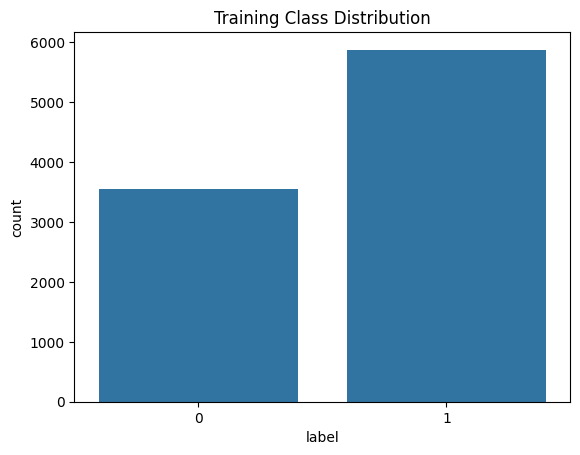


Training Basic Descriptive Statistics:
                idx        label
count  9427.000000  9427.000000
mean   4713.000000     0.623104
std    2721.484828     0.484634
min       0.000000     0.000000
25%    2356.500000     0.000000
50%    4713.000000     1.000000
75%    7069.500000     1.000000
max    9426.000000     1.000000

Question Length Descriptive Statistics in Training:
 count    9427.000000
mean       43.991938
std         8.854335
min        20.000000
25%        38.000000
50%        42.000000
75%        48.000000
max       100.000000
Name: question_length, dtype: float64


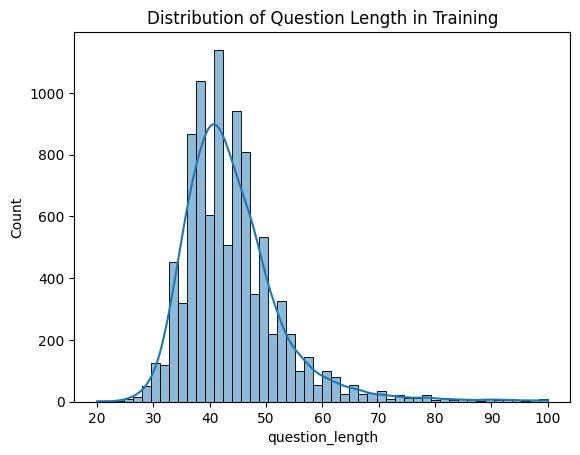


Passage Length Descriptive Statistics in Training:
 count    9427.000000
mean      590.168028
std       323.447352
min        52.000000
25%       365.000000
50%       535.000000
75%       746.000000
max      4745.000000
Name: passage_length, dtype: float64


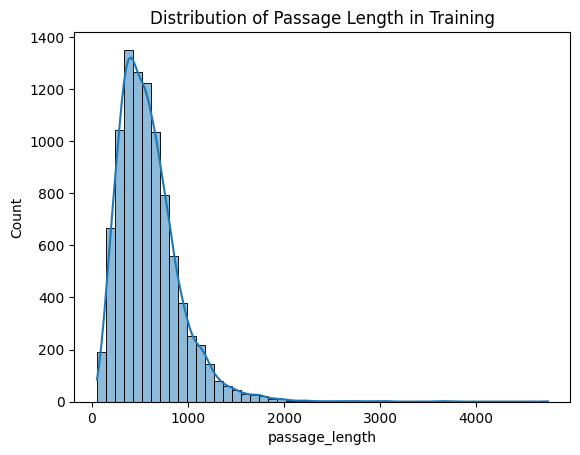

Validation Dataset Size: 3270 rows and 4 columns

Validation Class Distribution:
 1    2033
0    1237
Name: label, dtype: int64

Validation Class Proportions:
 1    62.171254
0    37.828746
Name: label, dtype: float64


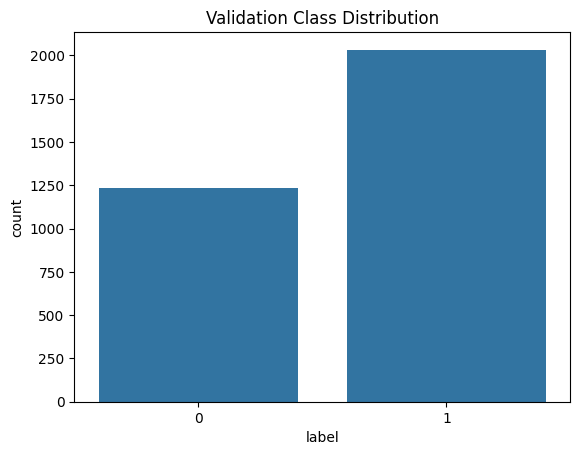


Validation Basic Descriptive Statistics:
                idx        label
count  3270.000000  3270.000000
mean   1634.500000     0.621713
std     944.112017     0.485034
min       0.000000     0.000000
25%     817.250000     0.000000
50%    1634.500000     1.000000
75%    2451.750000     1.000000
max    3269.000000     1.000000

Question Length Descriptive Statistics in Validation:
 count    3270.000000
mean       43.206422
std         7.785706
min        21.000000
25%        38.000000
50%        42.000000
75%        47.000000
max       100.000000
Name: question_length, dtype: float64


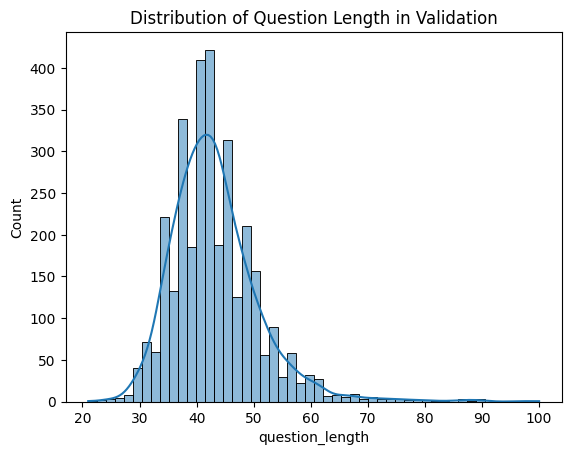


Passage Length Descriptive Statistics in Validation:
 count    3270.000000
mean      583.306116
std       328.635238
min        65.000000
25%       367.000000
50%       522.000000
75%       718.000000
max      4805.000000
Name: passage_length, dtype: float64


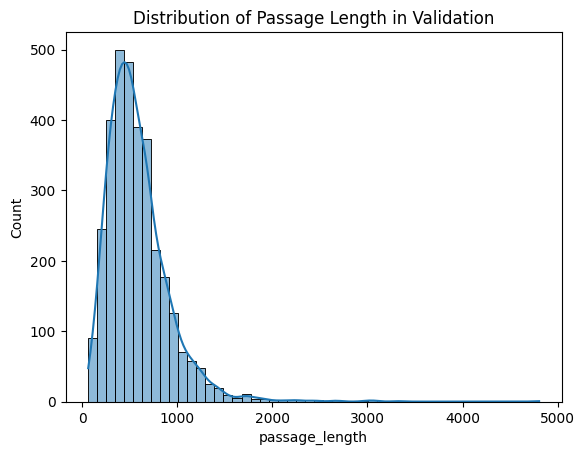

Test Dataset Size: 3245 rows and 4 columns

Test Class Distribution:
 -1    3245
Name: label, dtype: int64

Test Class Proportions:
 -1    100.0
Name: label, dtype: float64


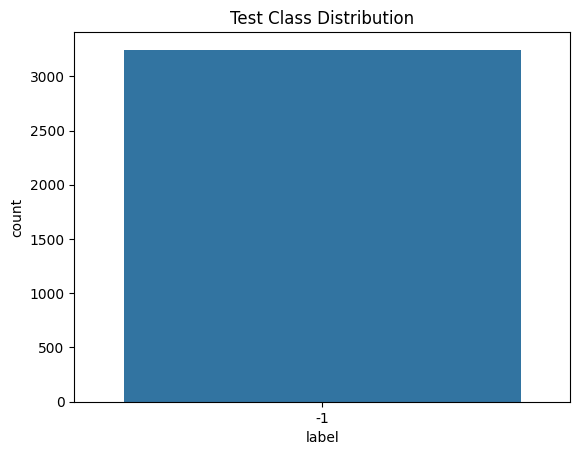


Test Basic Descriptive Statistics:
                idx   label
count  3245.000000  3245.0
mean   1622.000000    -1.0
std     936.895138     0.0
min       0.000000    -1.0
25%     811.000000    -1.0
50%    1622.000000    -1.0
75%    2433.000000    -1.0
max    3244.000000    -1.0

Question Length Descriptive Statistics in Test:
 count    3245.000000
mean       43.223421
std         7.727061
min        23.000000
25%        38.000000
50%        42.000000
75%        47.000000
max       100.000000
Name: question_length, dtype: float64


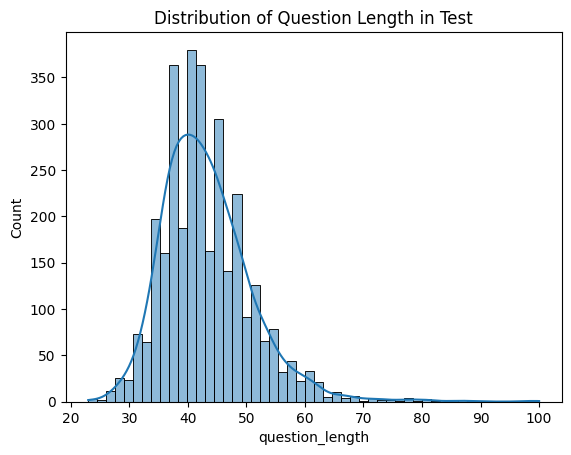


Passage Length Descriptive Statistics in Test:
 count    3245.000000
mean      585.037596
std       313.262515
min        46.000000
25%       363.000000
50%       526.000000
75%       737.000000
max      3060.000000
Name: passage_length, dtype: float64


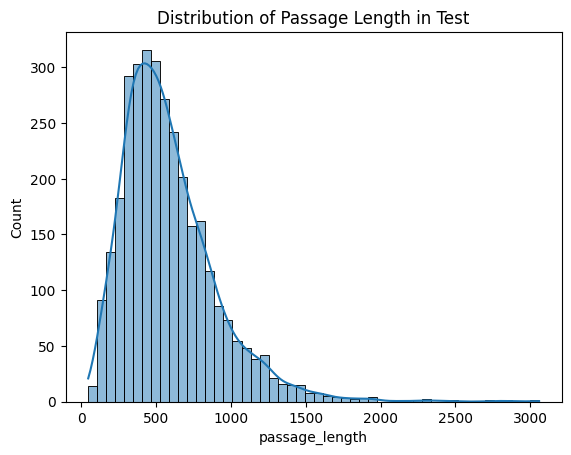

In [ ]:
# Function to print the overview of the dataset
def dataset_overview(df, dataset_name):
    print(f"{dataset_name} Dataset Size: {df.shape[0]} rows and {df.shape[1]} columns")

    # Binary classification with the 'label' column
    if 'label' in df.columns:
        class_distribution = df['label'].value_counts()
        class_proportions = df['label'].value_counts(normalize=True) * 100  # This will give the percentage
        print(f"\n{dataset_name} Class Distribution:\n", class_distribution)
        print(f"\n{dataset_name} Class Proportions:\n", class_proportions)

        # Plotting class distribution
        sns.countplot(x='label', data=df)
        plt.title(f'{dataset_name} Class Distribution')
        plt.show()

    # Include basic descriptive statistics for numeric columns
    descriptive_stats = df.describe()
    print(f"\n{dataset_name} Basic Descriptive Statistics:\n", descriptive_stats)

    # If the dataset has text columns, we could calculate the length of the text as an example of peculiar characteristics
    text_columns = df.select_dtypes(include=['object', 'category']) # Assuming text columns are of type 'object'
    for col in text_columns:
        df[col+'_length'] = df[col].apply(len)
        print(f"\n{col.capitalize()} Length Descriptive Statistics in {dataset_name}:\n", df[col+'_length'].describe())
        # Plotting distribution of text lengths
        sns.histplot(df[col+'_length'], bins=50, kde=True)
        plt.title(f'Distribution of {col.capitalize()} Length in {dataset_name}')
        plt.show()

# Run the overview function on train, validation, and test datasets
dataset_overview(train, "Training")
dataset_overview(val, "Validation")
dataset_overview(test, "Test")

Class Distributions:
The class distributions in the training and validation datasets show a similar pattern, with class '1' being more common than class '0'. In the training dataset, class '1' comprises approximately 62.31% of the data, while class '0' accounts for about 37.69%. This ratio is mirrored in the validation dataset, with class '1' making up around 62.17% and class '0' at 37.83%. It’s important to note that the test dataset does not have proper labels and all instances are marked with '-1', indicating that it is intended for model predictions to be used in a competition setting. This labelling strategy is typical in competitions to prevent leaking of the target outcome and to ensure an unbiased evaluation of the predictive models. Overall, we can say there is a slight class-imbalance in our data.

Passage length:
The mean passage length of 590.17, 583.31,  and 585.04 for the training, validation, and testing data respectively is highly similar. Further, looking at the shape of the distribution one can observe that the shape is also similar, although it is slightly narrower for the test data. In other words, the maximum text length for the test data is shorter, but the minimum text length is relatively comparable. However, as it is only a few outliers for the training and validation data, and additionally we are not using the testing data as aforementioned it is designed for part taking in a competition, this will not impact our analysis significantly.

Question Length:
The question lengths for the training, validation, and test datasets show little variation, with means around 43-44 characters and all maxing at 100 characters. Minimum lengths are slightly different but still close, ranging from 20 to 23 characters across the sets. The shape of the distributions is similarly right-skewed in each dataset, suggesting a common pattern in the training, testing, and validation dataset.





By merging the passage and the question into a single input for models, we provide the model with the complete context necessary to understand and answer the question. This approach enables the model to utilize its attention mechanisms to capture the nuanced relationship between the question and the passage and getting more informed predictions.

In [ ]:
# merge premise and hypothesis into one column
train['all_text'] = train['question'] + ' ' + train['passage']
test['all_text'] = test['question'] + ' ' + test['passage']
val['all_text'] = val['question'] + ' ' + val['passage']

In [ ]:
train_new, test_new = train_test_split(train, test_size=0.2, random_state=42)

In [ ]:
print(train_new.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7541 entries, 4894 to 7270
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  7541 non-null   object
 1   passage   7541 non-null   object
 2   idx       7541 non-null   int64 
 3   label     7541 non-null   int64 
 4   all_text  7541 non-null   object
dtypes: int64(2), object(3)
memory usage: 353.5+ KB
None


### Random Classifier
For our binary classification model we define a function that classifies randomly each observation. Naturally, we need to account for the fact that the classes are imbalanced; so it will come down to a Bernoulli realization with P = 0.623. This is the proportion of 1's in our training dataset.

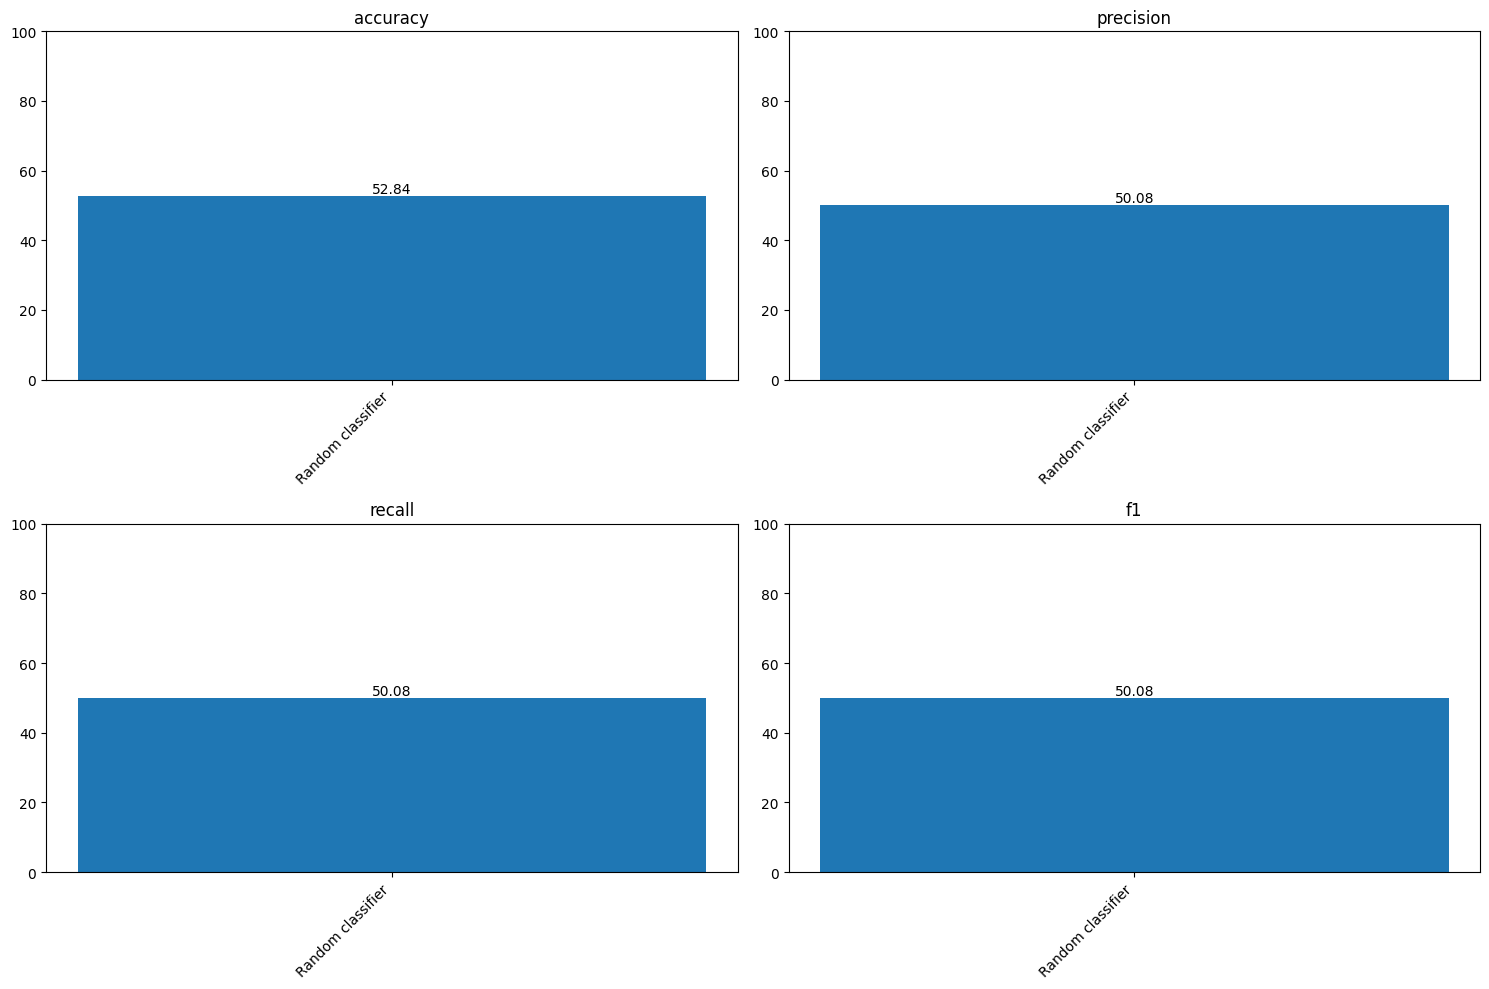

In [ ]:
def random_label_classifier(df):
#    positives = (df['label'] == 1).sum()
    n_obs = df.shape[0]
    prob = 0.623

    # Generate random predictions based on the proportion of positives
    predictions = np.random.binomial(n=1, p=prob, size=n_obs)
    return predictions

random_predictions = random_label_classifier(val)

metrics = Metrics()
metrics.run(val.label, random_predictions, 'Random classifier')
metrics.plot()

The accuracy is what expected; once we account for the fact that we have more 1 labels than 0; then our random classifier

### Rule Based Classifier

In [ ]:
for each, row in train.loc[train.label == 1][:10].iterrows():
    print(row.question)
    print(row.passage)

do iran and afghanistan speak the same language
Persian language -- Persian (/ˈpɜːrʒən, -ʃən/), also known by its endonym Farsi (فارسی fārsi (fɒːɾˈsiː) ( listen)), is one of the Western Iranian languages within the Indo-Iranian branch of the Indo-European language family. It is primarily spoken in Iran, Afghanistan (officially known as Dari since 1958), and Tajikistan (officially known as Tajiki since the Soviet era), and some other regions which historically were Persianate societies and considered part of Greater Iran. It is written in the Persian alphabet, a modified variant of the Arabic script, which itself evolved from the Aramaic alphabet.
do good samaritan laws protect those who help at an accident
Good Samaritan law -- Good Samaritan laws offer legal protection to people who give reasonable assistance to those who are, or who they believe to be, injured, ill, in peril, or otherwise incapacitated. The protection is intended to reduce bystanders' hesitation to assist, for fear o

In [ ]:
for each, row in train.loc[train.label == 0][:10].iterrows():
    print(row.question)
    print(row.passage)

is elder scrolls online the same as skyrim
The Elder Scrolls Online -- As with other games in The Elder Scrolls series, the game is set on the continent of Tamriel. The events of the game occur a millennium before those of The Elder Scrolls V: Skyrim and around 800 years before The Elder Scrolls III: Morrowind and The Elder Scrolls IV: Oblivion. It has a broadly similar structure to Skyrim, with two separate conflicts progressing at the same time, one with the fate of the world in the balance, and one where the prize is supreme power on Tamriel. In The Elder Scrolls Online, the first struggle is against the Daedric Prince Molag Bal, who is attempting to meld the plane of Mundus with his realm of Coldharbour, and the second is to capture the vacant imperial throne, contested by three alliances of the mortal races. The player character has been sacrificed to Molag Bal, and Molag Bal has stolen their soul, the recovery of which is the primary game objective.
can you use oyster card at eps

here we preprocess the corpus

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

#The idea is that there should be negation terms such as "This is NOT the answer" in the passage.

# here we determine a set of rules to determine if a sentence is a question

# remove all stopwords with spacy
val['question_cleaned'] = val.apply(lambda x: nlp(x['question']), axis=1)
val['passage_cleaned'] = val.apply(lambda x: nlp(x['passage']), axis=1)


# remove stop words
val['question_cleaned'] = val.apply(lambda x: [word for word in x['question_cleaned'] if not word.is_stop], axis=1)
val['passage_cleaned'] = val.apply(lambda x: [word for word in x['passage_cleaned'] if not word.is_stop], axis=1)

# remove all words that are in the question from the passage
val['passage_cleaned'] = val.apply(lambda x: [word for word in x['passage_cleaned'] if word not in x['question_cleaned']], axis=1)

#### Negation Count Rules Classifier

Because the question is a yes or no. We sometimes see things like "The question is NOT true." Using this style of thinking, we can create a rules classifier by identifying the number of "negation" terms in each passage.

An example:

is the federal court the same as the supreme court

Federal judiciary of the United States -- The federal courts are composed of three levels of courts. The Supreme Court of the United States is the court of last resort. It is generally an appellate court that operates under discretionary review, which means that the Court can choose which cases to hear, by granting writs of certiorari. There is therefore generally ***NO BASIC RIGHT OF APPEAL*** that extends automatically all the way to the Supreme Court. In a few situations (like lawsuits between state governments or some cases between the federal government and a state) it sits as a court of original jurisdiction.


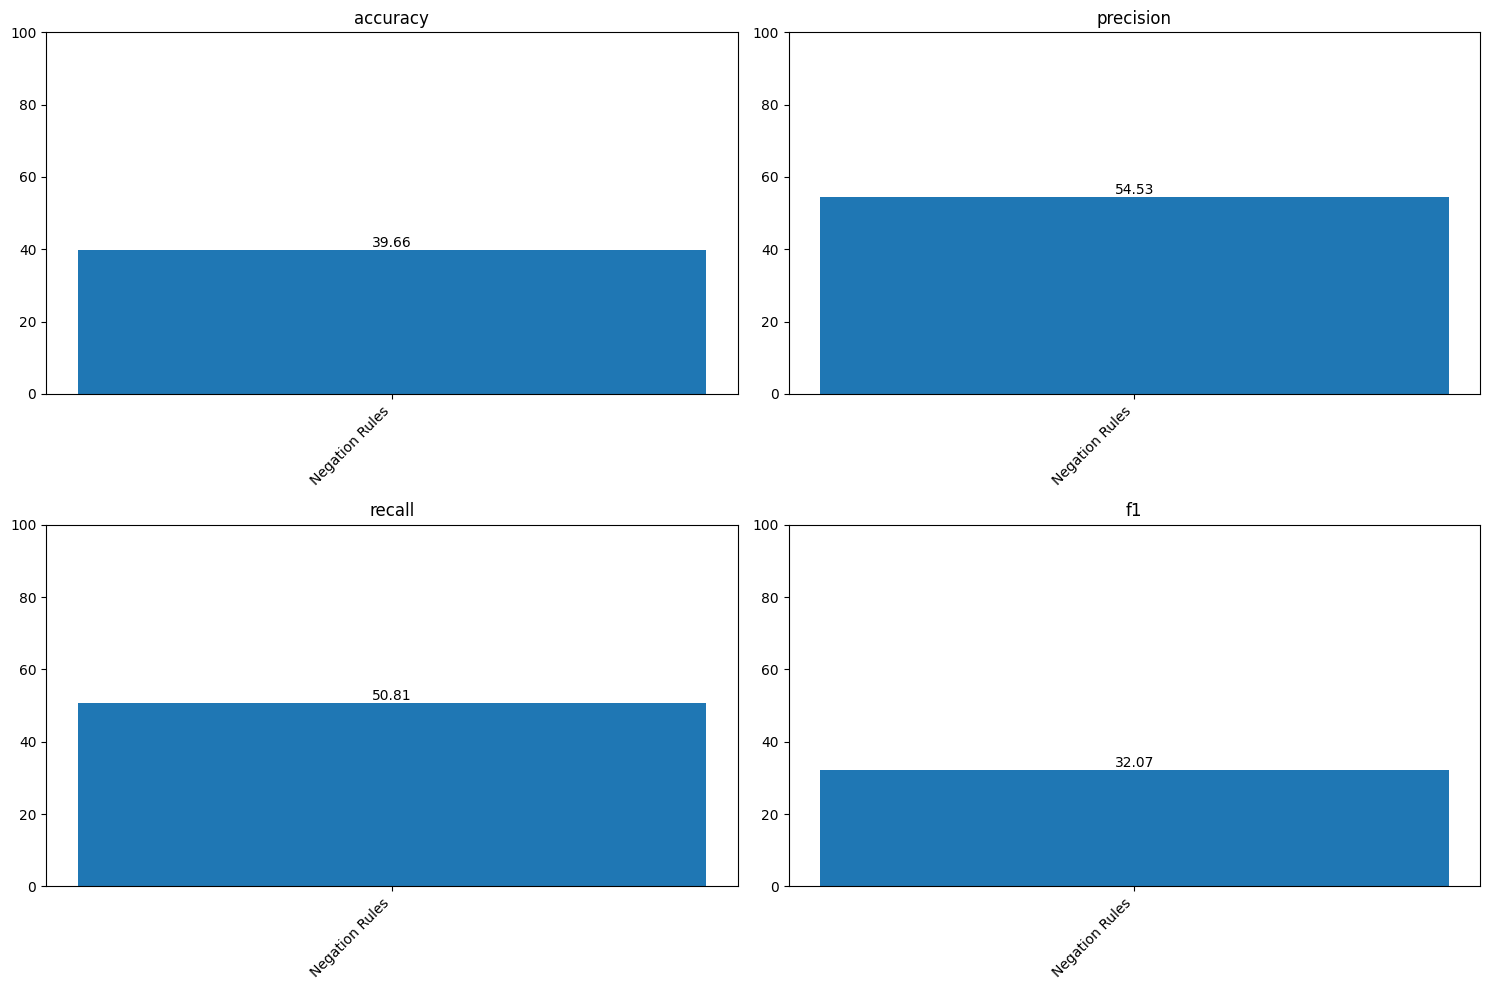

In [ ]:
# read in negation terms from file
with open('negation_words.txt', 'r') as f:
    negation_terms = f.read().split('\n')

# lower case negation terms
negation_terms = [term.lower() for term in negation_terms]

# we will then count the negation terms
val['negation_count'] = val.apply(lambda x: len([word for word in x['passage_cleaned'] if word.text in negation_terms]), axis=1)

val['negation_count_pred'] = val['negation_count'] > 0

metrics = Metrics()
metrics.run(val.label, val['negation_count_pred'], 'Negation Rules')
metrics.plot()

<Axes: >

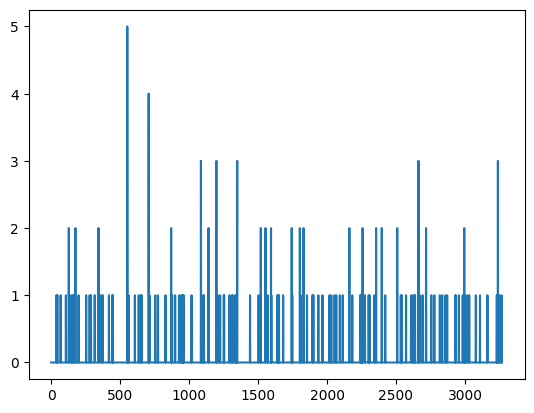

In [ ]:
val['negation_count'].plot()

#### Passage + Question Word Overlap

The first rules model performed badly, and after looking at the data, we can see a very sparse count of negation words in the questions and passages. For the second rules based classifier attempt, we tried a more robust method of completeness. Essentially, the idea is that if every noun from the question is represented in the passage, that question may be more likely to be correct.

e.g.

do iran and afghanistan speak the same language

Persian language -- Persian (/ˈpɜːrʒən, -ʃən/), also known by its endonym Farsi (فارسی fārsi (fɒːɾˈsiː) ( listen)), is one of the Western Iranian languages within the Indo-Iranian branch of the Indo-European language family. It is primarily spoken in ***Iran, Afghanistan*** (officially known as Dari since 1958), and Tajikistan (officially known as Tajiki since the Soviet era), and some other regions which historically were Persianate societies and considered part of Greater Iran. It is written in the Persian alphabet, a modified variant of the Arabic script, which itself evolved from the Aramaic alphabet.


In [ ]:

# count how many words from question are in the passage
val['word_overlap'] = val.apply(lambda x: len([word for word in x['question_cleaned'] if word in x['passage_cleaned']]), axis=1)

# count how many words are in the question
val['question_word_count'] = val.apply(lambda x: len(x['question_cleaned']), axis=1)

# calculate the difference between the number of words in the question and the overlap
val['word_diff'] = val['question_word_count'] - val['word_overlap']

Here we take a look at the distribution of the word diffs.

(array([6.000e+00, 1.370e+02, 6.520e+02, 1.342e+03, 8.390e+02, 2.370e+02,
        4.500e+01, 9.000e+00, 2.000e+00, 1.000e+00]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

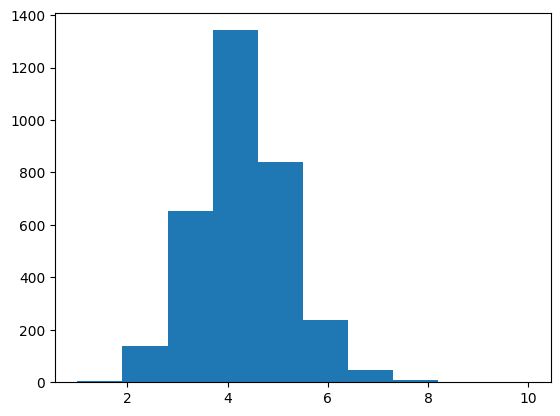

In [ ]:
# plot word diff
plt.hist(val['word_diff'])

Because we have a pretty distribution, we can try to split this down the middle at the mean.

In [ ]:
# create a label based on if the word_diff is above or below the mean

val['q_passage_completeness_pred_label'] = val['word_diff'] > val['word_diff'].mean()
val['q_passage_completeness_pred_label'] = val['q_passage_completeness_pred_label'].astype(int)

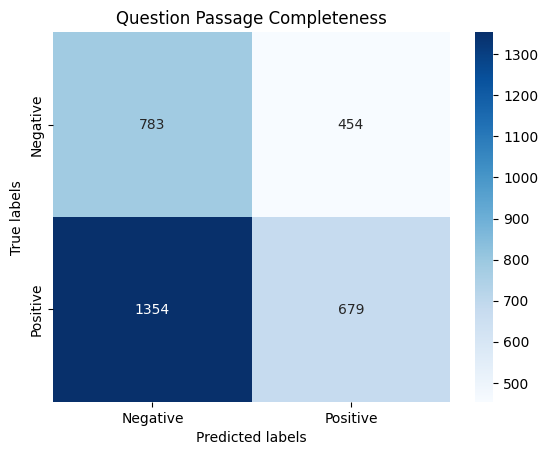

In [ ]:
cm = confusion_matrix(val.label, val['q_passage_completeness_pred_label'])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Question Passage Completeness')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

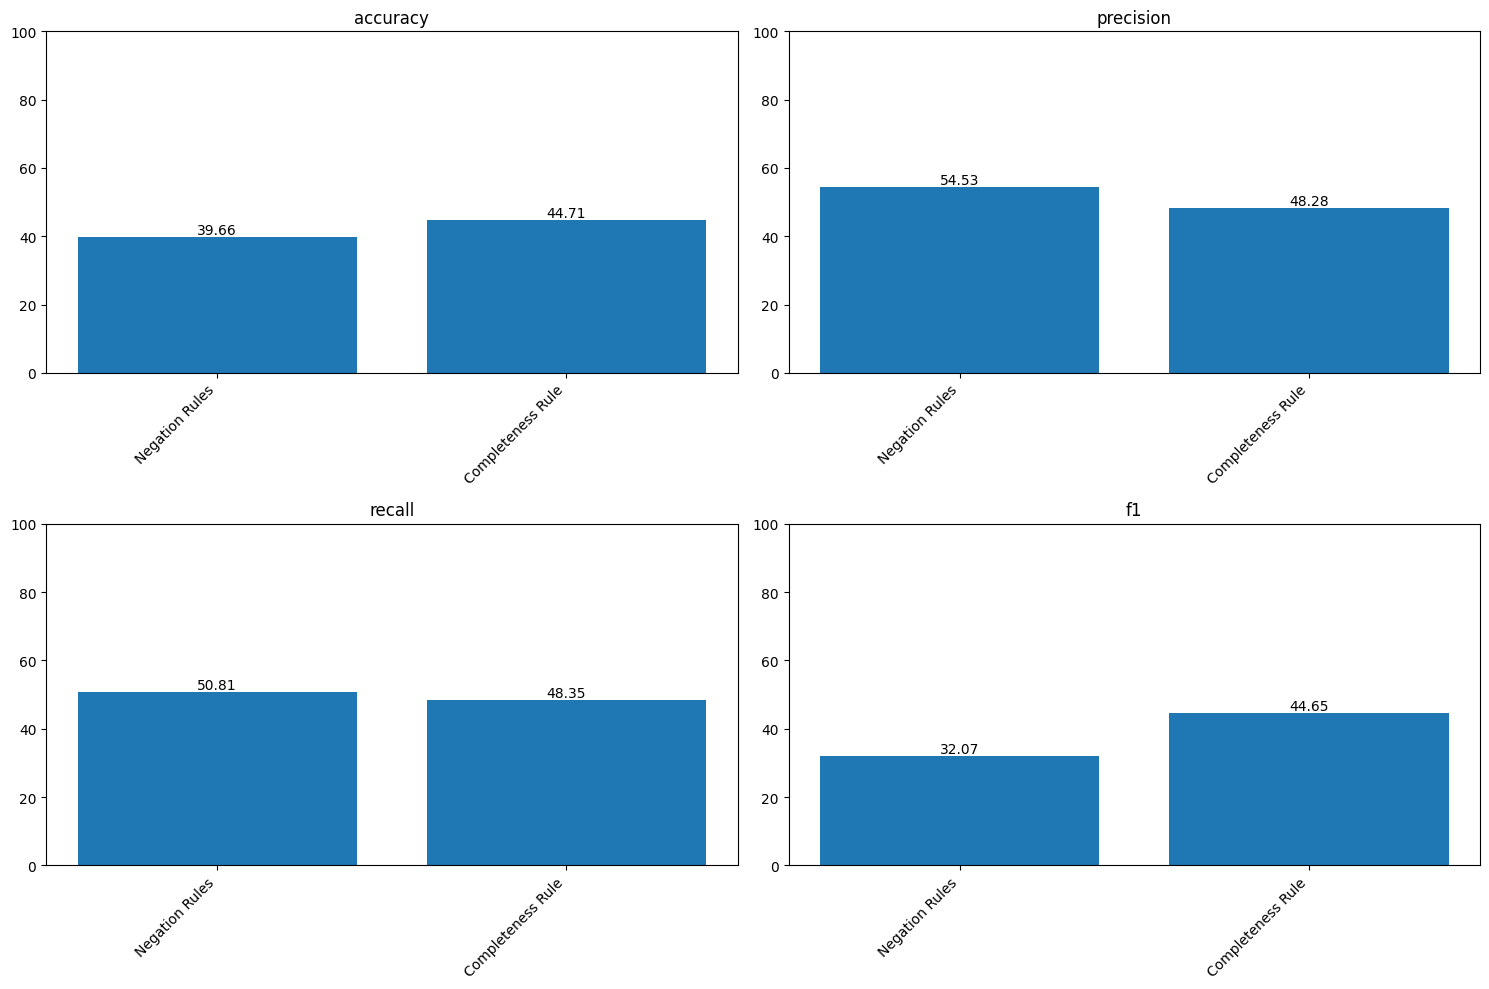

In [ ]:
metrics.run(val.label, val['q_passage_completeness_pred_label'], 'Completeness Rule')
metrics.plot()

#### Final Approach: Subset Refined Classifier

It is evident from our previous tests, that an overall rules based approach is difficult for the BoolIQ task. So we identified a pattern in the questions and created a rules based approach for the subset of questions.

Detecting question patterns:
* is x the same as y?
* is something part of soething else?
* can...?
* will there be ...?

e.g.

is confectionary sugar the same as powdered sugar

is newcastle upon tyne the same as newcastle


**Rule based classifier**

First we analysed the passages to which the corresponding question is answered with yes and identified common patterns, either words or phrases further we detected if the question is yes x and y are mentioned in the same sentences with those linking patterns.

Linking Words List: It defines a list of linking_words which are considered indicative of x and y being the same entity or concept.

Sentence Splitting: The passage is split into individual sentences. This is based on the assumption that sentences are seperated by a '.'

Sentence Looping: The function then iterates over each sentence in the passage.

Concept Checking: For each sentence, the function checks whether both x and y appear in it. The presence of both within a single sentence suggests a potential relationship or comparison is being made within that sentence.

Connection Checking:
Words in Sentence: If both x and y are found in the sentence, the function extracts the words that are in the sentence to analyze their relationship further.

Linking Words Analysis: It checks if any of the extracted words are present in the predefined list of linking_words. If so, this indicates that the sentence is likely describing x and y as the same or closely related.

Proximity Rule: Additionally, it checks if the word 'or' appears within the next three words after x before y appears. This could imply an alternative name or description, further suggesting x and y are the same.

Return Value:
If any of these checks are positive (i.e., x and y are connected by a linking word or 'or' is found close by), the function returns 1, indicating a 'Yes' answer to the question of whether x is the same as y.

If none of these conditions are met across all sentences in the passage, the function returns 0, indicating a 'No' answer.

This leads to a high number of false negatives




In [ ]:
filtered_train = train[train['question'].str.contains('same as', case=False, na=False)]  # na=False drops rows with NaN in 'question'


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.stem import PorterStemmer
import string

# Initialize the PorterStemmer
stemmer = PorterStemmer()

# Redefine stop words to exclude 'is', 'same', and 'as'
stop_words_same = set(stopwords.words('english')) - {'same', 'as'}

# Redefine stop words significant for analysing similarity
stop_words_significant = set(stopwords.words('english')) - {'common', 'commonly', 'also', 'called', 'known', 'same',
                                                            'referred', 'became', 'written as', 'or'}


# Function to clean text, remove stopwords, remove special characters, and stem
def clean_and_remove_stopwords(text):
    # Lowercase the text
    text = text.lower()
    # Remove stopwords
    tokens = [word for word in text.split() if word not in stop_words_same]
    # Remove special characters
    tokens = [re.sub(r'[^a-zA-Z0-9]', '', word) for word in tokens]
    # Stem the words
    tokens = [stemmer.stem(word) for word in tokens]
    # Rejoin the tokens into a string
    clean_text = " ".join(tokens)

    return clean_text



# Function to clean text and remove significant stopwords for classification
def clean_and_remove_stopwords_significant(text):
    # Lowercase the text
    text = text.lower()
    # Remove stopwords
    tokens = [word for word in text.split() if word not in stop_words_significant]
    # Remove special characters
    tokens = [re.sub(r'[^a-zA-Z0-9]', '', word) for word in tokens]
    # Stem the words
    tokens = [stemmer.stem(word) for word in tokens]
    # Rejoin the tokens into a string
    clean_text = " ".join(tokens)

    return clean_text


# Define a function to apply the refined rule-based classification
def refined_classify(row, verbose=False):
    if verbose:
      # Print the original question and passage
      print(f"Original question: {row['question']}")
      print(f"Original passage: {row['passage']}")
      # Print the true label from the dataset
      print(f"True label: {row['label']}")


    # Remove stopwords from the question before extracting x and y
    question_clean = clean_and_remove_stopwords(row['question'])


    # Try to extract x and y from the cleaned question
    try:
        x, y = re.findall(r'(.+?) same as (.+)', question_clean)[0]
        if verbose:
          # Print the extracted x and y
          print(f"Extracted x: {x}")
          print(f"Extracted y: {y}")
    except IndexError:
        # Print a message if x and y couldn't be extracted
        print("Could not extract x and y from the question.")
        return 0  # If no match is found, return 0 indicating 'No'

    # Clean the passage text
    passage_clean = clean_and_remove_stopwords_significant(row['passage'])


    # Connective words that might link x and y
    linking_words = ['common', 'commonly', 'also', 'called', 'known', 'same', 'referred', 'became', 'written as']

    # Check if x and y are mentioned in the same sentence and connected by the linking words
    sentences = passage_clean.split('.')
    for sentence in sentences:
        # Print the individual sentences being checked
        if verbose:
            print(f"Checking sentence: {sentence}")
        if x in sentence and y in sentence:
            if verbose:
              # Print a message if both x and y are in the sentence
              print(f"Both x and y found in sentence: {sentence}")
            # Extract all words of the sentence
            words_in_sentence = sentence.split()

            if verbose:
                print(f"Words in sentence: {words_in_sentence}")
            if any(word in linking_words for word in words_in_sentence):
                # Print which linking word was found
                if verbose:
                  print(f"Linking word found connecting x and y in sentence.")
                return 1  # If connected by linking words, return 1 indicating 'Yes'
            # Print a message if no linking words are found
            if verbose:
              print("No linking words found connecting x and y in sentence.")

    # Print a final message if no sentences matched the criteria
    if verbose:
      print("No sentences found that match the criteria for a 'Yes' answer. -- predicted label: 0")
    return 0  # If none of the above conditions are met, return 0 indicating 'No'




In [ ]:
refined_classify(filtered_train.iloc[0], True)


Original question: is confectionary sugar the same as powdered sugar
Original passage: Powdered sugar -- Powdered sugar, also called confectioners' sugar, icing sugar, and icing cake, is a finely ground sugar produced by milling granulated sugar into a powdered state. It usually contains a small amount of anti-caking agent to prevent clumping and improve flow. Although most often produced in a factory, powdered sugar can also be made by processing ordinary granulated sugar in a coffee grinder, or by crushing it by hand in a mortar and pestle.
True label: 1
Extracted x: confectionari sugar
Extracted y: powder sugar
Checking sentence: powder sugar  powder sugar also call confection sugar ice sugar ice cake fine ground sugar produc mill granul sugar powder state usual contain small amount anticak agent prevent clump improv flow although often produc factori powder sugar also made process ordinari granul sugar coffe grinder or crush hand mortar pestl
No sentences found that match the crite

0

Issue is confectioners' sugar in the text but confectionary sugar in the question. solution stemming

In [ ]:
refined_classify(filtered_train.iloc[5], True)

Original question: is newcastle upon tyne the same as newcastle
Original passage: Newcastle upon Tyne -- Newcastle upon Tyne (locally /njuːˈkæsəl/ ( listen)), commonly known as Newcastle, is a city in Tyne and Wear, North East England, 103 miles (166 km) south of Edinburgh and 277 miles (446 km) north of London on the northern bank of the River Tyne, 8.5 mi (13.7 km) from the North Sea. Newcastle is the most populous city in the North East, and forms the core of the Tyneside conurbation, the eighth most populous urban area in the United Kingdom. Newcastle is a member of the English Core Cities Group and is a member of the Eurocities network of European cities.
True label: 1
Extracted x: newcastl upon tyne
Extracted y: newcastl
Checking sentence: newcastl upon tyne  newcastl upon tyne local njuksl  listen commonli known newcastl citi tyne wear north east england 103 mile 166 km south edinburgh 277 mile 446 km north london northern bank river tyne 85 mi 137 km north sea newcastl popul ci

1

In [ ]:

refined_classify(filtered_train.iloc[6], True)

Original question: is job termination the same as being fired
Original passage: Dismissal (employment) -- ``Firing'' is a common colloquial term in the English language (particularly used in the U.S.) for termination. The term ``firing'' may have been initiated in the 1910s at the National Cash Register Company. Other terms for dismissal are being ``sacked'', ``canned'', ``let go'', ``ran-off'', ``axed'', ``given walking papers'', ``given the pink slip'' or ``boned''. Other terms, more often used in Commonwealth countries, include ``to get the boot'' and ``to get the sack''.
True label: 1
Extracted x: job termin
Extracted y: fire
Checking sentence: dismiss employ  fire common colloqui term english languag particularli use us termin term fire may initi 1910 nation cash regist compani term dismiss sack can let go ranoff axe given walk paper given pink slip or bone term often use commonwealth countri includ to get boot to get sack
No sentences found that match the criteria for a 'Yes' ans

0

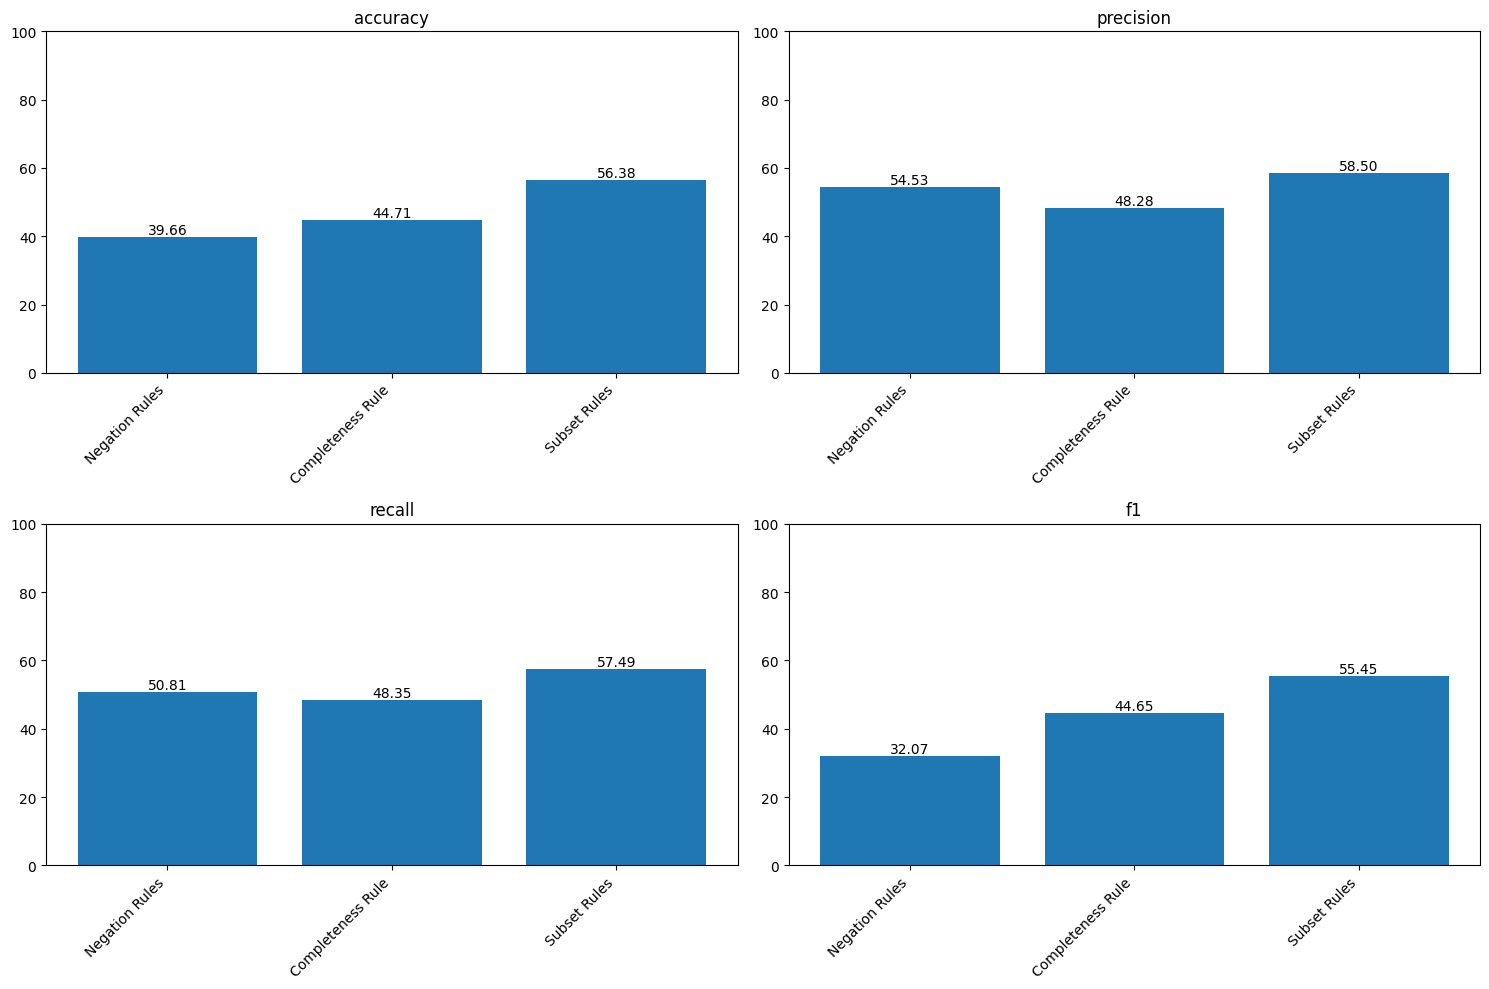

In [ ]:
filtered_val = val[val['question'].str.contains('same as', case=False, na=False)]  # na=False drops rows with NaN in 'question'
filtered_val['refined_classify_rules_pred'] = filtered_val.apply(refined_classify, axis=1)

metrics.run(filtered_val.label, filtered_val['refined_classify_rules_pred'], 'Subset Rules')
metrics.plot()


The first idea, of using words of similarity and seeing if words x and y are in the same sentence with one of the similarity words or if the words are in a list with or worked quite well. After implementing this idea, we played around with using stemming and lemmatizing and got in and out of sample the best result when using stemming. Further, we implemented a lot of print statements to see how the rule based classifier works step for step. Applying this analysis to specific examples revaled some interesting insights.

example 1:
Original question: is confectionary sugar the same as powdered sugar
Original passage: Powdered sugar -- Powdered sugar, also called confectioners' sugar, icing sugar, and icing cake, is a finely ground sugar produced by milling granulated sugar into a powdered state. It usually contains a small amount of anti-caking agent to prevent clumping and improve flow. Although most often produced in a factory, powdered sugar can also be made by processing ordinary granulated sugar in a coffee grinder, or by crushing it by hand in a mortar and pestle.
Cleaned question: confectionari sugar same as powder sugar
Extracted x: confectionari sugar
Extracted y: powder sugar
Cleaned passage: powder sugar  powder sugar also call confection sugar ice sugar ice cake fine ground sugar produc mill granul sugar powder state usual contain small amount anticak agent prevent clump improv flow although often produc factori powder sugar also made process ordinari granul sugar coffe grinder crush hand mortar pestl
Checking sentence: powder sugar  powder sugar also call confection sugar ice sugar ice cake fine ground sugar produc mill granul sugar powder state usual contain small amount anticak agent prevent clump improv flow although often produc factori powder sugar also made process ordinari granul sugar coffe grinder crush hand mortar pestl
No sentences found that match the criteria for a 'Yes' answer.

here the answer contained confectionary sugar and the passage confectioners' sugar, applying stemming those still phrases are still different and are not matched using our algorithm.

example 2:
Original question: is job termination the same as being fired
Original passage: Dismissal (employment) -- "Firing" is a common colloquial term in the English language (particularly used in the U.S.) for termination. The term "firing" may have been initiated in the 1910s at the National Cash Register Company. Other terms for dismissal are being "sacked", "canned", "let go", "ran-off", "axed", "given walking papers", "given the pink slip" or "boned". Other terms, more often used in Commonwealth countries, include "to get the boot" and "to get the sack".
Cleaned question: job termin same as fire
Extracted x: job termin
Extracted y: fire
Cleaned passage: dismiss employ  fire common colloqui term english languag particularli use us termin term fire may initi 1910 nation cash regist compani term dismiss sack can let go ranoff axe given walk paper given pink slip bone term often use commonwealth countri includ to get boot to get sack
Checking sentence: dismiss employ  fire common colloqui term english languag particularli use us termin term fire may initi 1910 nation cash regist compani term dismiss sack can let go ranoff axe given walk paper given pink slip bone term often use commonwealth countri includ to get boot to get sack
No sentences found that match the criteria for a 'Yes' answer.
0

here the extracted x was not exactly the same as in the text as x has the word job in front of it, thus the rule-based classifier did not correctly classify the question as a yes answered question. idea: if x or y are made of multiple words it is enough if any word of x and y are in the same sentence, going a long with the connective words. however, this approach led to other examples being wrongly classified as sometimes the specifity of multiple words is needed to correctly answer the question.


Last, we saw an example with a spelling error in the question: "corn flour" was spelled as "corn flower", thus correctly classifying the question as being answered with yes was not possible. An idea to fix spelling errors or different spellings of the same word (example 1), one could use Levenshtein distance to match words which are almost identical to be able to use our algorithm.

Using a similar approach for each question type and combining them in an ensemble rule-based classifier could reveal similar results overall as it does for the question regarding to concepts being the same. This could further allow to enhance our subsequent models, but is not wihtin the scope of this final project. However, it shows how complex the BoolQ dataset is and how it can push the limits of our current LLMs when we have such a complex benchmark.

### Baseline TFIDF + Logistic Regression

Because none of our rules based models work particularly well on the overall dataset, we decided to benchmark with a Logistic Regression and TFIDF.

In [ ]:
# create a pipeline with tfidf minimal preprocessing and a binary classifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])
# define param grid
param_grid = {
    'tfidf__max_df': [0.75, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__stop_words': ['english'],
    'clf__C': [0.1, 1.0, 10.0],
    'clf__solver': ['liblinear']
}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(train_new.all_text, train_new.label)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'clf__C': [0.1, 1.0, 10.0],
                         'clf__solver': ['liblinear'],
                         'tfidf__max_df': [0.75, 1.0],
                         'tfidf__ngram_range': [(1, 1), (1, 2)],
                         'tfidf__stop_words': ['english']})

#### Metrics Plot

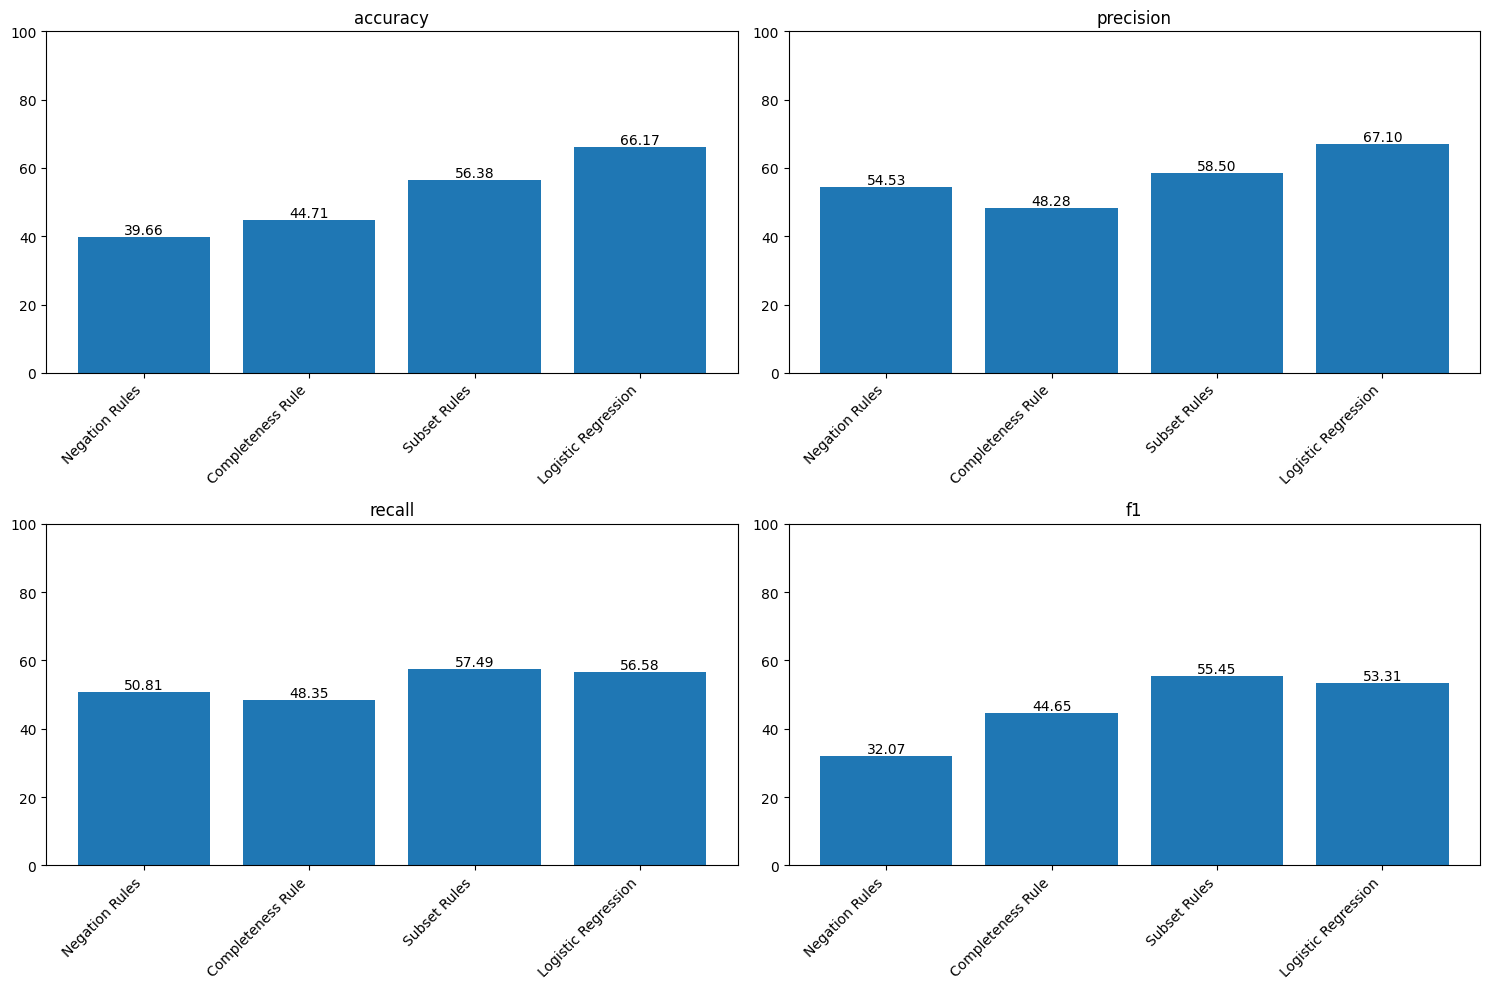

In [ ]:
#predict on test set and get accuracy metrics for the model
test_pred_tfidf = grid.predict(test_new.all_text)

metrics.run(test_new.label, test_pred_tfidf, 'Logistic Regression')
metrics.plot()

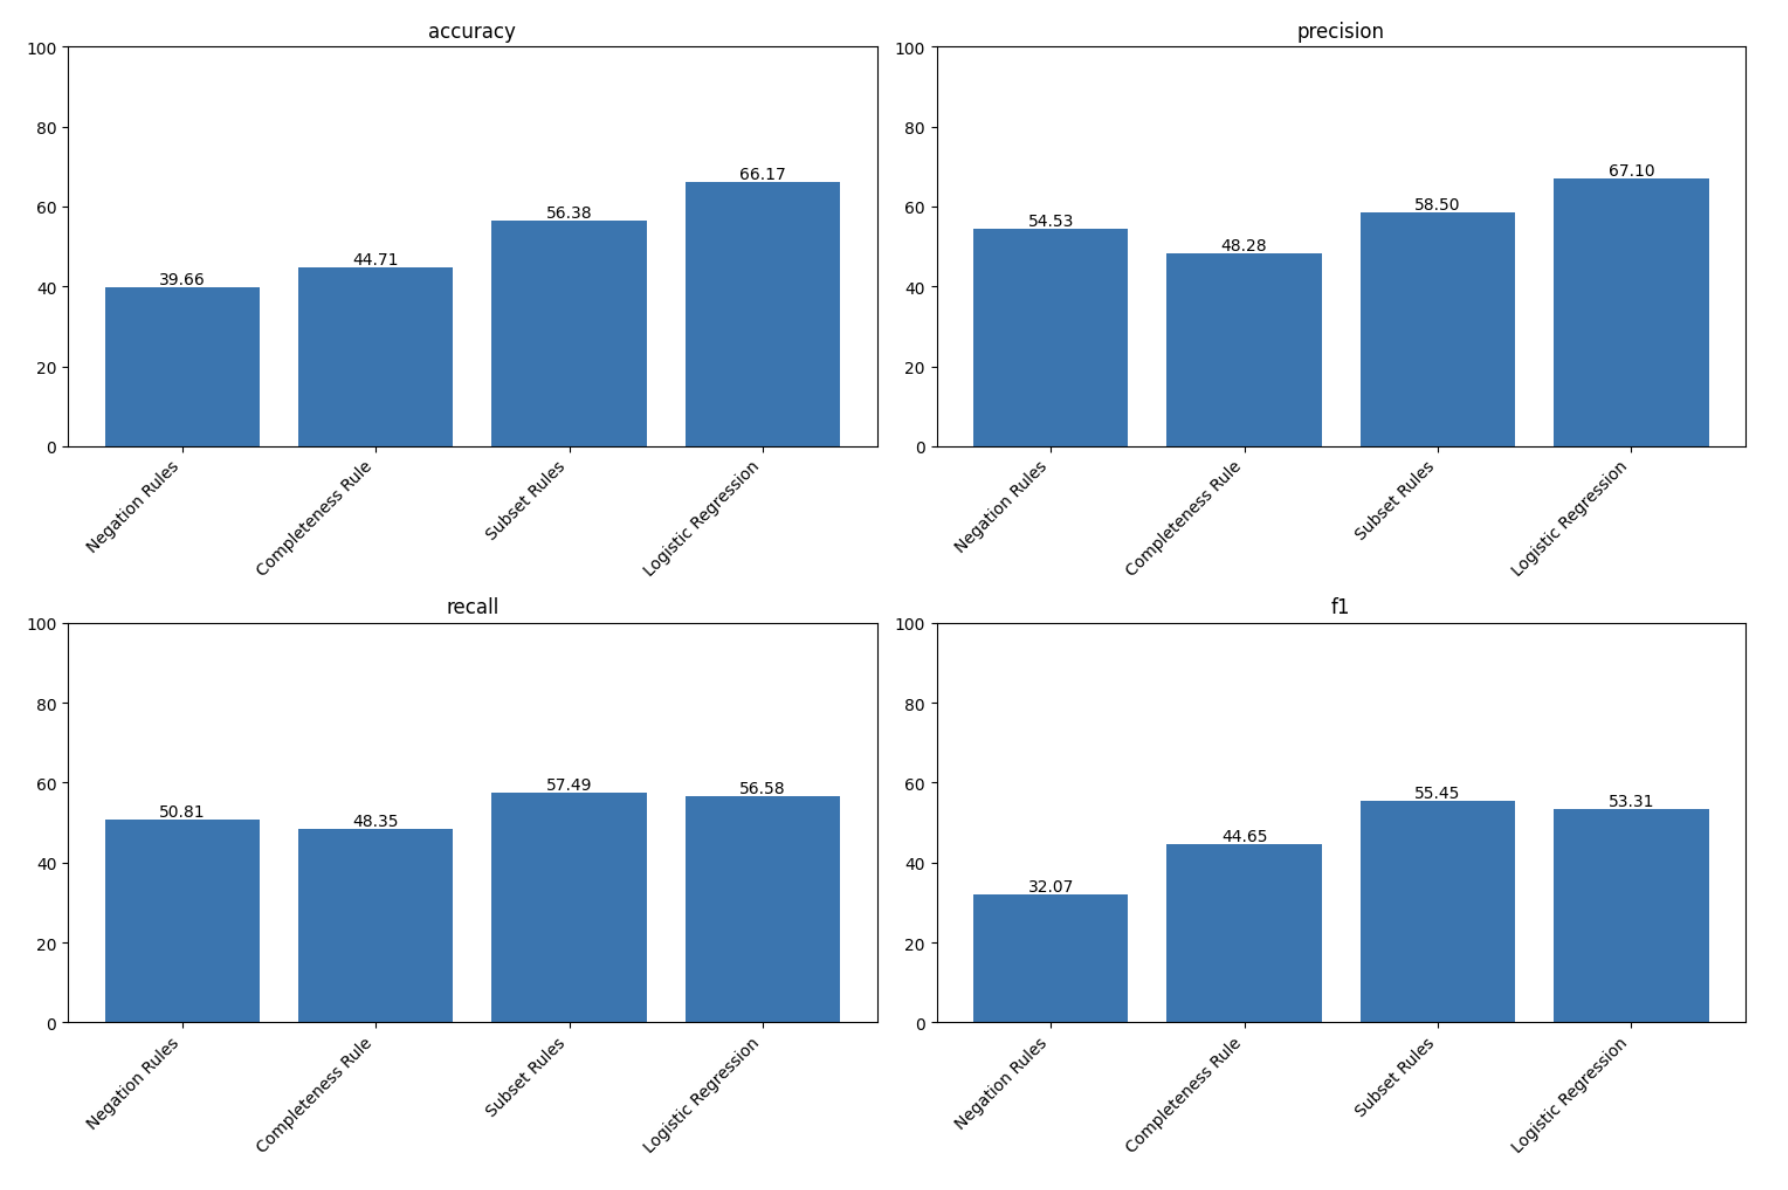

#### Confusion Matrix

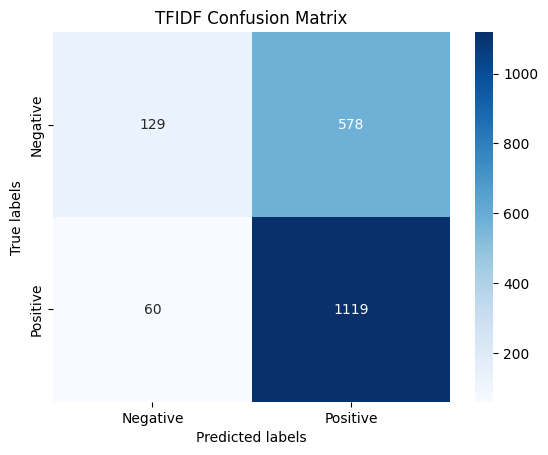

In [ ]:
cm = confusion_matrix(test_new.label, test_pred_tfidf)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('TFIDF Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()



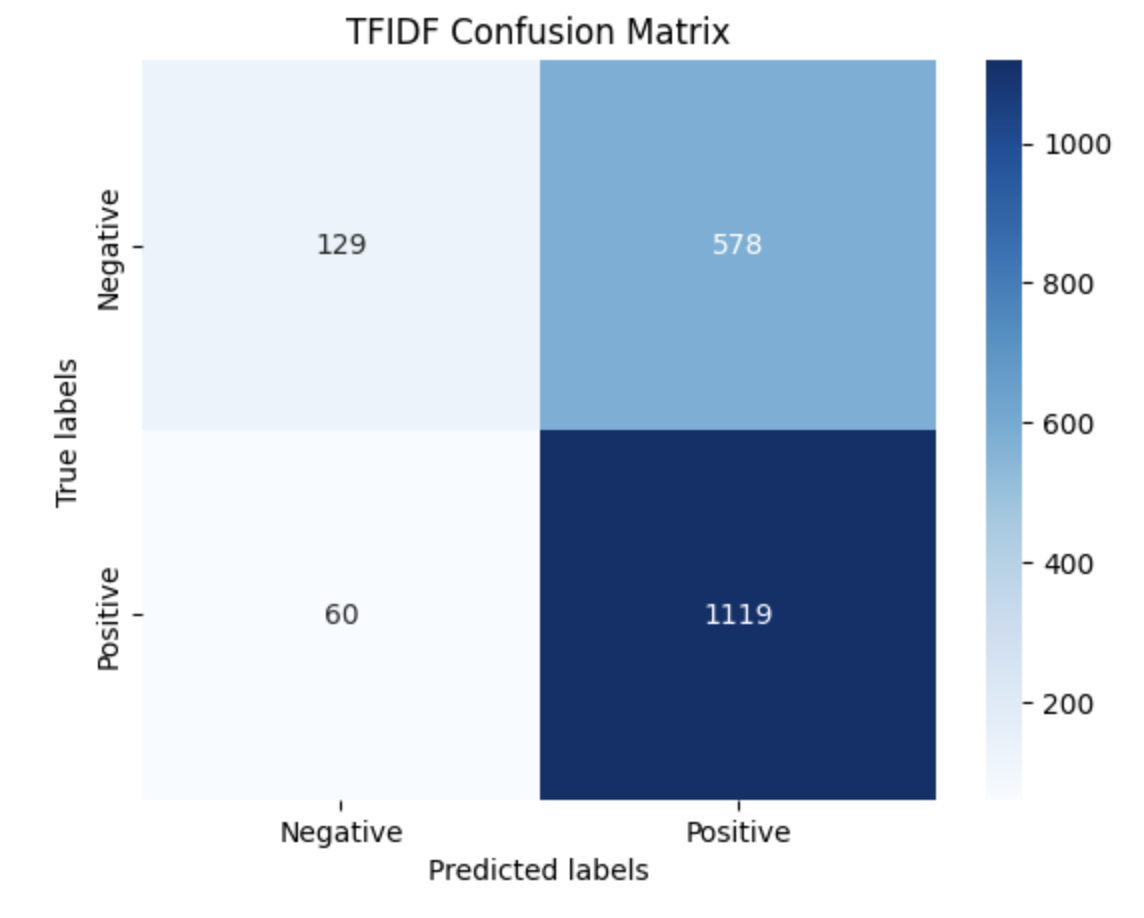

In [ ]:
#this also creates txt files with the false postives and false negatives***

# Add the predictions to your DataFrame
test_new['prediction_tfidf'] = test_pred_tfidf

# look at false postives and negatives
append_model_results('tfidf', test_new)

# Display the results DataFrame
display(results_df)

Model False Positives False Negatives  False Positives %  \
0  tfidf             578              60          30.646872   

   False Negatives %   Accuracy  
0           3.181336  66.171792

### BERT Model Limited Data

In [ ]:
checkpoint="distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = TFAutoModel.from_pretrained(checkpoint)
learning_rate = .0001
num_epochs = 8 #decreasing this increased our accruacy
batch_size=64
max_length=128 # had to increase this so the new data inputs wouldn't be too large
rate = 0.5 # dropout parameters
num_labels = len(np.unique(val.label))

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


#### Build Model
We initialize a baseline Bert for all our trainings, the structure is unchanged

In [ ]:
  # Model architecture
input_ids_in = tf.keras.layers.Input(shape=(max_length,), name='input_token', dtype='int32')
input_masks_in = tf.keras.layers.Input(shape=(max_length,), name='masked_token', dtype='int32')
embedding_layer = model(input_ids=input_ids_in, attention_mask=input_masks_in)
cls_token_embeddings = embedding_layer[0][:, 0, :]
output_layer = tf.keras.layers.Dropout(rate, name='do_layer')(cls_token_embeddings)
output = tf.keras.layers.Dense(num_labels, kernel_initializer="glorot_uniform", activation='softmax')(output_layer)
bert_model = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs=output)
bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_token (InputLayer)    [(None, 128)]                0         []                            
                                                                                                  
 masked_token (InputLayer)   [(None, 128)]                0         []                            
                                                                                                  
 tf_distil_bert_model (TFDi  TFBaseModelOutput(last_hid   6636288   ['input_token[0][0]',         
 stilBertModel)              den_state=(None, 128, 768)   0          'masked_token[0][0]']        
                             , hidden_states=None, atte                                           
                             ntions=None)                                                     

We define several functions that will help us run the several training processes without initializing in every step. It is also easier to fix and understand.

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ****here is a function so we don't have to keep initializing variables each time we re-train a model

def train_bert_model(model_name, model, tokenizer, train_data, val_data, num_labels, max_length, batch_size, learning_rate, num_epochs, switch_order=False):
    """
    Trains a BERT model and assigns a dynamic name.

    Parameters:
    - model_name: Name for the model, used for identification and saving.
    - model: The pre-loaded BERT model.
    - tokenizer: The tokenizer corresponding to the BERT model.
    - train_data: Training data as a DataFrame.
    - val_data: Validation data as a DataFrame.
    - num_labels: Number of labels (classes) to predict.
    - max_length: Maximum sequence length for tokenization.
    - batch_size: Batch size for training.
    - learning_rate: Learning rate for the optimizer.
    - num_epochs: Number of epochs to train for.
    """
    enc = OneHotEncoder(handle_unknown='ignore')
    y_valid = None
    y_train = None

    # Prepare data
    if switch_order:
      y_valid = enc.fit_transform(np.array(val_data.label).reshape(-1, 1)).toarray()
      y_train = enc.transform(np.array(train_data.label).reshape(-1, 1)).toarray()
    else:
      y_train = enc.fit_transform(np.array(train_data.label).reshape(-1, 1)).toarray()
      y_valid = enc.transform(np.array(val_data.label).reshape(-1, 1)).toarray()

    X_train = np.array(train_data.all_text)
    X_valid = np.array(val_data.all_text)

    train_generator = get_batches(X_train, y_train, tokenizer, batch_size, max_length)
    valid_generator = get_batches(X_valid, y_valid, tokenizer, batch_size, max_length)

    batches = get_batches(X_train, y_train, tokenizer, batch_size, max_length)

    # Get the number of steps per epoch for training data
    train_steps_per_epoch = len(X_train) // batch_size

    # Get the number of steps per epoch for validation data
    valid_steps_per_epoch = len(X_valid) // batch_size

    # Training setup
    bert_model.compile(optimizer=Adam(learning_rate),
                       loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                       metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

    # After compiling the model, before training, you could log or print the model name
    print(f"Training model: {model_name}")

    # Train the model
    history = bert_model.fit(train_generator,
                            steps_per_epoch=train_steps_per_epoch,
                             epochs=num_epochs,
                             validation_data=valid_generator,
                             validation_steps=valid_steps_per_epoch,
                             callbacks=[early_stopping])

    # Optionally, save the model with its dynamic name
    bert_model.save(f"{model_name}.h5")
    #bert_model.save_weights(f'/content/drive/MyDrive/{model_name}.h5')



    return bert_model, history

#similar with the predictions
def predict_with_bert_model(model, tokenizer, test_data, model_name):
    # Get the inputs tokenized from the test set
    inputs = tokenizer.batch_encode_plus(list(test_data.all_text),
                                         add_special_tokens=True, max_length=max_length,
                                         padding='max_length', return_attention_mask=True,
                                         return_token_type_ids=True, truncation=True)

    # Extract input_ids and attention mask
    inputs_test = [np.asarray(inputs['input_ids'], dtype='int32'),
                   np.asarray(inputs['attention_mask'], dtype='int32')]

    # Make predictions
    predictions = model.predict(inputs_test)
    predictions = np.argmax(predictions, axis=1)

    # Save predictions
    test_data[f'prediction_{model_name}'] = predictions
    test_data.to_csv(f'{model_name}_predictions.csv', index=False)

    return test_data

# Example usage:
#test_new_with_predictions = predict_with_bert_model(bert_model_baseline, tokenizer, test_new, "bert_model_baseline")


def get_batches(X_train, y_train, tokenizer, batch_size, max_length):
    """
    Objective: Create a generator that yields batches of tokenized text and corresponding labels.
               The data is shuffled and looped through indefinitely.

    Inputs:
        - X_train (np.array): Array of text data (features).
        - y_train (np.array): Array of labels.
        - tokenizer (DistilBertTokenizer): Tokenizer for text data.
        - batch_size (int): Size of each batch.
        - max_length (int): Maximum length of tokenized sequences.
    Outputs:
        - Generator yielding batches of (inputs, targets).
    """

    # Pre-tokenize the entire dataset
    inputs = tokenizer.batch_encode_plus(list(X_train), add_special_tokens=True, max_length=max_length,
                                         padding='max_length', return_attention_mask=True,
                                         return_token_type_ids=True, truncation=True,
                                         return_tensors="np")

    input_ids = np.asarray(inputs['input_ids'], dtype='int32')
    attention_masks = np.asarray(inputs['attention_mask'], dtype='int32')

    # Print out tokenized inputs for inspection
    print("Tokenized Inputs:")
    print("Input IDs:", input_ids)
    print("Attention Masks:", attention_masks)

    # Shuffle and yield batches
    while True:
        X_train, y_train, input_ids, attention_masks = shuffle(X_train, y_train, input_ids, attention_masks, random_state=11)

        for i in range(0, len(X_train), batch_size):
            yield [input_ids[i:i + batch_size], attention_masks[i:i + batch_size]], y_train[i:i + batch_size]



#### Train Model
Train, predict and look at metrics for 32 labels

In [ ]:
##FOR THE FIRST RUN WE NEED TO TRAIN THE MODEL. IT WILL SAVE IT AT GOOG DRIVE AND COLAB FILES
# AFTER THAT WE JUST IMPORT THE WEIGHTS FROM EITHER DRIVE OR THE FILES
#from google.colab import drive
#drive.mount('/content/drive')

# #Call the function with appropriate arguments
# trained_model, history = train_bert_model(
#   model_name="bert_baseline",
#   model=bert_model,
#   tokenizer=tokenizer,
#   train_data=train_new.head(32),
#   val_data=val.head(32),
#   num_labels=num_labels,
#   max_length=max_length,
#   batch_size=32,
#   learning_rate=learning_rate,
#   num_epochs=num_epochs)

#Load the weights
weights_path = path + 'bert_baseline.h5'
#weights_path = '/content/drive/MyDrive/bert_baseline.h5'
bert_model.load_weights(weights_path)


test_new_with_predictions = predict_with_bert_model(
    model=bert_model,
    tokenizer=tokenizer,
    test_data=test_new,
    model_name="bert_baseline",
)



59/59 [==============================] - 7s 67ms/step


#### Metrics

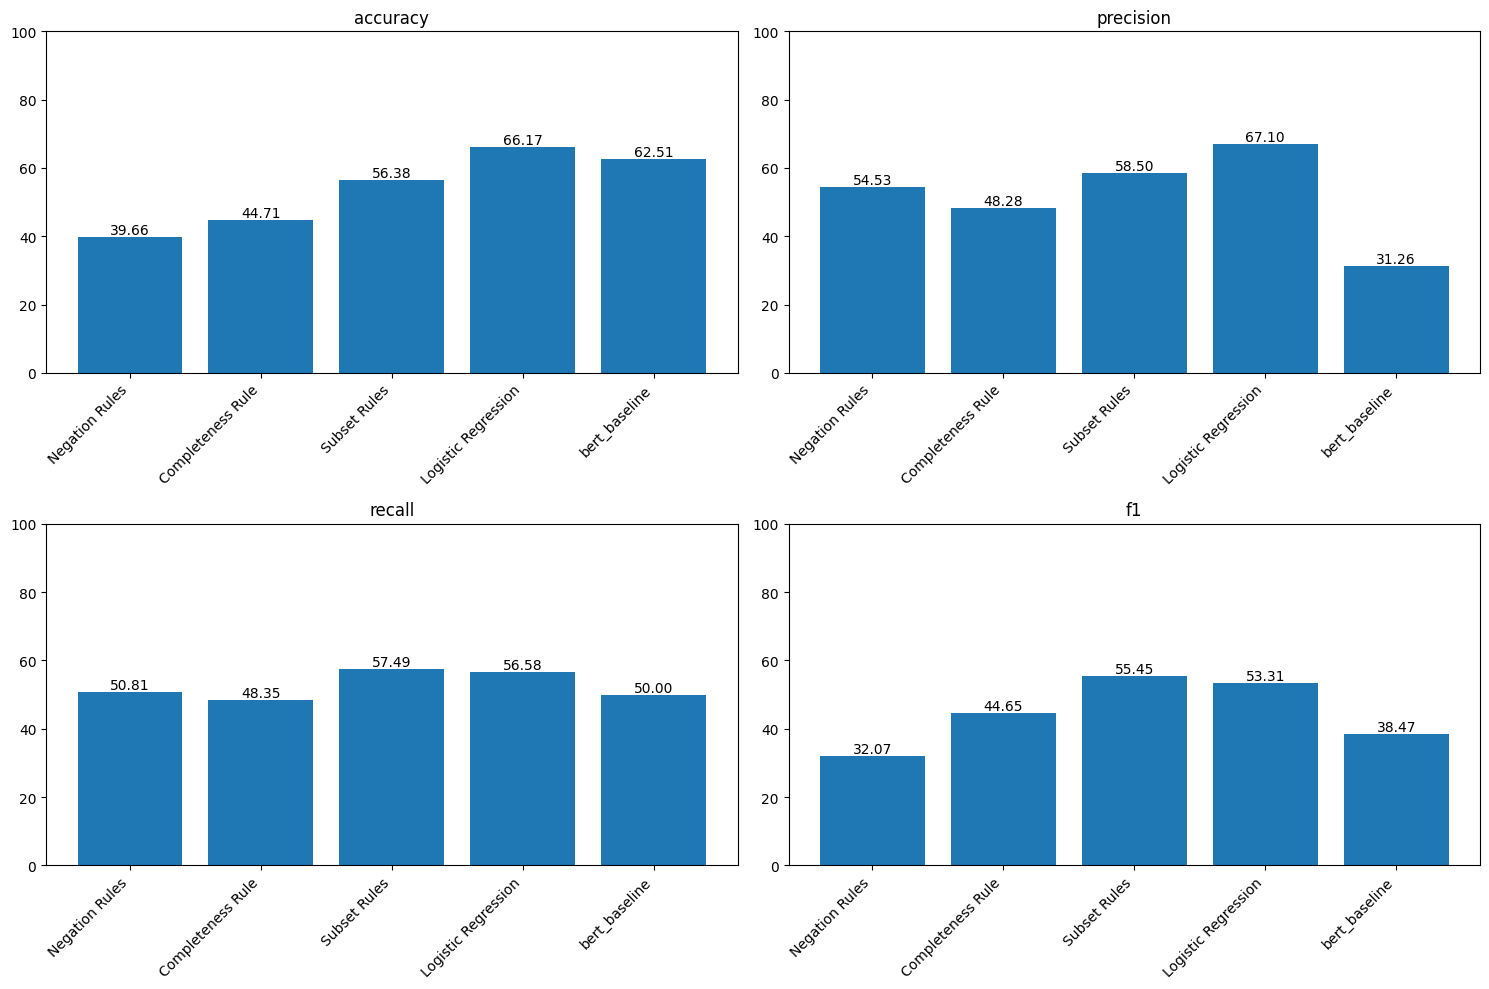

Model False Positives False Negatives  False Positives %  \
0          tfidf             578              60          30.646872   
1  bert_baseline             707               0          37.486744   

   False Negatives %   Accuracy  
0           3.181336  66.171792  
1           0.000000  62.513256

In [ ]:

# get the final metrics
metrics.run(test_new.label, test_new['prediction_bert_baseline'], "bert_baseline")
metrics.plot()

# look at false postives and negatives
append_model_results('bert_baseline', test_new)

# Display the results DataFrame
display(results_df)

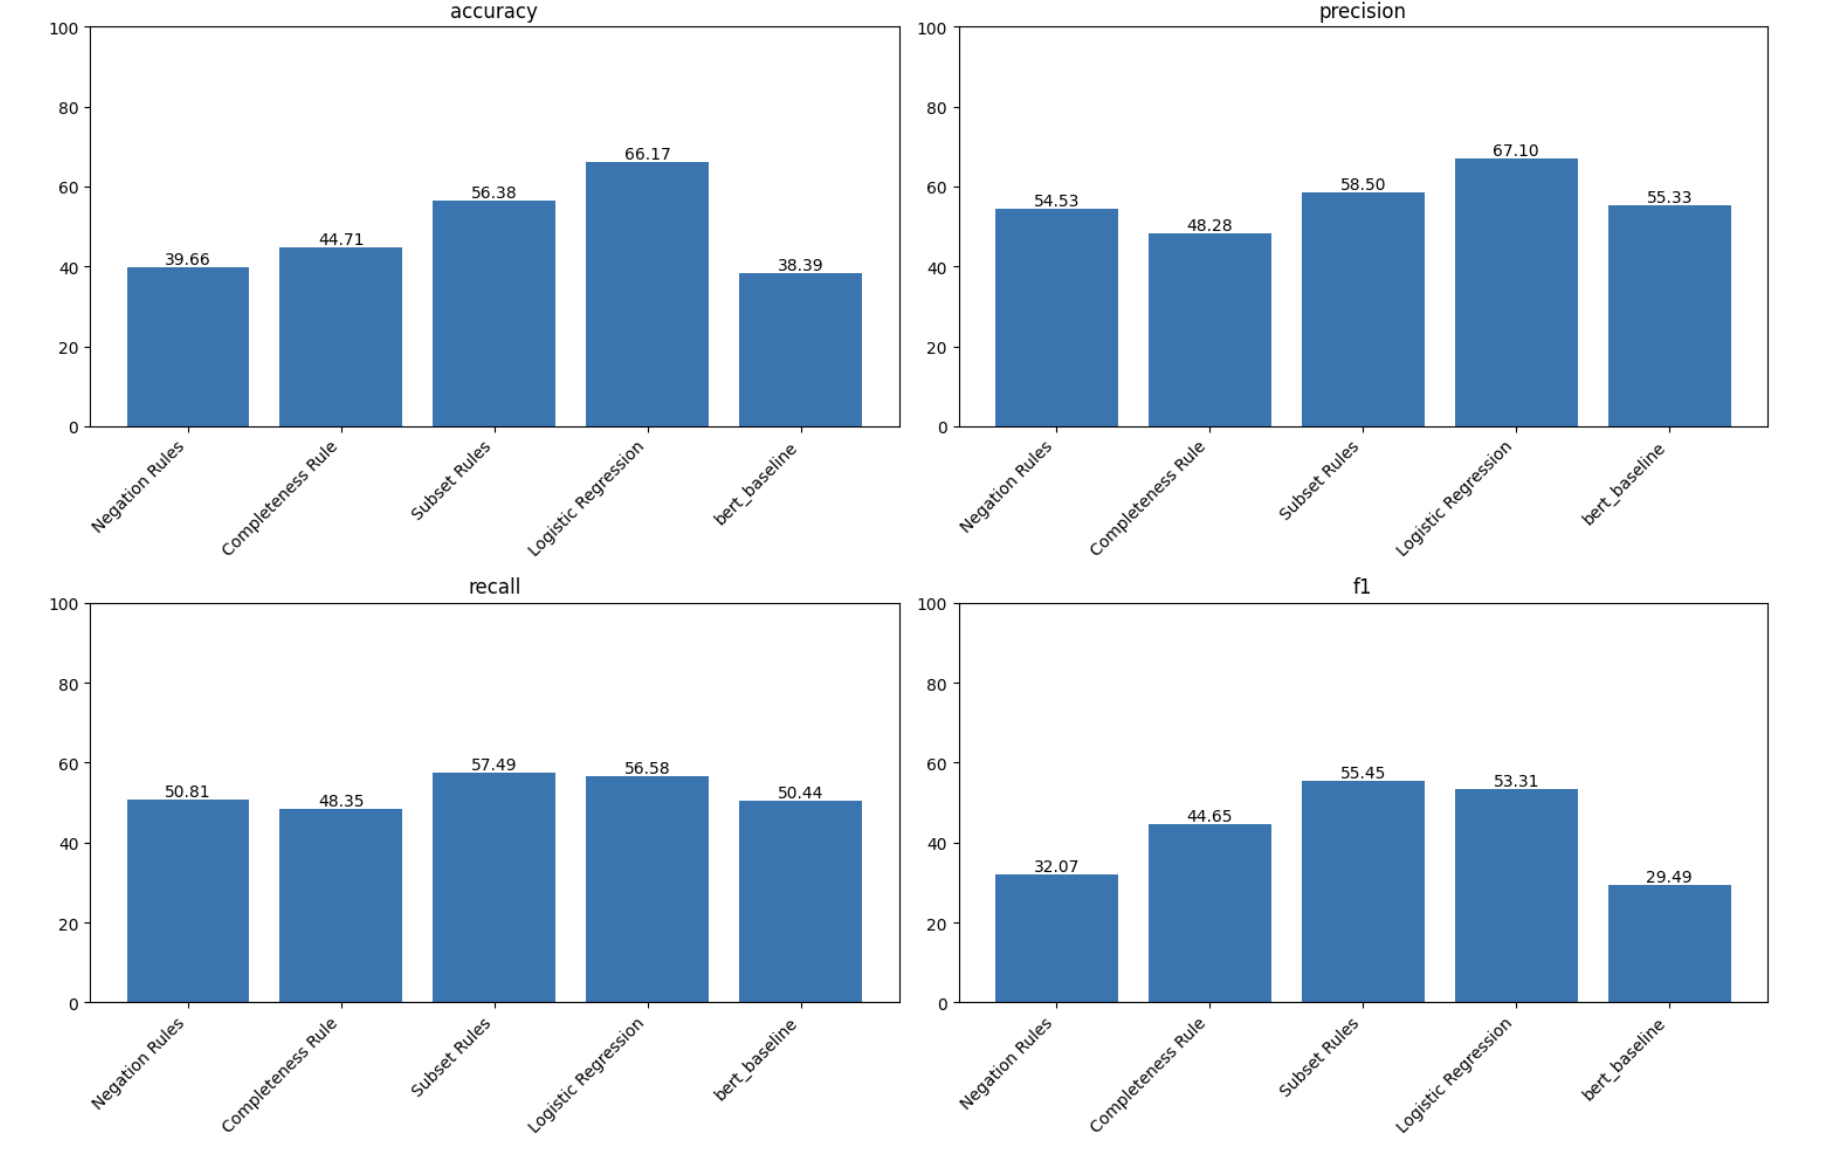

#### Confusion Matrix

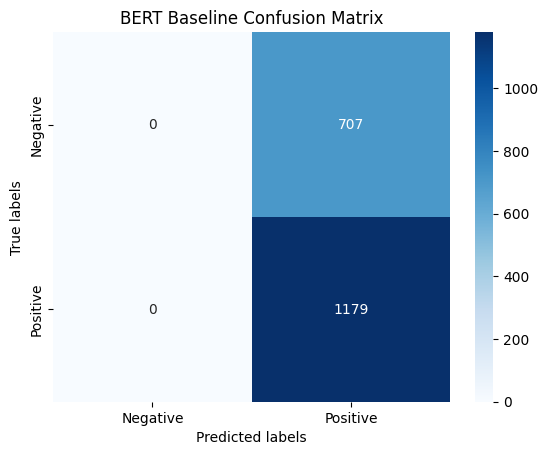

In [ ]:

cm = confusion_matrix(test_new.label, test_new['prediction_bert_baseline'])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('BERT Baseline Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

#### Analysis

We have a worse accuracy than the random classifier but we are loosing in terms of precision. Clearly, our BERT model is compensating, we can see this in the confusion matrix. We can expect the performance metrics for our NN to be low; because we are working with data that is purposely designed and generated to challenge advanced LLM.

Our model is not predicting almost any positives at the moment. This is a clear indication that the current state of the model is not particulary insightful. We will implement different techniques to improve.

We tried to look into false positives and false negatives here; however, because of the nature of the data, it is difficult to find a pattern in the FP and FN.

## Data Augmentation



### Combinatorial Approach

To augment our data set we are going to try a combinatorial approach where we take answerable questions and non-answerable questions and combine those together. We will encompass all possible combinations 1,1  1,0,  0,0 and use *and* or *or*. We will then create new labels. We have to preprocess the data for this task.

In [ ]:
# turn dataset into pandas dataframe
train_new = pd.DataFrame(train_new)

Here we get the proportions of true and false labels in the training set. So we can account for imbalances in the data.

In [ ]:
# get proportion of true to false labels
false_prop = train_new.label.value_counts()[0] / (train_new.label.value_counts().sum())
true_prop = train_new.label.value_counts()[1] / (train_new.label.value_counts().sum())

print('proportion of false labels: ' + str(false_prop))
print('proportion of true labels: ' + str(true_prop))

print('false labels: ' + str(false_prop * 32))
print('proportion of true labels: ' + str(true_prop * 32))

proportion of false labels: 0.37740352738363614
proportion of true labels: 0.6225964726163639
false labels: 12.076912876276356
proportion of true labels: 19.923087123723644


In [ ]:

# get proportion of true to false labels
false_prop = val.label.value_counts()[0] / (val.label.value_counts().sum())
true_prop = val.label.value_counts()[1] / (val.label.value_counts().sum())

print('proportion of false labels: ' + str(false_prop))
print('proportion of true labels: ' + str(true_prop))

print('false labels: ' + str(false_prop * 32))
print('proportion of true labels: ' + str(true_prop * 32))

proportion of false labels: 0.3782874617737003
proportion of true labels: 0.6217125382262997
false labels: 12.10519877675841
proportion of true labels: 19.89480122324159


In [ ]:
test_new = pd.DataFrame(test_new)

# get proportion of true to false labels
false_prop = test_new.label.value_counts()[0] / (test_new.label.value_counts().sum())
true_prop = test_new.label.value_counts()[1] / (test_new.label.value_counts().sum())

print('proportion of false labels: ' + str(false_prop))
print('proportion of true labels: ' + str(true_prop))

print('false labels: ' + str(false_prop * 32))
print('proportion of true labels: ' + str(true_prop * 32))

proportion of false labels: 0.37486744432661717
proportion of true labels: 0.6251325556733828
false labels: 11.99575821845175
proportion of true labels: 20.00424178154825


Here we combine true and false labels in a proportion of 20:12 that matches the original dataset

In [ ]:
df_true = train_new.loc[train_new.label == 1].copy()
df_false = train_new.loc[train_new.label == 0].copy()

# combine true and false labels in a proportion of 20:12 that matches the original dataset
df = pd.concat([df_true[:20], df_false[:12]])



In [ ]:
df_true_test = test_new.loc[test_new.label == 1].copy()
df_false_test = test_new.loc[test_new.label == 0].copy()

# combine true and false labels in a proportion of 20:12 that matches the original dataset
df_test = pd.concat([df_true_test[:20], df_false_test[:12]])

In [ ]:
#same for valid set
df_true_val = val.loc[val.label == 1].copy()
df_false_val = val.loc[val.label == 0].copy()

# combine true and false labels in a proportion of 20:12 that matches the original dataset
df_val = pd.concat([df_true_val[:20], df_false_val[:12]])

Now we create a function to get all combinations of 0,1 - 1,1 - 0,0

In [ ]:
def get_combinations(df):
    # Define a function to combine answers with "and" logic
    def combine_and(answer1, answer2):
        return answer1 and answer2

    # Generate all unique combinations of the indices of the DataFrame
    # We are only using the indices to avoid duplicating the data in memory
    combos = list(combinations(df.index, 2))

    # List to hold our expanded dataset
    expanded_dataset = []

    # Add original observations to the expanded dataset
    for idx, row in df.iterrows():
        expanded_dataset.append((row['question'], row['passage'], row['label']))

    # Now combine observations with "AND" logic
    for i, j in combos:
        # Access the ith and jth observations
        q1, p1, a1 = df.at[i, 'question'], df.at[i, 'passage'], df.at[i, 'label']
        q2, p2, a2 = df.at[j, 'question'], df.at[j, 'passage'], df.at[j, 'label']

        # Combine questions with "AND" logic
        combined_question_and = f"{q1} AND {q2}"
        combined_passage_and = f"{p1} AND {p2}"
        combined_label_and = combine_and(a1, a2)
        expanded_dataset.append((combined_question_and, combined_passage_and, combined_label_and))

        # Combine questions with "OR" logic - for this the label will be the same as with "AND"
        combined_question_or = f"{q1} OR {q2}"
        combined_passage_or = f"{p1} OR {p2}"
        expanded_dataset.append((combined_question_or, combined_passage_or, combined_label_and))


    # Create a DataFrame from the expanded dataset
    return pd.DataFrame(expanded_dataset, columns=['question', 'passage', 'label'])

# Now expanded_df contains all your combined observations including the original ones

In [ ]:
# get the combinations
expanded_df_train = get_combinations(df)

expanded_df_val = get_combinations(df_val)

expanded_df_test = get_combinations(df_test)

In [ ]:
print(expanded_df_train.info())
print(expanded_df_val.info())
print(expanded_df_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  1024 non-null   object
 1   passage   1024 non-null   object
 2   label     1024 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 24.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  1024 non-null   object
 1   passage   1024 non-null   object
 2   label     1024 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 24.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  1024 non-null   object
 1   passage   1024 non-null   object
 2   label     1024 non-null   int64 


We know this worked correctly, because we are choosing 2 statements without replacement from 32 statements which is 496 combnintations. We do this twice, once for AND statements and once for OR statements, so 496*2=992. Additionally, we keep the 32 original statements, so 992+32=1024.
___

Now we will redo our preprocessing and then retrain the BERT model.

recreating the all_text column again

In [ ]:
expanded_df_train['all_text'] = expanded_df_train['question'] + ' ' + expanded_df_train['passage']
expanded_df_val['all_text'] = expanded_df_val['question'] + ' ' + expanded_df_val['passage']

##### Train Model

In [ ]:
#Assuming you have all the necessary imports and data

 #Call the function with appropriate arguments
# trained_model, history = train_bert_model(
#   model_name="bert_aug_1",
#   model=bert_model,
#   tokenizer=tokenizer,
#   train_data=expanded_df_train,
#   val_data=expanded_df_val,
#   num_labels=num_labels,
#   max_length=max_length,
#   batch_size=batch_size,
#   learning_rate=learning_rate,
#   num_epochs=num_epochs
# )

# Load the weights
weights_path = path + 'bert_aug_1.h5'
# weights_path = '/content/drive/MyDrive/bert_aug_1.h5'
bert_model.load_weights(weights_path)

In [ ]:
test_new_with_predictions = predict_with_bert_model(
    model=bert_model,
    tokenizer=tokenizer,
    test_data=test_new,
    model_name="bert_aug_combo",
)

59/59 [==============================] - 4s 62ms/step


##### Metrics Plot

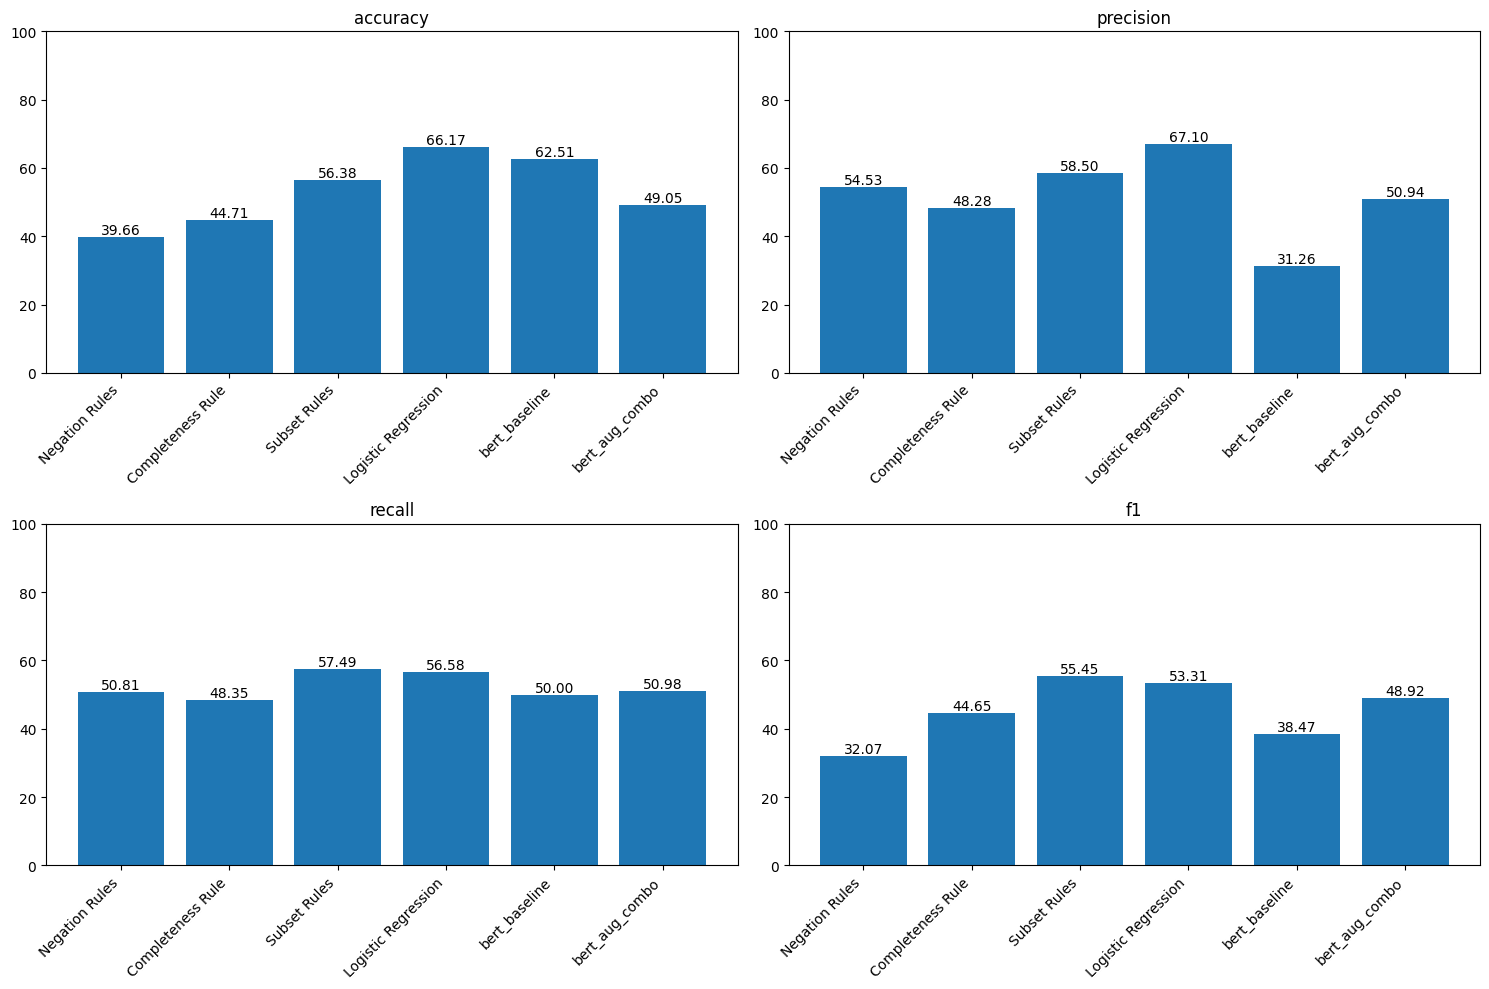

Model False Positives False Negatives  False Positives %  \
0           tfidf             578              60          30.646872   
1   bert_baseline             707               0          37.486744   
2  bert_aug_combo             292             669          15.482503   

   False Negatives %   Accuracy  
0           3.181336  66.171792  
1           0.000000  62.513256  
2          35.471898  49.045599

In [ ]:


# get the final metrics
metrics.run(test_new.label, test_new['prediction_bert_aug_combo'], "bert_aug_combo")
metrics.plot()

# look at false postives and negatives
append_model_results('bert_aug_combo', test_new)

# Display the results DataFrame
display(results_df)


#### Confusion Matrix

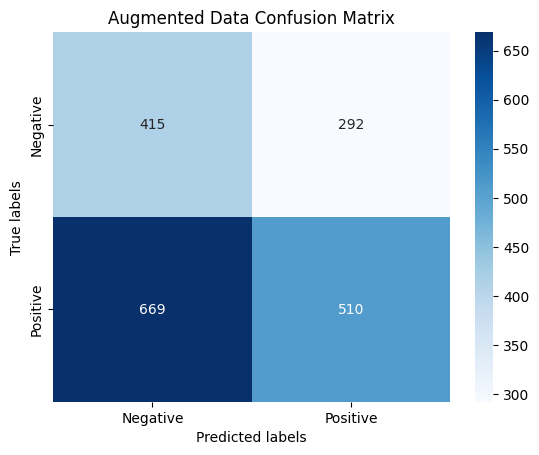

In [ ]:

cm = confusion_matrix(test_new.label, test_new['prediction_bert_aug_combo'])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Augmented Data Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

#### Analysis

It definetly got better, but we are still in the realm of the random classifier which is not good enough for the time being.

### Paraphrasing Approach
The previous approach did not work very well. This may be due to the fact that the previous approach added a lot of noise to the data by duplicating sentences and words. Now we will try the opposite method to take subsets of the passages instead of duplicating them.

First we'll randomly choose 32 labels from our dataset.

Using the BART model, specifically the 'facebook/bart-large-cnn' model, which was designed for summarization tasks, but it can also be adpated for paraphrasing. We generate paraphrased versions of each question and passage. Each question will be paraphrased once (resulting in 2 versions), and each passage will be paraphrased three times (resulting in 4 versions).

For each original label, we generate all possible combinations of questions and passages, leading to 8 different combinations per label, a total of 256 new data.

Then we'll combine the paraphrased questions with the paraphrased passages as per the generated combinations.

In [ ]:
from transformers import BartForConditionalGeneration, BartTokenizer
import itertools
from itertools import product
import string  # Import the string module

def load_model_and_tokenizer(model_name='facebook/bart-large-cnn'):
    tokenizer = BartTokenizer.from_pretrained(model_name)
    model_bart = BartForConditionalGeneration.from_pretrained(model_name)
    return tokenizer, model_bart

tokenizer, model_bart = load_model_and_tokenizer()

def paraphrase_text(text, text_type, tokenizer, model_bart):
    # Specify the number of paraphrases to generate, not including the original
    num_return_sequences = 1 if text_type == 'question' else 3

    # Adjust prefix as per requirement
    prefixed_text = f"{text} </s>"

    print("Prefixed text:", prefixed_text)

    # Prepare the model input
    input_ids = tokenizer(prefixed_text, return_tensors='pt', max_length=max_length, truncation=True)['input_ids']

    # Generate paraphrased text with adjusted parameters for improved output
    outputs = model_bart.generate(
        input_ids,
        max_length=64,  # Maximum length of the output text
        num_beams=5,  # Use beam search with 5 beams
        temperature=0.7,  # Slightly random to increase diversity of output
        num_return_sequences=num_return_sequences,  # Number of paraphrases to generate
        no_repeat_ngram_size=2,  # Prevent repeating 2-grams
        early_stopping=True  # Stop generating when all beams reach the EOS token
    )

    # Decode the generated text back into readable strings
    paraphrases = [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]

    return paraphrases



def preprocess_text(text):
    # Ensure text is a string
    text = str(text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Trim whitespace
    text = text.strip()
    # Convert to lowercase
    text = text.lower()
    return text

def validate_text(text):
    # List of values to check for
    invalid_values = ['True', 'False']

    if text in invalid_values:
        return False  # Indicate invalid or handle as needed
    return True


def process_dataset_with_combinations(dataset, subset_size=None):
    if subset_size is not None and subset_size > 0:
        selected_data = dataset.head(subset_size)
    else:
        selected_data = dataset

    all_combinations = []  # To store all generated combinations

    for _, row in selected_data.iterrows():
        question_text = preprocess_text(row['question'])
        passage_text = preprocess_text(row['passage'])

        # Moved inside the loop to ensure it checks every row
        if validate_text(question_text) and validate_text(passage_text):
            # Note: You should use the preprocessed texts here
            question_versions = [question_text] + paraphrase_text(question_text, 'question', tokenizer, model_bart)[:1]
            passage_versions = [passage_text] + paraphrase_text(passage_text, 'passage', tokenizer, model_bart)[:3]

            # Combine question 1 with the first two passages
            all_combinations.append({
                'question': question_versions[0],  # Original question
                'passage': passage_versions[0],  # Original passage
                'label': row['label'],
                'idx': row['idx']
            })
            all_combinations.append({
                'question': question_versions[0],  # Original question
                'passage': passage_versions[1],  # First paraphrased passage
                'label': row['label'],
                'idx': row['idx']
            })

            # Combine question 2 with the last two passages
            all_combinations.append({
                'question': question_versions[1],  # Paraphrased question
                'passage': passage_versions[2],  # Second paraphrased passage
                'label': row['label'],
                'idx': row['idx']
            })
            all_combinations.append({
                'question': question_versions[1],  # Paraphrased question
                'passage': passage_versions[3],  # Third paraphrased passage
                'label': row['label'],
                'idx': row['idx']
            })

            # Additional combinations
            all_combinations.append({
                'question': question_versions[0],  # Original question
                'passage': passage_versions[2],   # Second paraphrased passage
                'label': row['label'],
                'idx': row['idx']
            })
            all_combinations.append({
                'question': question_versions[0],  # Original question
                'passage': passage_versions[3],  # Third paraphrased passage
                'label': row['label'],
                'idx': row['idx']
            })

            all_combinations.append({
                'question': question_versions[1],  # Paraphrased question
                'passage': passage_versions[0],  # Original passage
                'label': row['label'],
                'idx': row['idx']
            })
            all_combinations.append({
                'question': question_versions[1],  # Paraphrased question
                'passage': passage_versions[1],  # First paraphrased passage
                'label': row['label'],
                'idx': row['idx']
            })

    # Convert the list of combinations to a DataFrame
    generated_df = pd.DataFrame(all_combinations)

    return generated_df


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

Here we create the data sets.

In [ ]:
# train_aug_data = process_dataset_with_combinations(train_new)
# print(train_aug_data)
# #save new data to a CSV file
# train_aug_data.to_csv('train_aug_data.csv', index=False)
# print(train_aug_data.shape)

In [ ]:
# # Assuming `val_new` is your validation DataFrame
# val_aug_data = process_dataset_with_combinations(val)

# # Optionally, save to CSV
# val_aug_data.to_csv('val_aug_data.csv', index=False)


Here for computational sake, we load the csvs from disk.

In [ ]:
#in case we need to load the new data from files
train_aug_data = pd.read_csv(path + 'train_aug_data.csv')
val_aug_data = pd.read_csv(path + 'val_aug_data .csv')

# merge premise and hypothesis into one column
train_aug_data['all_text'] = train_aug_data['question'] + ' ' + train_aug_data['passage']
val_aug_data['all_text'] = val_aug_data['question'] + ' ' + val_aug_data['passage']

max_passage_length = 64  # Define the maximum length for passages

# Truncate passages to the maximum length
train_aug_data['all_text'] = train_aug_data['all_text'].str.slice(0, max_passage_length)
val_aug_data['all_text'] = val_aug_data['all_text'].str.slice(0, max_passage_length)

##### Train Model

In [ ]:
checkpoint="distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = TFAutoModel.from_pretrained(checkpoint)
max_length=128 # had to increase this so the new data inputs wouldn't be too large


# #Call the function with appropriate arguments
# trained_model, history = train_bert_model(
#   model_name="bert_aug",
#   model=bert_model,
#   tokenizer=tokenizer,
#   train_data=train_aug_data,
#   val_data=val_aug_data,
#   num_labels=num_labels,
#   max_length=max_length,
#   batch_size=batch_size,
#   learning_rate=learning_rate,
#   num_epochs=num_epochs
# )

# # Load the weights
weights_path = path + '/bert_aug.h5'
#weights_path = '/content/drive/MyDrive/bert_aug.h5'
bert_model.load_weights(weights_path)



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [ ]:
test_new_with_predictions = predict_with_bert_model(
    model=bert_model,
    tokenizer=tokenizer,
    test_data=test_new,
    model_name="bert_aug_paraphrase",
)

59/59 [==============================] - 4s 62ms/step


##### Metrics Plot

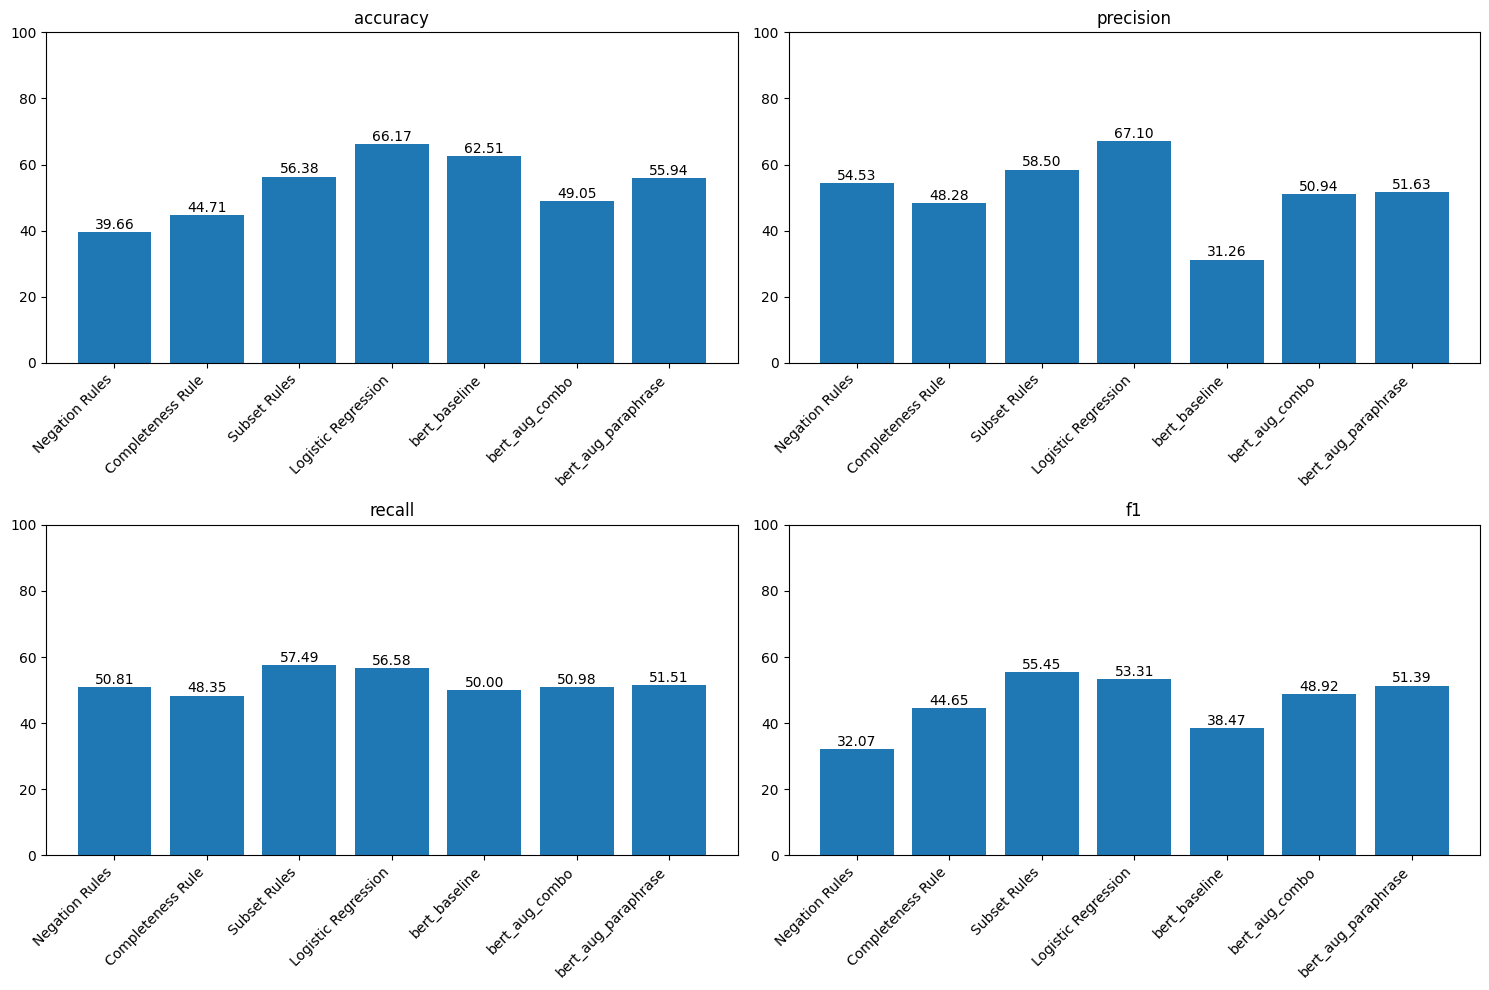

In [ ]:

# get the final metrics
metrics.run(test_new.label, test_new['prediction_bert_aug_paraphrase'], "bert_aug_paraphrase")
metrics.plot()

In [ ]:
# look at false postives and negatives
append_model_results('bert_aug_paraphrase', test_new)

# Display the results DataFrame
display(results_df)

Model False Positives False Negatives  False Positives %  \
0                tfidf             578              60          30.646872   
1        bert_baseline             707               0          37.486744   
2       bert_aug_combo             292             669          15.482503   
3  bert_aug_paraphrase             468             363          24.814422   

   False Negatives %   Accuracy  
0           3.181336  66.171792  
1           0.000000  62.513256  
2          35.471898  49.045599  
3          19.247084  55.938494

Looking at the results, the BERT model augmented with paraphrases outperforms other variations with a 55.94% accuracy, indicating that paraphrasing as a form of data augmentation can effectively enhance model performance by reducing false negatives to 363 and maintaining a lower rate of false positives at 468. These results are sign that  paraphrasing, can be a good way in improving model robustness and accuracy, we hope to see an even better performance when utilizing the entire dataset to train the model (on top of the newly generated data).

##### Confusion Matrix

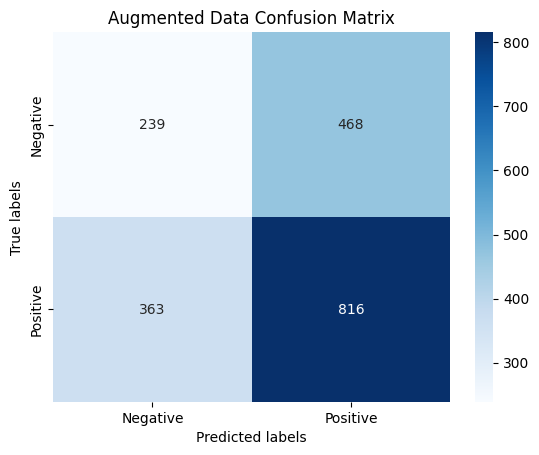

In [ ]:

cm = confusion_matrix(test_new.label, test_new['prediction_bert_aug_paraphrase'])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Augmented Data Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

##### Analysis

This confusion matrix is much more balanced than in the previous prediction. The improvement is clear.

## Zero Shot Learning

**Model Selection Background**

In zero-shot learning, we use a pre-trained model without any additional training data.

For our Zero Shot model, we chose the Multilingual MiniLMv2-L6-mnli-xnli from Hugging Face. This model is a distilled version of the DeBerta model from Microsoft. This version of the model is a 6 layer model that is trained on the XNLI dataset in 14 languages and the full MNLI dataset in English.

The MNLI dataset also known as Multi-Genre Natural Language Inference, is a dataset contains data that has a premise and a hypothesis, then a label of entailment, contradiction, or neutral. The XNLI dataset is a cross-lingual natural language inference dataset that is a subset of the MNLI dataset.

___

**Iterations of Predictions**

tried cleaning the passages and questions by removing stopwords and lowercasing
had two general approaches
1. putting the passage and the question together for the cleaned and the not cleaned dataset. for this we tried different sub methods, such as adding a "?" at the end of the question, just plainly adding the two together and also changing the order of the question and the passage
2. was having the question seperate to the passage and using the question to make the hypothesis.
   different versions of the hypothesis tested:
   hypothesis = f"The statement: '{row['question']}' is true."
   hypothesis = f"This is inaccurate '{row['question']}' and it is completely false."
    #hypothesis = f"Is this '{row['question']}' true or false."
    #hypothesis = f"This is a correct statement: '{row['question_cleaned']}'"
   then we performed zero-shot classification using the passage and the different hypotheses, did it using the cleaned and the origional version
Overall the issue was that there is a significant bias towards predicting positive values, so stateting that the question given the passage is answered by yes. this is why we specifically tried to have a hypothesis stating it is false and trying to overcome the bias this way, but it did not help and even led to a false negative classification, an issue we did not have before.

In [ ]:
def predict_with_zero_shot(df):
    # Load the zero-shot-classification pipeline with the specified model
    classifier = pipeline("zero-shot-classification", model="MoritzLaurer/multilingual-MiniLMv2-L6-mnli-xnli")

    # Candidate labels are 'Yes' and 'No'
    candidate_labels = ['Yes', 'No']

    # Initialize a list to store the predicted labels
    predicted_probabilities = []
    predicted_labels = []

    for idx, row in df.iterrows():
        # Combine the question and passage into one text
        combined_text = row['passage'] + " " + row['question']

        # Perform zero-shot classification using the combined text
        output = classifier(
            combined_text,
            candidate_labels=candidate_labels,
            multi_label=False
        )

        # The classifier returns 'Yes' or 'No', which we convert to 1 or 0 respectively
        predicted_label = 1 if output['labels'][0] == 'Yes' else 0
        predicted_labels.append(predicted_label)

      # Also store the probability of the predicted label
        # This is the probability associated with the 'Yes' label if predicted_label is 1, otherwise it's for 'No'
        predicted_probability = output['scores'][0] if predicted_label == 1 else output['scores'][1]
        predicted_probabilities.append(output['scores'])

    return predicted_labels, predicted_probabilities


#### Zero Shot Predictions - 32 Labels

In [ ]:
test_new_first_32 = test_new.iloc[:32]

In [ ]:
train_preds_32, train_probs_32 = predict_with_zero_shot(test_new_first_32)


config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/428M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

In [ ]:
print(train_preds_32)
print(train_probs_32)

[1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[[0.646230161190033, 0.35376977920532227], [0.549923300743103, 0.450076699256897], [0.5341006517410278, 0.46589934825897217], [0.6084657907485962, 0.3915342092514038], [0.5501261353492737, 0.44987383484840393], [0.5863891839981079, 0.4136107563972473], [0.7384564280509949, 0.2615436017513275], [0.6807104349136353, 0.3192896246910095], [0.6669725775718689, 0.3330273926258087], [0.7186519503593445, 0.2813480496406555], [0.7492772936820984, 0.2507227063179016], [0.8170722126960754, 0.18292777240276337], [0.7772281765937805, 0.22277182340621948], [0.8380408883094788, 0.16195909678936005], [0.5049410462379456, 0.4950590133666992], [0.8355842232704163, 0.16441576182842255], [0.6645470261573792, 0.33545294404029846], [0.6487777829170227, 0.3512221574783325], [0.7287935018539429, 0.27120646834373474], [0.5415768623352051, 0.45842307806015015], [0.7678331732749939, 0.23216678202152252], [0.700743913

In [ ]:
test_new_first_32['prediction_zero_shot'] = train_preds_32

In [ ]:
# Calculate the number of correct predictions
correct_predictions = (test_new_first_32['label'] == test_new_first_32['prediction_zero_shot']).sum()
accuracy = correct_predictions / len(test_new_first_32)

print(f"Number of correctly classified instances: {correct_predictions}")
print(f"Accuracy: {accuracy:.2f}")

Number of correctly classified instances: 21
Accuracy: 0.66


In [ ]:
# Filter the DataFrame for rows where both predicted_label and label are 0
correct_zero_predictions_df = test_new_first_32[(test_new_first_32['prediction_zero_shot'] == 0) & (test_new_first_32['label'] == 0)]

# Display these rows
correct_zero_predictions_df


question  \
2362  has there ever been a host team in the super bowl   
6755            is it possible to make gravity in space   

                                                passage   idx  label  \
2362  Super Bowl curse -- The home field curse affec...  2362      0   
6755  Artificial gravity -- Rotational simulated gra...  6755      0   

                                               all_text  prediction_tfidf  \
2362  has there ever been a host team in the super b...                 0   
6755  is it possible to make gravity in space Artifi...                 1   

      prediction_bert_baseline  prediction_bert_aug_combo  \
2362                         1                          0   
6755                         1                          1   

      prediction_bert_aug_paraphrase  prediction_zero_shot  
2362                               0                     0  
6755                               1                     0

In [ ]:
# print(correct_zero_predictions_df.iloc[0]['passage'])

Perhaps this one was correctly classified as a no answer, because the text is quite staigthforward as it say that "It (Epsom railway station) is not on the London Oyster card zone...".

#### Zero-Shot Prediction - entire dataset

In [ ]:
preds_zero_shot, probs = predict_with_zero_shot(test_new)

##### Metrics Plot

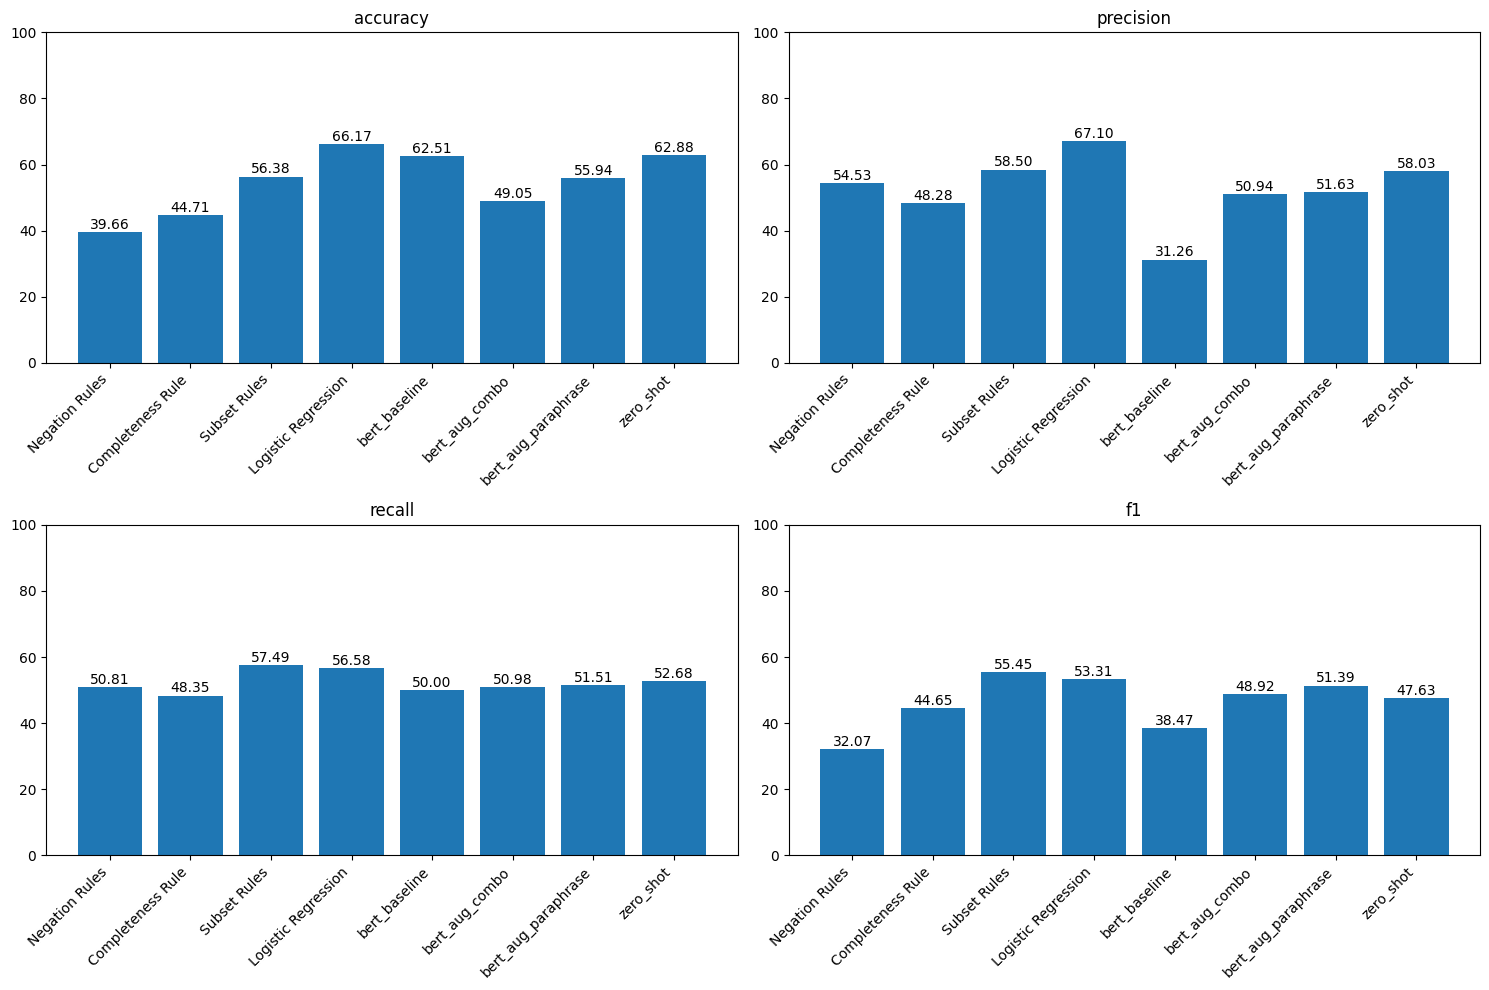

Model False Positives False Negatives  False Positives %  \
0                tfidf             578              60          30.646872   
1        bert_baseline             707               0          37.486744   
2       bert_aug_combo             292             669          15.482503   
3  bert_aug_paraphrase             468             363          24.814422   
4            zero_shot             623              77          33.032874   

   False Negatives %   Accuracy  
0           3.181336  66.171792  
1           0.000000  62.513256  
2          35.471898  49.045599  
3          19.247084  55.938494  
4           4.082715  62.884411

In [ ]:
test_new['prediction_zero_shot'] = preds_zero_shot

# get the final metrics
metrics.run(test_new.label, test_new['prediction_zero_shot'], "zero_shot")
metrics.plot()

# look at false postives and negatives
append_model_results('zero_shot', test_new)

# Display the results DataFrame
display(results_df)

##### Confusion Matrix

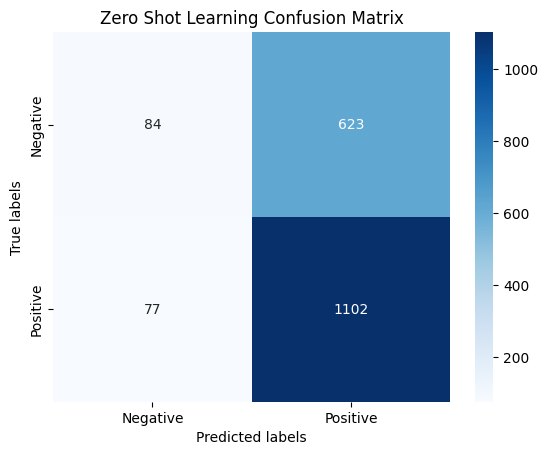

In [ ]:
cm = confusion_matrix(test_new.label, test_new['prediction_zero_shot'])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Zero Shot Learning Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

##### Analysis

Possible explanation why the zero-shot learning model is predicting much more likely a yes than a no the question asked given the passage. The confusion matrix depicts that there is a high number of false negatives and low number of false positives. The task we are looking at, of predicting whether a question can be answered by yes or no given a text passage from Wikipedia reasoning a yes/no answer, is highly nuanced as the passage contains similar or the same words as the question. Thus, understanding the highly complex context, or contrasts is crucial to correctly predict the answer. As the passage contains the words of the question, it might be likely that because of this the zero-shot learning model predicts a yes answer.

The zero-shot learning model has two uses cases, first is having a sentence and predicting a label/labels from a predefined set of labels. The second use case is having two texts (hypothesis and premise) and check whether they entail, contradict, or are neutral to one another. We tried using both uses cases for this exercise, ended up up using the first one as it performed a bit better, the issue of an false positives is even more severe in the context of the second use case. Explanation: thinking about entailment: is the question entail by the passage, this might be more likely predicted if the words in the question and the passage are similar, unless there is maybe a strict negation as it is the case with the Oyster card example above. The zero-shot learning model were are using is a distilled model with only six layers, hence perhaps the model we are using is not complex enough to capture the nuances necessary to predict the answer sufficiently (poor generalization to unseen classes due to lacking complexity).

https://huggingface.co/MoritzLaurer/multilingual-MiniLMv2-L6-mnli-xnli

## Data Generation with LLM

Based on the notebook from the practical, there are a few possible steps we can take.
* First, we will tell an LLM to generate 5-10 manually validatable boolean yes or no based on the Boolean question and the response, then analyze the generated data.
* Second, we will use a second LLM to help train the first LLM to tailor correct responses according to the training dataset, and then analyze the progression.
* Third, we will then ask the first LLM to generate 5-10 manually validatable boolean yes or no based on the Boolean question and the response, then analyze the generated data.
* Finally, once we validate some of the generated data, we will use the generated data to train a model.

#### Initial LLM Prompts

In [ ]:
true_prompt = '''
You are PromptGPT3000, you are tasked with generating questions that can be answered with a yes or no response.
The questions you generate should only be answerable with a yes response.
The correct answer to the questions you generate should be yes.
You will also be responsible for generating a response to these questions.
The response you should generate should contain a passage of information that tries to answer the question.
The response should not contain any reference as to affirming or negating the question.
It also should not contain a yes or no in the response.
You should generate 5 questions and responses.
'''

false_prompt = '''
You are PromptGPT3000, you are tasked with generating questions that can be answered with a yes or no response.
The questions you generate should only be answerable with a no response.
The correct answer to the questions you generate should be no.
You will also be responsible for generating a response to these questions.
The response you should generate should contain a passage of information that tries to answer the question.
The response should not contain any reference as to affirming or negating the question.
It also should not contain a yes or no in the response.
You should generate 5 questions and responses.
'''

In [ ]:
# client = OpenAI(api_key="")

First we will generate a true prompt.

In [ ]:
# completion = client.chat.completions.create(
#   model="gpt-3.5-turbo",
#   messages=[
#     {"role": "system", "content": true_prompt},
#     {"role": "user", "content": "Compose a question and response about any random topic of your choosing."}
#   ]
# )

# print(completion.choices[0].message)

**True Prompt**

Can playing musical instruments help improve cognitive abilities?

Engaging in activities like playing musical instruments has been shown to have various cognitive benefits. Studies suggest that the complex mental tasks involved in playing an instrument can enhance brain function, improve memory, and increase cognitive skills like problem-solving and multitasking. Additionally, the coordination required to play an instrument can have a positive impact on overall brain health and cognitive functioning.

The generated response looks good for our purposes, there is no direct affirmation of the question, but the response is relevant to the question and contain all the necesary information to come to a full conclusion about the question.

___

Now we will generate a false prompt.

In [ ]:
# completion = client.chat.completions.create(
#   model="gpt-3.5-turbo",
#   messages=[
#     {"role": "system", "content": false_prompt},
#     {"role": "user", "content": "Compose a question and response about any random topic of your choosing."}
#   ]
# )

# print(completion.choices[0].message)

**False Prompt**

Can elephants fly like birds?

Elephants possess incredible strength and intelligence, but in terms of flight, they are not equipped to soar through the skies like birds. While they may flap their ears to cool themselves or for display, flying is not a capability they possess naturally.

This one is a bit nonsensical, but it is a good example of a false prompt. The passage is still relevant and provides any additional information needed to conclude that elephants cannot fly like birds.

___

#### Trained LLM Prompts

In the next iteration, we will try to train the LLM with some data from our training set before asking it to generate new ones.

In [ ]:
true_prompt = '''
You are PromptGPT3000, you are tasked with generating questions that can be answered with a yes or no response.
The questions you generate should only be answerable with a yes response.
The correct answer to the questions you generate should be yes.
You will also be responsible for generating a response to these questions.
The response you should generate should contain a passage of information that tries to answer the question.
The response should not contain any reference as to affirming or negating the question.
It also should not contain a yes or no in the response.
'''

false_prompt = '''
You are PromptGPT3000, you are tasked with generating questions that can be answered with a yes or no response.
The questions you generate should only be answerable with a no response.
The correct answer to the questions you generate should be no.
You will also be responsible for generating a response to these questions.
The response you should generate should contain a passage of information that tries to answer the question.
The response should not contain any reference as to affirming or negating the question.
It also should not contain a yes or no in the response.
'''

now we will augment the previous prompts by adding training set examples of false and true questions

In [ ]:
def generate_training_data_for_prompt(df,operator):
    introduction = f'''here are some examples of questions that can be answered with a {operator} response. The example questions will be prefixed with the word "Question" and will end with a new line separator. The passage will be prefixed with the word "Passage" and end when there is a new line is found.'''

    for i in range(5):
        question = df.iloc[i].question
        passage = df.iloc[i].passage
        response = f'''
        Question: {question}?
        Passage: {passage}

        '''

        introduction += response

    return introduction

df_true = train.loc[train.label == 1].copy()
df_false = train.loc[train.label == 0].copy()

true_training_prompt = generate_training_data_for_prompt(df_true[:16], 'yes') + ' make sure that there are no direct affirmations or negations of the initial question. '

false_training_prompt = generate_training_data_for_prompt(df_false[:16], 'no') + ' make sure that there are no direct affirmations or negations of the initial question. '

looking at our new training prompt

In [ ]:
print(true_training_prompt)

here are some examples of questions that can be answered with a yes response. The example questions will be prefixed with the word "Question" and will end with a new line separator. The passage will be prefixed with the word "Passage" and end when there is a new line is found.
        Question: do iran and afghanistan speak the same language?
        Passage: Persian language -- Persian (/ˈpɜːrʒən, -ʃən/), also known by its endonym Farsi (فارسی fārsi (fɒːɾˈsiː) ( listen)), is one of the Western Iranian languages within the Indo-Iranian branch of the Indo-European language family. It is primarily spoken in Iran, Afghanistan (officially known as Dari since 1958), and Tajikistan (officially known as Tajiki since the Soviet era), and some other regions which historically were Persianate societies and considered part of Greater Iran. It is written in the Persian alphabet, a modified variant of the Arabic script, which itself evolved from the Aramaic alphabet.

        
        Question: do 

In [ ]:
# completion = client.chat.completions.create(
#   model="gpt-3.5-turbo",
#   messages=[
#     {"role": "system", "content": true_training_prompt},
#     {"role": "user", "content": "Compose a question and response about any random topic of your choosing."}
#   ]
# )

# print(completion.choices[0].message)

Question: Are flamingos born gray and turn pink due to their diet?

Passage: Flamingo coloration -- Flamingos are actually born with gray feathers and gradually turn pink in the wild due to their diet which is high in beta-carotene. Beta-carotene is a pigment found in algae, crustaceans, and other foods that flamingos eat, and it is responsible for their vibrant pink coloration.



After a few iterations listed below, we have a solid prompt we can use to generate data. It looks more similar to our training data now than the initial iterations. We encountered the following hurdles when creating the prompts:
* first the prompt began answering with one line, so we added more information to the prompt to get longer passages
* the prompt also directly affirming the question so we added additional information specifying not to affirm or deny the answer to the question at the beginning and end of the prompt.

___

In [ ]:
# print(false_training_prompt)

In [ ]:
# completion = client.chat.completions.create(
#   model="gpt-3.5-turbo",
#   messages=[
#     {"role": "system", "content": false_training_prompt},
#     {"role": "user", "content": "Compose a question and response about any random topic of your choosing."}
#   ]
# )

# print(completion.choices[0].message)

Question: Can you use euros in London?

Passage: London -- London is the capital city of England and the United Kingdom. It is a global city and a leading financial center. The currency used in London is the British Pound Sterling (GBP). While some places may accept euros, it is recommended to exchange currency to GBP for transactions in London to avoid any inconvenience related to exchange rates or acceptance of foreign currency.', role='assistant', function_call=None, tool_calls=None)




This statement and question look better. The question is relevant and the response is relevant to the question, while the answer is false as we expect. The false prompt responses also look more aligned to the training data than the initial iterations, which were a bit silly in asking if elephants could fly.

However, after generating a larger amount of data from the LLM, it becomes apparent that ChatGPT is not doing well at creating new topics. There is a repetition in generated data with numerous examples of the same chocolate vs vanilla ice cream, eiffel tower, and sushi topics. This is likely due to the training data.

___

#### Final LLM Dataset Generation

In this prompt we ask chatgpt to respond with a json response. We also use a second LLM to generate new topics for the prompt generating LLM, because it was not doing well at creating new topics. We also decided to use two different LLM models, GPT-3.5-turbo and GPT-4. We generated around 300 data points with GPT-4 and around 1000 with GPT-3.5 and we will compare the performance of BERT on both.

In [ ]:
# true_prompt_client = OpenAI(api_key="")
# false_prompt_client = OpenAI(api_key="")
# topic_generator_client = OpenAI(api_key="")

In [ ]:
def generate_llm_training_data(client, prompt, num_responses, bool_answer_to_question):

    df = {'question': [], 'passage': [], 'label': []}

    for i in range(num_responses):
        topic = topic_generator_client.chat.completions.create(
            model="gpt-4-turbo-preview",
            messages=[
                {"role": "user", "content": topic_generator_content_prompt}
            ]
        )

        topic = topic.choices[0].message.content
        print(topic)

        completion = client.chat.completions.create(
            model="gpt-4-turbo-preview",
            messages=[
                {"role": "system", "content": prompt},
                {"role": "user", "content": "Compose a {bool_answer_to_question} question and response about {topic}. Make sure you have not generated a question and response about this topic before and make sure topics are as distinct as possible. Do not duplicate topics. Do not use affirmatives in the response such as yes or no. Format the output as json with keys 'Question' and 'Response'. "}
            ]
        )
        try:
            response = json.loads(completion.choices[0].message.content.replace('\n',''))
            question = response['Question']
            passage = response['Response']

            df['question'].append(question)
            df['passage'].append(passage)
            df['label'].append(bool_answer_to_question)
        except Exception as e:
            print(str(e))
            print(completion.choices[0].message.content)

    return pd.DataFrame(df)


true response generation

In [ ]:
# all_true_dfs = []

# for i in range(10):
#    true_llm_aug = generate_llm_training_data(true_prompt_client, true_training_prompt, 10, 'yes')
#    all_true_dfs.append(true_llm_aug)

# all_true_dfs = pd.concat(all_true_dfs)


false response generation

In [ ]:

# all_false_dfs = []

# for i in range(10):
#    false_llm_aug = generate_llm_training_data(false_prompt_client, false_training_prompt, 10, 'no')
#    all_false_dfs.append(false_llm_aug)

# all_false_dfs = pd.concat(all_false_dfs)



#### GPT-3.5 Dataset


##### Train Model

Now we train our model on the LLM generated data and test the performance.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# import os
# #set paths for input and output
# os.chdir('/content/drive/My Drive/Colab Notebooks/findata_data')

In [ ]:
llm_aug_data = pd.read_csv(path + 'llm_aug_data_gpt3.csv')

llm_aug_data['all_text'] = llm_aug_data['question'] + ' ' + llm_aug_data['passage']

In [ ]:
# # #Call the function with appropriate arguments
# trained_model, history = train_bert_model(
#   model_name="bert_model_gpt3_data",
#   model=bert_model,
#   tokenizer=tokenizer,
#   train_data=llm_aug_data,
#   val_data=val,
#   num_labels=num_labels,
#   max_length=max_length,
#   batch_size=32,
#   learning_rate=learning_rate,
#   num_epochs=num_epochs
# )

# Load the weights
weights_path = path + 'bert_model_gpt3_data.h5'
# weights_path = '/content/drive/MyDrive/bert_model_gpt3_data.h5'
bert_model.load_weights(weights_path)

In [ ]:
test_new_with_predictions = predict_with_bert_model(
    model=bert_model,
    tokenizer=tokenizer,
    test_data=test_new,
    model_name="bert_model_gpt3_data",
)

59/59 [==============================] - 3s 54ms/step


##### Metrics

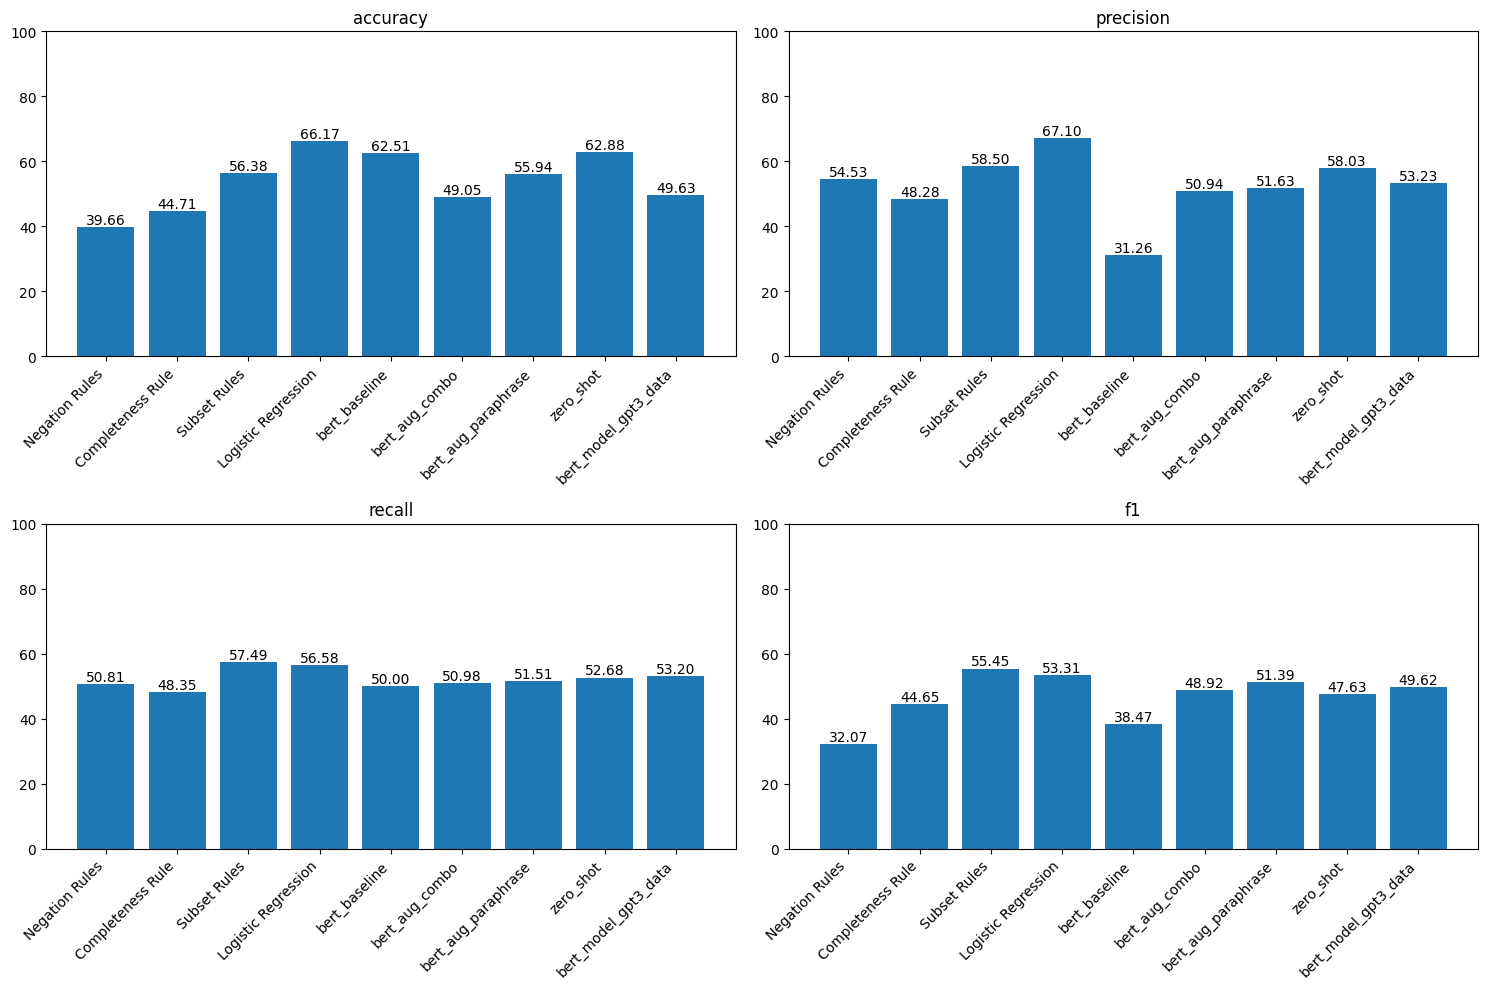

In [ ]:

# get the final metrics
metrics.run(test_new.label, test_new['prediction_bert_model_gpt3_data'], "bert_model_gpt3_data")
metrics.plot()

# look at false postives and negatives
append_model_results('bert_model_gpt3_data', test_new)


##### Confusion Matrix

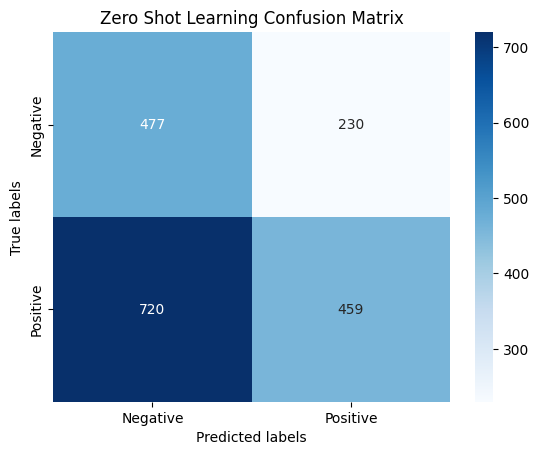

In [ ]:
cm = confusion_matrix(test_new['label'], test_new['prediction_bert_model_gpt3_data'])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Zero Shot Learning Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

#### Analysis

This is a stepback unfortunately. We are now predicting way to many false labels. Our false negative count is very high and the performance metrics dropped accross the board for this run.

#### GPT-4 Dataset

##### Train Model

In [ ]:
llm_aug_data = pd.read_csv(path + 'llm_data_aug_gpt4_all.csv')

llm_aug_data['all_text'] = llm_aug_data['question'] + ' ' + llm_aug_data['passage']

In [ ]:
llm_aug_data.loc[llm_aug_data.label == 'no', 'label'] = 0
llm_aug_data.loc[llm_aug_data.label == 'yes', 'label'] = 1

In [ ]:
llm_aug_data = llm_aug_data.dropna()

In [ ]:
# # #Call the function with appropriate arguments
# trained_model, history = train_bert_model(
#   model_name="llm_data_aug_gpt4_all",
#   model=bert_model,
#   tokenizer=tokenizer,
#   train_data=llm_aug_data,
#   val_data=train_new,
#   num_labels=num_labels,
#   max_length=max_length,
#   batch_size=batch_size,
#   learning_rate=learning_rate,
#   num_epochs=num_epochs,
#   switch_order=True
# )

# Load the weights
weights_path = path + 'llm_data_aug_gpt4_all.h5'
#weights_path = '/content/drive/MyDrive/llm_data_aug_gpt4_all.h5'
bert_model.load_weights(weights_path)

In [ ]:
test_new_with_predictions = predict_with_bert_model(
    model=bert_model,
    tokenizer=tokenizer,
    test_data=test_new,
    model_name="bert_model_gpt4_data",
)

59/59 [==============================] - 3s 51ms/step


##### Metrics

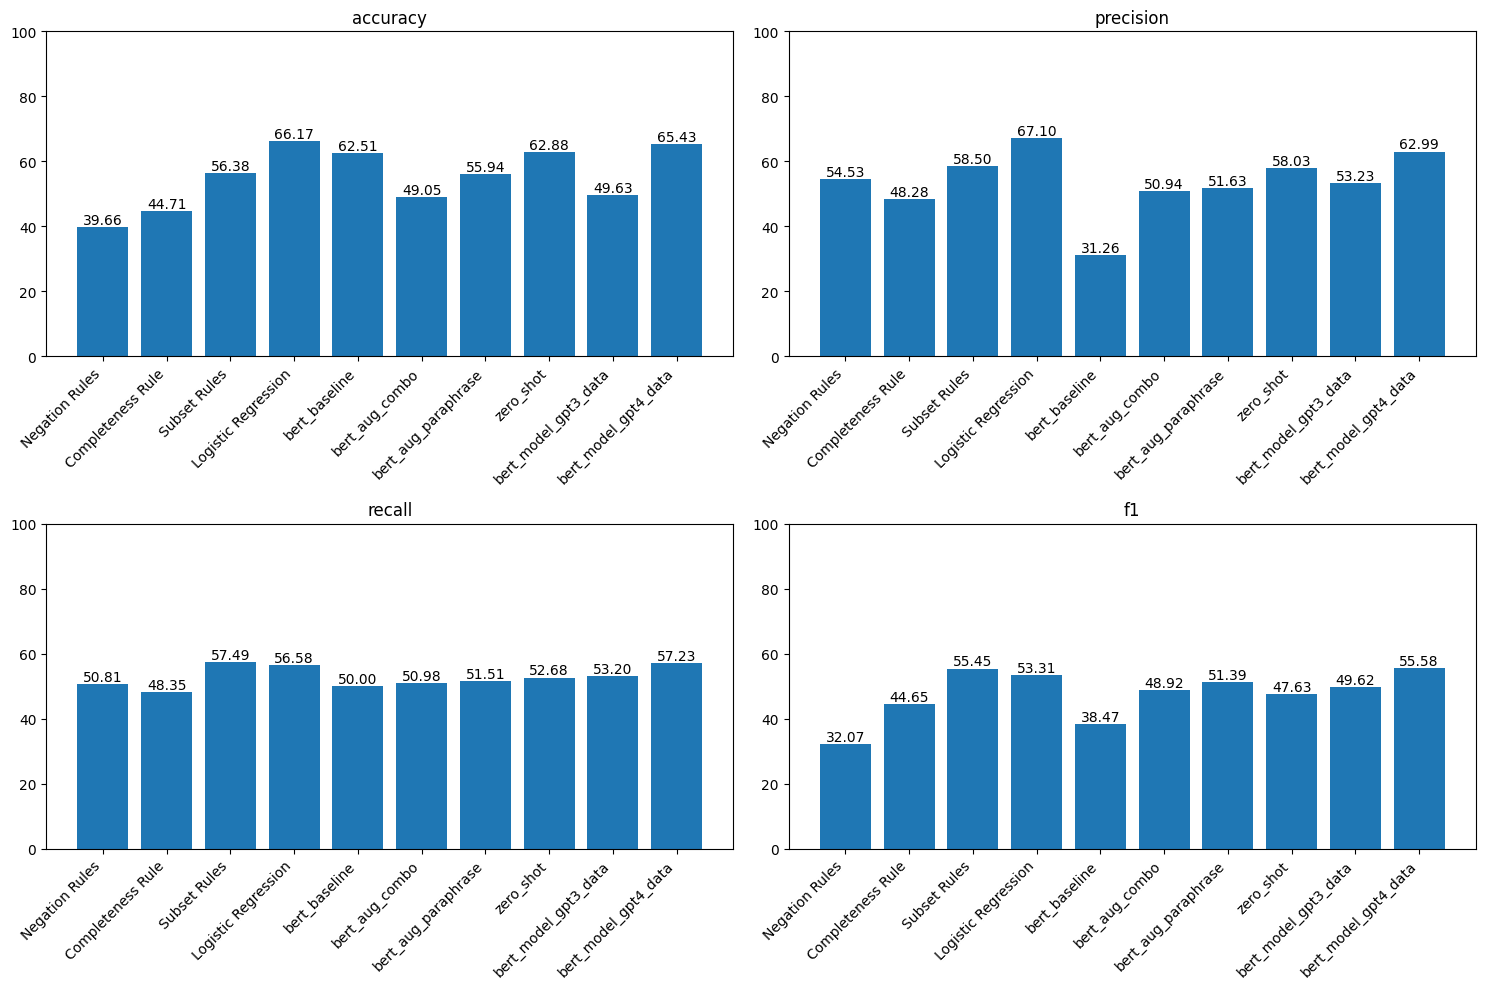

Model False Positives False Negatives  False Positives %  \
0                 tfidf             578              60          30.646872   
1         bert_baseline             707               0          37.486744   
2        bert_aug_combo             292             669          15.482503   
3   bert_aug_paraphrase             468             363          24.814422   
4             zero_shot             623              77          33.032874   
5  bert_model_gpt3_data             230             720          12.195122   
6  bert_model_gpt4_data             534             118          28.313892   

   False Negatives %   Accuracy  
0           3.181336  66.171792  
1           0.000000  62.513256  
2          35.471898  49.045599  
3          19.247084  55.938494  
4           4.082715  62.884411  
5          38.176034  49.628844  
6           6.256628  65.429480

In [ ]:

# get the final metrics
metrics.run(test_new.label, test_new['prediction_bert_model_gpt4_data'], "bert_model_gpt4_data")
metrics.plot()

# look at false postives and negatives
append_model_results('bert_model_gpt4_data', test_new)

# Display the results DataFrame
display(results_df)

##### Confusion Matrix

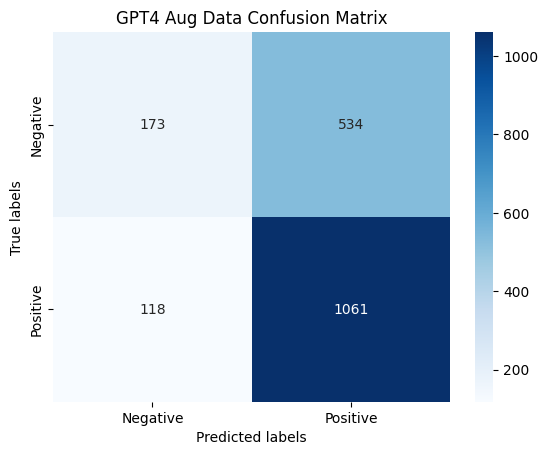

In [ ]:
cm = confusion_matrix(test_new['label'], test_new['prediction_bert_model_gpt4_data'])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('GPT4 Aug Data Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

#### Analysis

Slight improvement but still no real game-changing classification method that bolts our accuracy. Once again, the challenge lies in the prompts themselves. We do see better performance than the GPT3 generated prompts though.

## Optimal Technique Application


In a human style context, if you are able to understand a passage, you should be able to form a question about it. Using this logic, we will try to improve our model performance by masking text from the question and trying to get the model to be able to figure out what the question was given the passage.

First we will try to regex the passage setup because it looks like "Topic --- rest of the passage..." and we can mask the topic in the passage. We can also mask all nouns in the question.

For a full example:

are the members of abba married to each other?

The question turns into

are the [MASK] of [MASK] married to each other?

and the passage becomes

 [MASK] -- During the band's active years, the band was composed of two couples: Fältskog and Ulvaeus, and Lyngstad and Andersson. With the increase of their popularity, their personal lives suffered which eventually resulted in the collapse of both marriages. The relationship changes were reflected in the group's music, with later compositions featuring more introspective and dark lyrics.


 Additionally, we are implementing a RNN on top of the BERT model.  RNNs are designed to capture sequential dependencies in data, which can be beneficial for understanding the context surrounding a yes or no question. Specifically, in our setup, our question precedes the passage, so we have sequential information in the way our data is set up. This can help to improve performance.



In [ ]:
# Load the SpaCy language model
nlp = spacy.load("en_core_web_sm")

def mask_topics_and_nouns(df):

    all_text = df['question'] + ' ' + df['passage']

    # extract topic using regex to get words before first -
    topic = re.findall(r'^(.*?)--', df['passage'])[0]

    # Process the text with SpaCy
    df.question = nlp(df.question)

    # find all nouns in the question
    mask_words = [token.text for token in df.question if token.pos_ == "NOUN"] + [topic]

    # concat the passage and question
    all_text = nlp(all_text)

    # Mask tokens based on POS tags or specific words
    masked_tokens = []
    for token in all_text:

        if token.text.lower() in mask_words:
          masked_tokens.append("[MASK]")
        else:
          masked_tokens.append(token.text.lower())

    # Reconstruct the masked sentence
    masked_sentence = " ".join(masked_tokens)
    return masked_sentence



train_new_masked = train_new.copy()
train_new_masked['all_text'] = train_new_masked.apply(lambda x: mask_topics_and_nouns(x), axis=1)

val_new_masked = val.copy()
val_new_masked['all_text'] = val.apply(lambda x: mask_topics_and_nouns(x), axis=1)

test_new_masked = test_new.copy()
test_new_masked['all_text'] = test_new.apply(lambda x: mask_topics_and_nouns(x), axis=1)

In [132]:
train_new_masked = pd.read_csv(path + 'train_masked.csv')
val_new_masked = pd.read_csv(path + 'val_masked.csv')
test_new_masked = pd.read_csv(path + 'test_masked.csv')

#### Build Model

Building the RNN model based on HW2.


In [130]:
# Define inputs
input_ids_in = tf.keras.layers.Input(shape=(max_length,), name='input_token', dtype='int32')
input_masks_in = tf.keras.layers.Input(shape=(max_length,), name='masked_token', dtype='int32')

# Get embeddings from the BERT model
# Adjust this line to match the expected input format of your specific BERT model
embedding_layer = model([input_ids_in, input_masks_in])

# Assuming the first element of the output is what you need
# Double-check based on how your BERT model is structured
final_embedding_layer = embedding_layer[0]

# LSTM layer
lstm_units = 64
lstm_layer = tf.keras.layers.LSTM(lstm_units, return_sequences=False)(final_embedding_layer)

# Dropout layer
dropout_rate = 0.1  # Specify your dropout rate
dropout_layer_rnn = tf.keras.layers.Dropout(dropout_rate, name='do_layer')(lstm_layer)

# Output layer
num_labels = 2  # Adjust this based on your task
output_layer_rnn = tf.keras.layers.Dense(num_labels, kernel_initializer="glorot_uniform", activation='softmax')(dropout_layer_rnn)

# Create and compile the model
bert_model_rnn = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs=output_layer_rnn)
bert_model_rnn.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_token (InputLayer)    [(None, 128)]                0         []                            
                                                                                                  
 masked_token (InputLayer)   [(None, 128)]                0         []                            
                                                                                                  
 tf_distil_bert_model_2 (TF  TFBaseModelOutput(last_hid   6636288   ['input_token[0][0]',         
 DistilBertModel)            den_state=(None, 128, 768)   0          'masked_token[0][0]']        
                             , hidden_states=None, atte                                           
                             ntions=None)                                                   

#### Train Model

setting up the data

In [133]:
#compile the model
bert_model_rnn.compile(optimizer=Adam(.0001),
                       metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision()],
                       loss=tf.keras.losses.CategoricalCrossentropy())

train_labels = to_categorical(train_new_masked['label'], num_classes=num_labels).copy()
valid_labels = to_categorical(val_new_masked['label'], num_classes=num_labels).copy()


# #convert data into numpy array
X_train = np.array(train_new_masked['all_text'])
y_train = np.array(train_labels)
X_valid = np.array(val_new_masked['all_text'])
y_valid = np.array(valid_labels)

# Create generators for training and validation data
train_generator = get_batches(X_train, y_train, tokenizer, batch_size, max_length)
valid_generator = get_batches(X_valid, y_valid, tokenizer, batch_size, max_length)

# Get the number of steps per epoch for training data
train_steps_per_epoch = len(X_train) // batch_size

# Get the number of steps per epoch for validation data
valid_steps_per_epoch = len(X_valid) // batch_size

In [ ]:
#setup early stopping to stop training when validation loss stops improving (from practice notebook)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

history = bert_model_rnn.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    epochs=num_epochs,
    validation_data=valid_generator,
    validation_steps=valid_steps_per_epoch,
    callbacks=[early_stopping]
)

In [134]:
weights_path = path+ 'rnn_bert.h5'
#weights_path = '/content/drive/MyDrive/rnn_bert.h5'
bert_model_rnn.load_weights(weights_path)

test_new_with_predictions = predict_with_bert_model(
    model=bert_model_rnn,
    tokenizer=tokenizer,
    test_data=test_new,
    model_name="bert_optimal",
)


59/59 [==============================] - 7s 69ms/step


Metrics

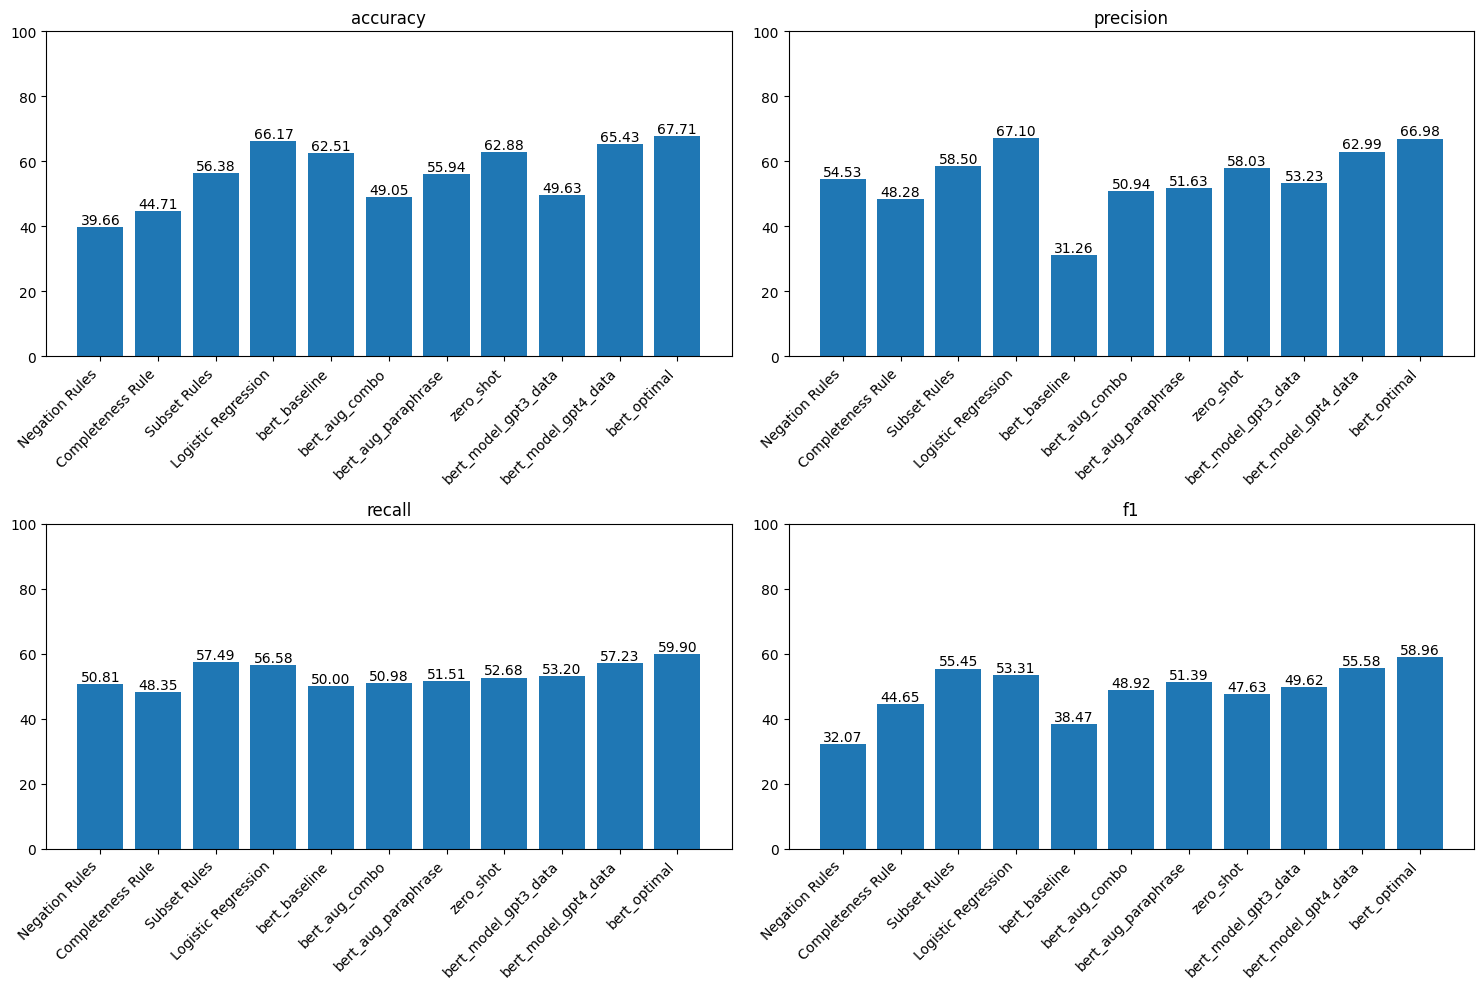

Model False Positives False Negatives  \
0                           tfidf             578              60   
1                   bert_baseline             707               0   
2                  bert_aug_combo             292             669   
3             bert_aug_paraphrase             468             363   
4                       zero_shot             623              77   
5            bert_model_gpt3_data             230             720   
6            bert_model_gpt4_data             534             118   
7                  bert_aug1_full             333             367   
8                   bert_aug_full             357             274   
9                       zero_shot             623              77   
10  bert_model_llm_augmented_data             392             194   
11                   bert_optimal             504             105   

    False Positives %  False Negatives %   Accuracy  
0           30.646872           3.181336  66.171792  
1           37.486744           0.000000  62.513256  
2           15.482503          35.471898  49.045599  
3           24.814422          19.247084  55.938494  
4           33.032874           4.082715  62.884411  
5           12.195122          38.176034  49.628844  
6           28.313892           6.256628  65.429480  
7           17.656416          19.459173  62.884411  
8           18.928950          14.528102  66.542948  
9           33.032874           4.082715  62.884411  
10          20.784730          10.286320  68.928950  
11          26.723224           5.567338  67.709438

In [135]:

# get the final metrics
metrics.run(test_new.label, test_new['prediction_bert_optimal'], "bert_optimal")
metrics.plot()

# look at false postives and negatives
append_model_results('bert_optimal', test_new)

# Display the results DataFrame
display(results_df)

Confusion Matrix

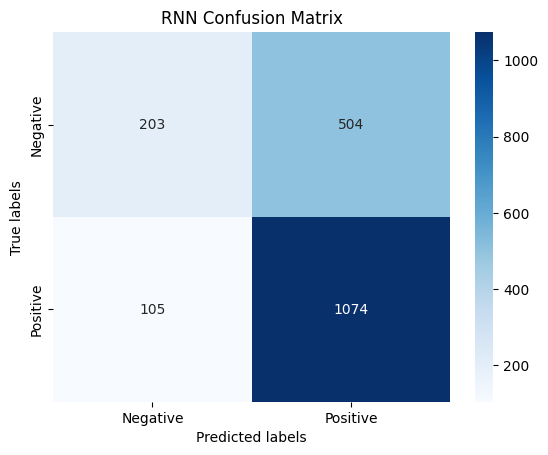

In [136]:
cm = confusion_matrix(test_new.label, test_new['prediction_bert_optimal'])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

# # labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('RNN Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

#### Analysis

This is by far our best performer. We also define it as the Optimal Technique once we run it on the whole training set. It is also important to note that this strategy was built upon logical thinking and is good to see that it also performs well.

# Full Dataset Training
In this section we will be training the BERT baseline model with increasing subsets of data and comparing performances to see if they get better with bigger exposure to training data. The setps are identical for each iteration we perform of the training; we define the subsets and the train models.

In [ ]:
#define our BERT model to train on variying percentages of data
bert_model_baseline = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs = output)

bert_model_baseline.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_token (InputLayer)    [(None, 128)]                0         []                            
                                                                                                  
 masked_token (InputLayer)   [(None, 128)]                0         []                            
                                                                                                  
 tf_distil_bert_model (TFDi  TFBaseModelOutput(last_hid   6636288   ['input_token[0][0]',         
 stilBertModel)              den_state=(None, 128, 768)   0          'masked_token[0][0]']        
                             , hidden_states=None, atte                                           
                             ntions=None)                                                   

In [ ]:
#function to calculate percentiages of the data
def data_subsetter(df,percentage,seed=42):
  # Set the seed for reproducibility
    random.seed(seed)
    n1 = df.shape[0]
    n_samples = int(n1 * percentage)

    locs = random.sample(range(n1), n_samples)
    subset_df = df.iloc[locs]

    return subset_df

train_001 = data_subsetter(train_new,0.01)
train_01 = data_subsetter(train_new,0.1)
train_025 = data_subsetter(train_new,0.25)
train_05 = data_subsetter(train_new,0.5)

Tokenized Inputs:
Input IDs: [[  101  2038  2045 ...     0     0     0]
 [  101  2106 19958 ...     0     0     0]
 [  101  2003  2045 ...     0     0     0]
 ...
 [  101  2106  2151 ...     0     0     0]
 [  101  2003  2045 ...     0     0     0]
 [  101  2003 11498 ...     0     0     0]]
Attention Masks: [[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]
Epoch 1/8
1/1 [==============================] - ETA: 0s - loss: 0.8274 - accuracy: 0.7188 - precision: 0.7188 - recall: 0.7188Tokenized Inputs:
Input IDs: [[  101  2515 22886 ...  2000  3443   102]
 [  101  2003  2160 ...  5790  1012   102]
 [  101  2003  3255 ...     0     0     0]
 ...
 [  101  2024  2045 ... 10416  1997   102]
 [  101  2515  1996 ...  1996  2915   102]
 [  101  2097  2045 ...     0     0     0]]
Attention Masks: [[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 0 0 0]]
1/1 [========

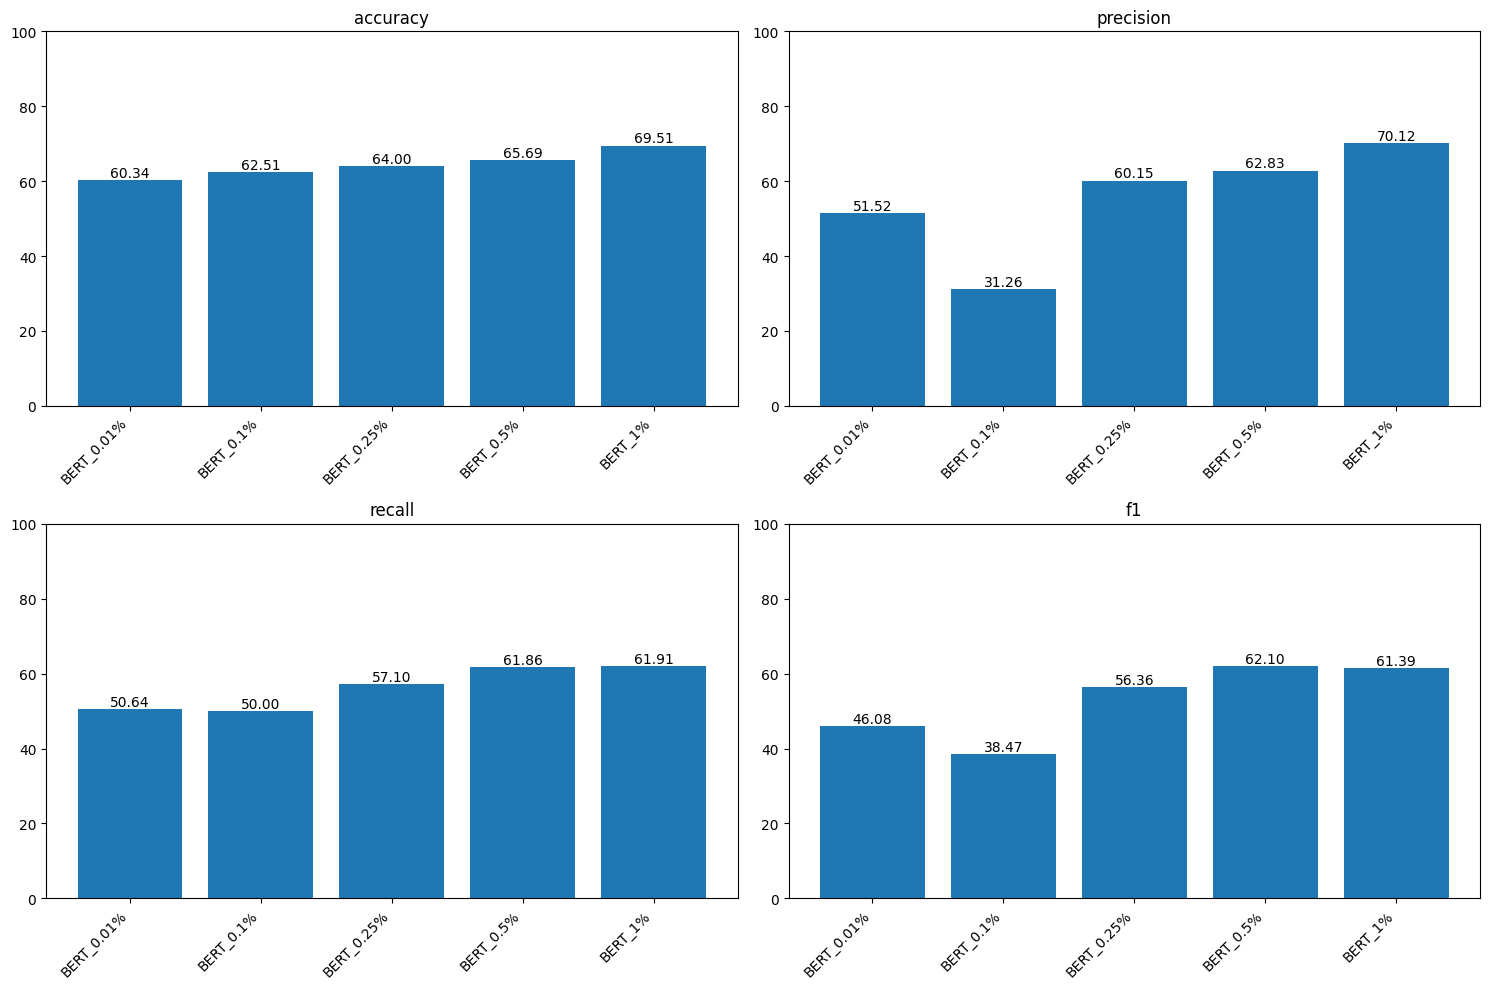

Model False Positives False Negatives  False Positives %  \
0  BERT_0.01%             623             125          33.032874   
1   BERT_0.1%             707               0          37.486744   
2  BERT_0.25%             498             181          26.405090   
3   BERT_0.5%             378             269          20.042418   
4     BERT_1%             484              91          25.662778   

   False Negatives %   Accuracy  
0           6.627784  60.339343  
1           0.000000  62.513256  
2           9.597031  63.997879  
3          14.262990  65.694592  
4           4.825027  69.512195

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
subsets = {
    '0.01': train_001,
    '0.1': train_01,
    '0.25': train_025,
    '0.5': train_05,
    '1': train_new
}
metrics_precentages = Metrics()

for size, subset in subsets.items():
    y_train = enc.fit_transform(np.array(subset.label).reshape(-1, 1)).toarray()
    y_valid = enc.transform(np.array(val.label).reshape(-1, 1)).toarray()
    #convert data into numpy array
    X_train = np.array(subset.all_text)
    X_valid = np.array(val.all_text)
    X_test = np.array(test_new['all_text'])
    # Create generators for training and validation data
    train_generator = get_batches(X_train, y_train, tokenizer, batch_size, max_length)
    valid_generator = get_batches(X_valid, y_valid, tokenizer, batch_size, max_length)

    batches = get_batches(X_train, y_train, tokenizer, batch_size, max_length)

    # Get the number of steps per epoch for training data
    train_steps_per_epoch = len(X_train) // batch_size

    # Get the number of steps per epoch for validation data
    valid_steps_per_epoch = len(X_valid) // batch_size

    # Compile the model
    bert_model_baseline.compile(
        optimizer=Adam(.0001),
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
        metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    )

    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        verbose=1,
        mode='min',
        restore_best_weights=True
    )

    history = bert_model_baseline.fit(
        train_generator,
        steps_per_epoch=train_steps_per_epoch,
        epochs=num_epochs,
        validation_data=valid_generator,
        validation_steps=valid_steps_per_epoch,
        callbacks=[early_stopping]
    )

    # Get the inputs tokenized from the validation set
    inputs = tokenizer.batch_encode_plus(list(test_new.all_text),
                                        add_special_tokens=True, max_length=max_length,
                                        padding='max_length',  return_attention_mask=True,
                                        return_token_type_ids=True, truncation=True)

    # Extract input_ids and attention mask
    inputs_test = [np.asarray(inputs['input_ids'], dtype='int32'),
                    np.asarray(inputs['attention_mask'], dtype='int32')]
    test_preds = bert_model_baseline.predict(inputs_test)
    test_preds = np.argmax(test_preds, axis=1)
    test_new[f'prediction_BERT_{size}%'] = test_preds
    # get the final metrics

    metrics_precentages.run(test_new.label, test_preds, f"BERT_{size}%")
    # Call append_model_results for each model after getting predictions and calculating metrics
    append_model_results(f'BERT_{size}%', test_new)

metrics_precentages.plot()
display(results_df)

## Learning Curve

In [ ]:
accuracies = []
percentage_keys = list(subsets.keys())  # This ensures the order matches the loop below

# Iterate over the stored prediction columns
for size in percentage_keys:
    col_name = f'prediction_BERT_{size}%'
    if col_name in test_new.columns:
        # Compute the accuracy for the current set of predictions
        accuracy = accuracy_score(test_new['label'], test_new[col_name])
        accuracies.append(accuracy)

# Make sure the length of 'accuracies' matches the length of 'percentage_keys'
assert len(accuracies) == len(percentage_keys), "Mismatch in lengths of accuracies and percentage keys"

# Convert percentages to float for the DataFrame
percentages = [float(p) for p in percentage_keys]

# Create the DataFrame
acc_by_pctg = pd.DataFrame({
    'Percentage': percentages,
    'Accuracy': accuracies
})


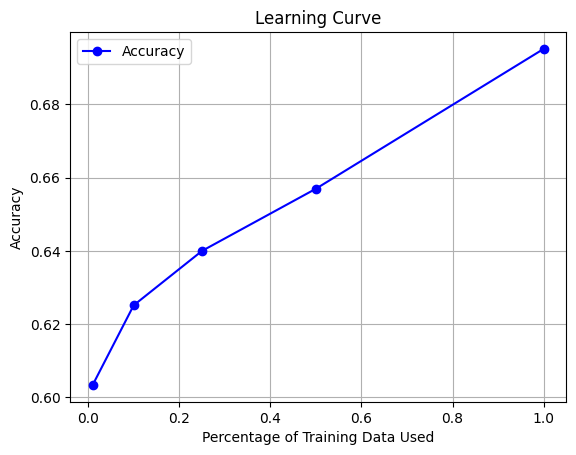

In [ ]:
acc_by_pctg.plot(x='Percentage', y='Accuracy', marker='o', linestyle='-', color='b')
plt.title('Learning Curve')
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

This makes perferct sense; as we increase the proportion of data we train our model with, the accuracy improves as well.

# Technique Comparison
In this section, we run each of the model techniques from part two on the full training dataset. Just to note, due to computational resources, when deploying the data augmentation methods, we used a subsample of the training and validation data to generate the new data. With the metrics and false positives and false negatives calculated, I will briefly describe and compare each technique, then explain how they each stack against our state-of-the-art model, DeBERTa.

## State-of-the-art Model: DeBERTa
We chose DeBERTa for our state-of-the-art model as it ranks number 7 on the super_glue leaderboard for the boolq dataset. Below we run load and train the DeBERTa model to have a benchmark to compare our techniques to.

In the process of deploying DeBERTa on our dataset, we initially attempted to use TensorFlow for model training. However, we ran into some challenges that stopped progress such as TensorFlow expecting certain attributes not present in the PyTorch model (TFDebertaForSequenceClassification not having a .to method), to operational errors including InvalidArgumentError related to batch tensor shapes during dataset processing, and AttributeError linked to the absence of a .save method for PyTorch models.

Given these issues and considering project timelines, we opted to utilize PyTorch as an alternative framework. PyTorch's support for DeBERTa facilitated a smoother implementation process. The decison to switch to PyTorch not only enabled the successful application of DeBERTa to our dataset but also highlights the importance of flexibility in tool selection.

In [ ]:
# model_name = "microsoft/deberta-base"
# tokenizer = DebertaTokenizer.from_pretrained(model_name)

# def tokenize_function(examples):
#     return tokenizer(examples["all_text"], padding="max_length", truncation=True)

# # Convert pandas dataframes to Hugging Face dataset objects
# train_dataset = Dataset.from_pandas(train_new)
# val_dataset = Dataset.from_pandas(val)
# test_dataset = Dataset.from_pandas(test_new)

# # Tokenize all datasets
# train_dataset = train_dataset.map(tokenize_function, batched=True)
# val_dataset = val_dataset.map(tokenize_function, batched=True)
# test_dataset = test_dataset.map(tokenize_function, batched=True)

# model = TFDebertaForSequenceClassification.from_pretrained(model_name, num_labels=2)

Map:   0%|          | 0/7541 [00:00<?, ? examples/s]

Map:   0%|          | 0/3270 [00:00<?, ? examples/s]

Map:   0%|          | 0/1886 [00:00<?, ? examples/s]

All model checkpoint layers were used when initializing TFDebertaForSequenceClassification.

Some layers of TFDebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['cls_dropout', 'pooler', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# from transformers import DebertaForSequenceClassification, DebertaTokenizer

# # Load the tokenizer and model
# tokenizer = DebertaTokenizer.from_pretrained('microsoft/deberta-base')
# model = DebertaForSequenceClassification.from_pretrained('microsoft/deberta-base', num_labels=2)


# # Define training arguments
# training_args = TrainingArguments(
#     output_dir="./results",
#     num_train_epochs=8,
#     per_device_train_batch_size=8,
#     per_device_eval_batch_size=8,
#     warmup_steps=500,
#     weight_decay=0.01,
#     logging_dir="./logs",
# )

# # Define the Trainer
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_dataset,
#     eval_dataset=val_dataset,
# )

# # Train the model
# trainer.train()

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Checkpoint destination directory ./results/checkpoint-500 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./results/checkpoint-1000 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./results/checkpoint-1500 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./results/checkpoint-2000 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./results/checkpoint-2500 already exists and is non-empty. Saving will proceed but saved results may be invalid.


TrainOutput(global_step=7544, training_loss=0.2566372291249157, metrics={'train_runtime': 3007.1921, 'train_samples_per_second': 20.061, 'train_steps_per_second': 2.509, 'total_flos': 1.8496419966468096e+16, 'train_loss': 0.2566372291249157, 'epoch': 8.0})

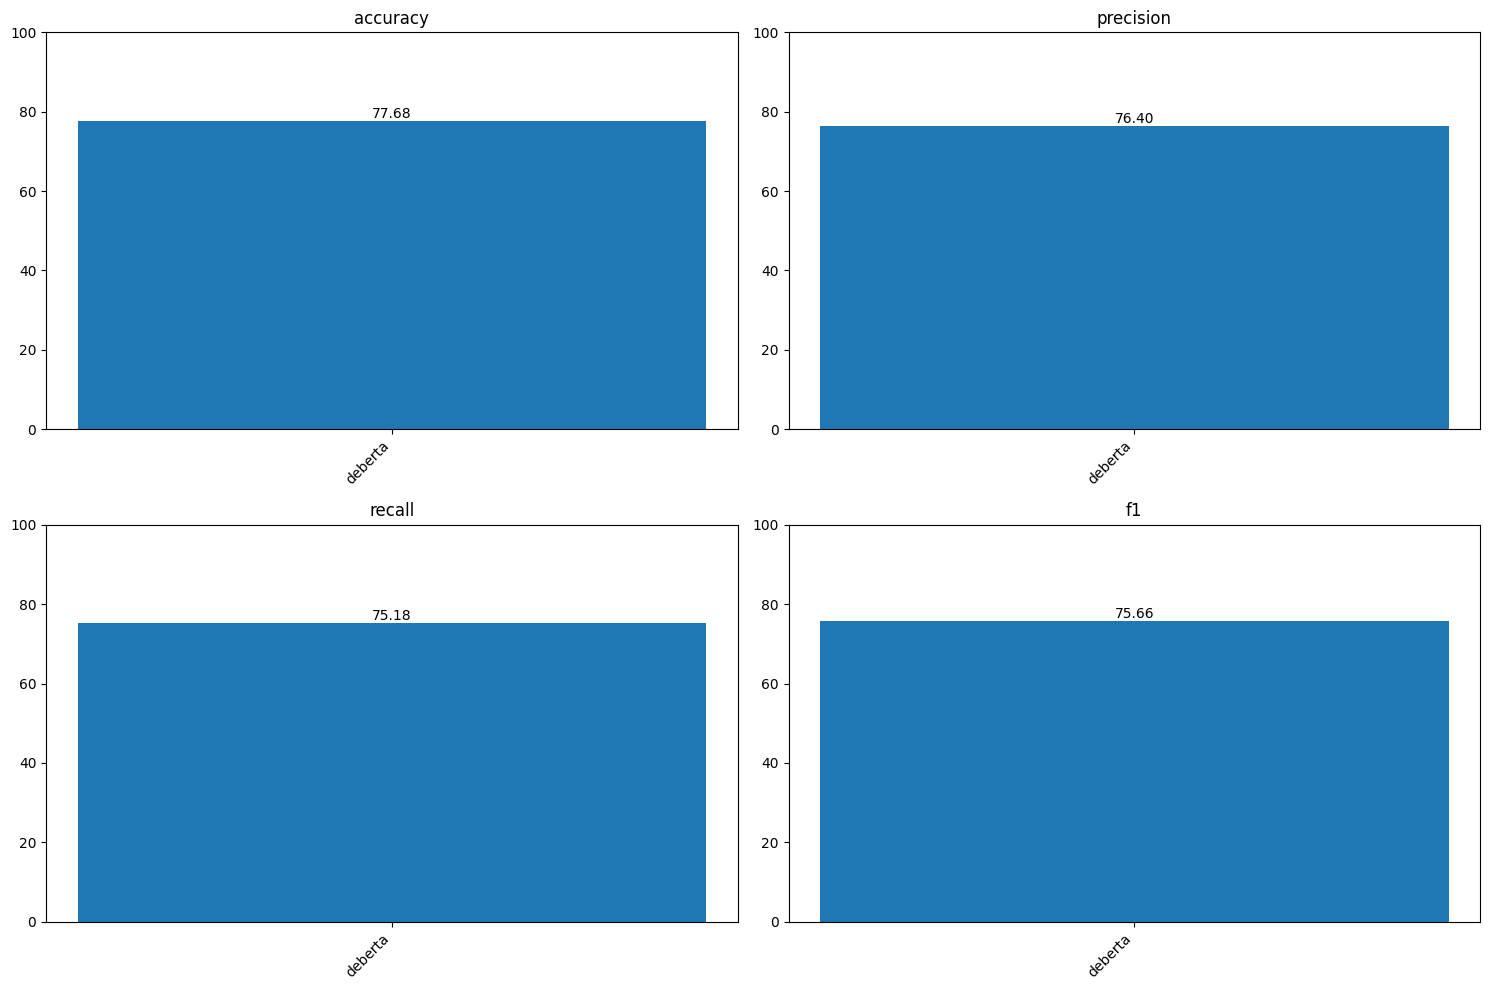

In [ ]:
# # Save the model's state dictionary
# torch.save(model.state_dict(), f'/content/drive/MyDrive/deberta_soa.pth')

# # Load the model into the pipeline
# pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)
# # Making predictions
# predictions = pipe(test_new["all_text"].tolist())
# # Process predictions
# for prediction in predictions:
#     print(prediction)

# # Convert predictions to 0 or 1
# binary_predictions = [1 if pred['label'] == 'LABEL_1' else 0 for pred in predictions]
# # Display the converted predictions
# print(binary_predictions)
# test_new['prediction_deberta'] = binary_predictions
# # Create a DataFrame for predictions
# predictions_df = pd.DataFrame(binary_predictions)
# # If you want to add the original text for reference
# predictions_df['all_text'] = test_new['all_text'].tolist()
# # Save the DataFrame to a CSV file
# predictions_df.to_csv('predictions.csv', index=False)

# Load the predictions CSV
predictions_df = pd.read_csv(path + 'deberta_predictions.csv')

test_new_with_predictions = pd.merge(test_new, predictions_df[['all_text', '0']], on='all_text', how='left')

metrics_techniques = Metrics()
metrics_techniques.run(test_new.label, test_new_with_predictions['0'], 'deberta')
metrics_techniques.plot()

## Data Augmentation Using a Combinatorial Approach
Here we ultimately decided to stick with the data generated from the 32 labels and combine it with out entire training dataset to increase the size of the data. We chose this apprach as it would be infeasible to generate data from the entire dataset as this would generation a number in the millions.

With this next approach, we combined answerable questions with non-answerable ones to create new training examples with the hope of potentially helping the model better understand when information is present or absent. When incorporating this technique in our training schema, we received an accuracy score __. This is a massive improvement from our earlier accuracy score of 39%. We only used 32 labels to generate 1024 new data, when we used 50 labels instead, we were able to generate 5000 new data points.

In [ ]:
combine_train_data = pd.concat([expanded_df_train, train_new], ignore_index=True)
combine_val_data = pd.concat([expanded_df_val, val], ignore_index=True)

In [ ]:
# #Call the function with appropriate arguments
# trained_model, history = train_bert_model(
#    model_name="bert_aug1_full",
#    model=bert_model,
#    tokenizer=tokenizer,
#    train_data=combine_train_data,
#    val_data=combine_val_data,
#    num_labels=num_labels,
#    max_length=max_length,
#    batch_size=batch_size,
#    learning_rate=learning_rate,
#    num_epochs=num_epochs
# )

# Load the weights
weights_path = path + 'bert_aug1_full.h5'
#weights_path = '/content/drive/MyDrive/bert_aug1_full.h5'
bert_model.load_weights(weights_path)

We initialize a new Metrics class for the final metrics comparison

59/59 [==============================] - 3s 51ms/step


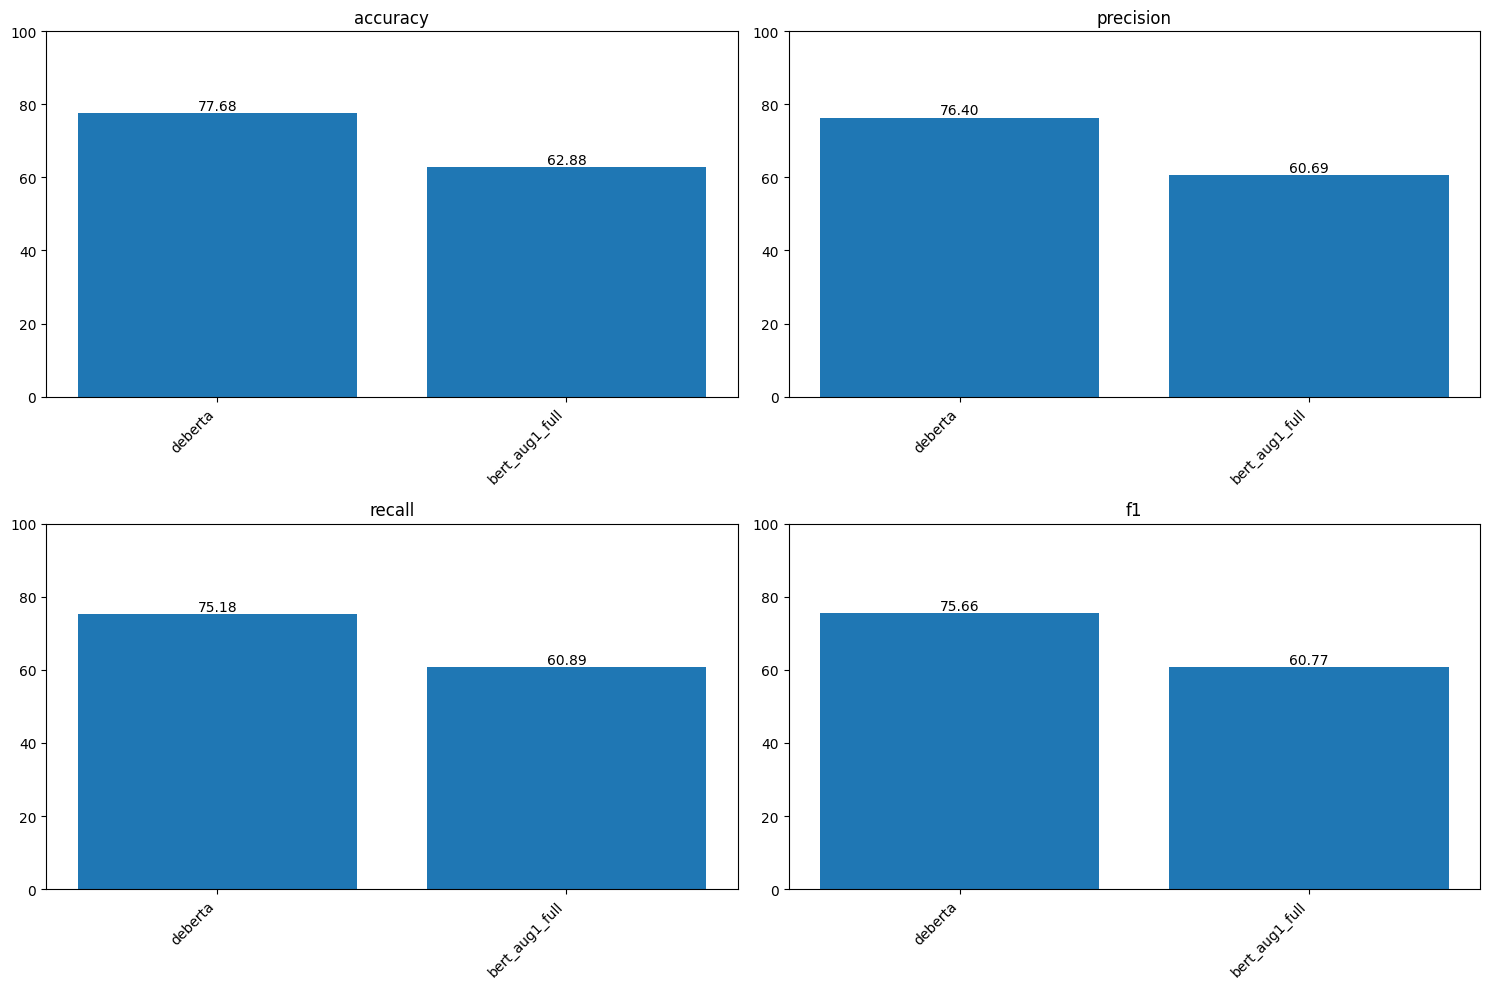

In [ ]:
test_new_with_predictions = predict_with_bert_model(
    model=bert_model,
    tokenizer=tokenizer,
    test_data=test_new,
    model_name="bert_aug1_full",
)

# get the final metrics
metrics_techniques.run(test_new.label, test_new['prediction_bert_aug1_full'], "bert_aug1_full")
metrics_techniques.plot()

In [ ]:
# look at false postives and negatives
append_model_results('bert_aug1_full', test_new)

# Display the results DataFrame
display(results_df)

Model False Positives False Negatives  False Positives %  \
0                 tfidf             578              60          30.646872   
1         bert_baseline             707               0          37.486744   
2        bert_aug_combo             292             669          15.482503   
3   bert_aug_paraphrase             468             363          24.814422   
4             zero_shot             623              77          33.032874   
5  bert_model_gpt3_data             230             720          12.195122   
6  bert_model_gpt4_data             534             118          28.313892   
7        bert_aug1_full             333             367          17.656416   

   False Negatives %   Accuracy  
0           3.181336  66.171792  
1           0.000000  62.513256  
2          35.471898  49.045599  
3          19.247084  55.938494  
4           4.082715  62.884411  
5          38.176034  49.628844  
6           6.256628  65.429480  
7          19.459173  62.884411

##Data Augmentation Using Paraphrasing

This method involves generating new training examples by paraphrasing existing ones as we did earlier, this time using a subsample of 200 data, with the newly genertaed data, we combine it with our original training dataset The goal is to increase the diversity of the training data without collecting new data manually. This can help improve the model's generalization by exposing it to a wider variety of language expressions.

In [ ]:
# combined_train_data = pd.concat([train_aug_data, train_new], ignore_index=True)
# combined_val_data = pd.concat([val_aug_data, val], ignore_index=True)


In [ ]:
# DONT RUN, I have the genrated data in a csv
# train_aug_data_full = process_dataset_with_combinations(train_new, subset_size=200)
# #save new data to a CSV file
# train_aug_data_full.to_csv('train_aug_data_full.csv', index=False)

# # Assuming `val_new` is your validation DataFrame
# val_aug_data_full = process_dataset_with_combinations(val, subset_size=)

# # Optionally, save to CSV
# val_aug_data_full.to_csv('val_aug_data_full.csv', index=False)


In [ ]:
# train_aug_data_full.to_csv('train_aug_data_full.csv', index=False)
# print(train_aug_data_full.shape)

In [ ]:
#loadig the val data generated with 32 labels
train_aug_data_full = pd.read_csv(path + 'train_aug_data_full.csv')
val_aug_data_full = pd.read_csv(path + 'val_aug_data .csv')

max_passage_length = 32  # Define the maximum length for passages

# Truncate passages to the maximum length
train_aug_data_full['question'] = train_aug_data_full['question'].str.slice(0, max_passage_length)
val_aug_data_full['question'] = val_aug_data_full['question'].str.slice(0, max_passage_length)

train_aug_data_full['passage'] = train_aug_data_full['passage'].str.slice(0, max_passage_length)
val_aug_data_full['passage'] = val_aug_data_full['passage'].str.slice(0, max_passage_length)

# merge premise and hypothesis into one column
train_aug_data_full['all_text'] = train_aug_data_full['question'] + ' ' + train_aug_data_full['passage']
val_aug_data_full['all_text'] = val_aug_data_full['question'] + ' ' + val_aug_data_full['passage']

combined_train_data = pd.concat([train_aug_data_full, train_new], ignore_index=True)
combined_val_data = pd.concat([val_aug_data_full, val], ignore_index=True)

In [ ]:
import time

# Record the start time
start_time = time.time()

# Call the function with appropriate arguments
# trained_model, history = train_bert_model(
#    model_name="bert_aug_full",
#    model=bert_model,
#    tokenizer=tokenizer,
#    train_data=combined_train_data,
#    val_data=combined_val_data,
#    num_labels=num_labels,
#    max_length=max_length,
#    batch_size=batch_size,
#    learning_rate=learning_rate,
#    num_epochs=num_epochs)

# Record the end time
end_time = time.time()

# Calculate and print the total runtime
total_runtime = end_time - start_time
print(f"Training completed in {total_runtime:.2f} seconds.")


# # Load the weights
weights_path = path + 'bert_aug_full.h5'
# weights_path = '/content/drive/MyDrive/bert_aug_full.h5'
bert_model.load_weights(weights_path)

Training completed in 0.00 seconds.


59/59 [==============================] - 3s 50ms/step


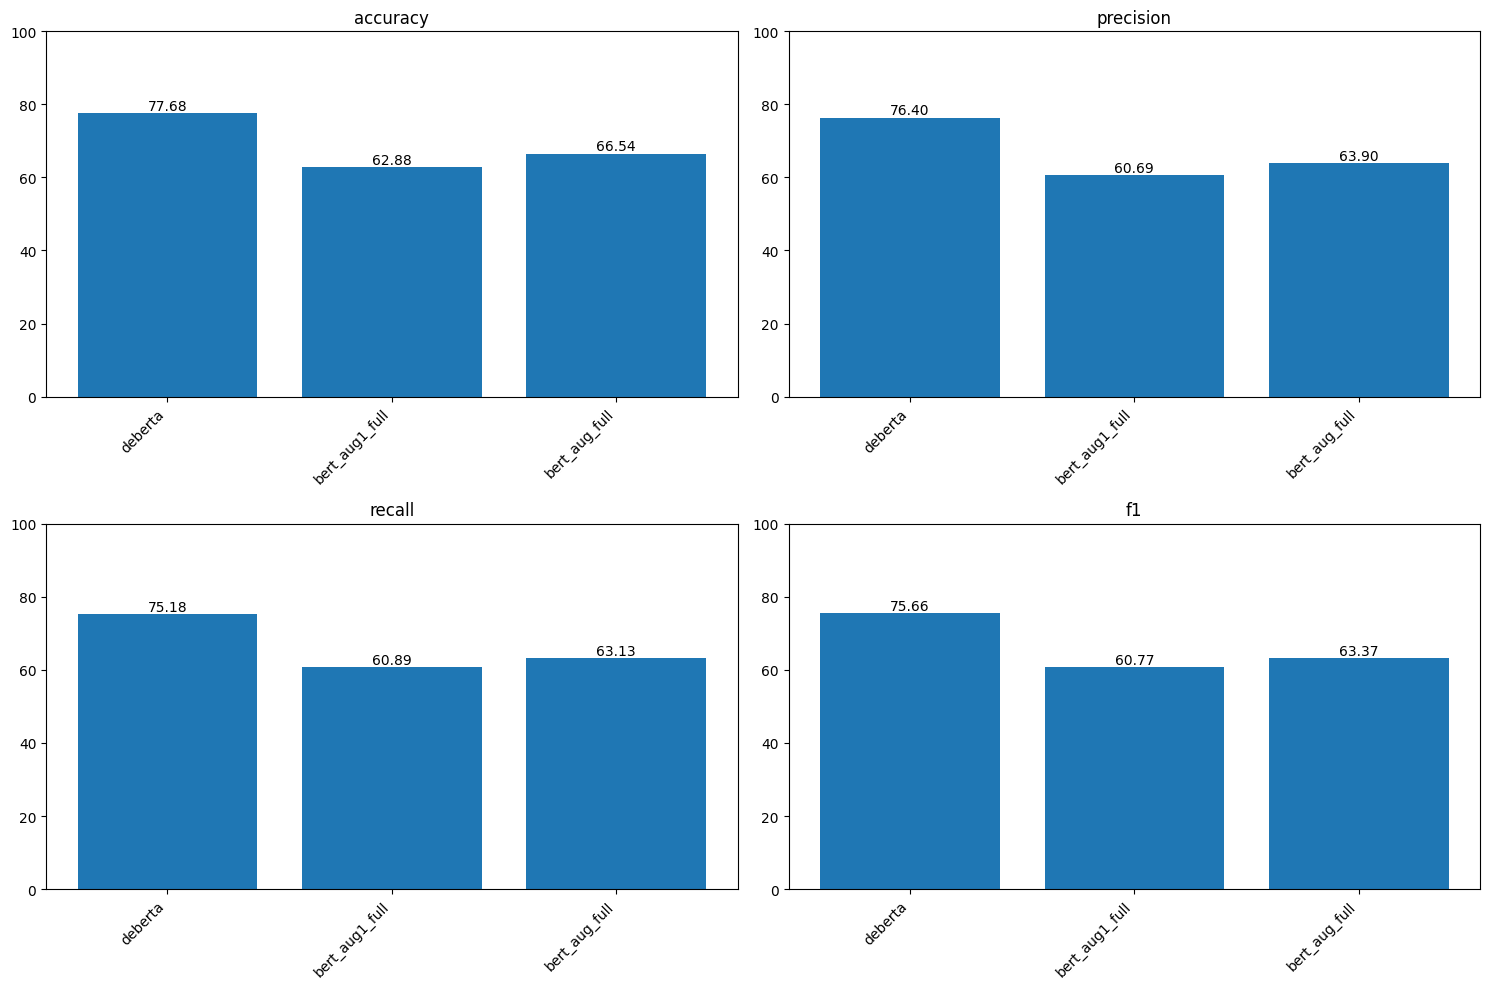

In [ ]:
test_new_with_predictions = predict_with_bert_model(
    model=bert_model,
    tokenizer=tokenizer,
    test_data=test_new,
    model_name="bert_aug_full",
)

# get the final metrics
metrics_techniques.run(test_new.label, test_new['prediction_bert_aug_full'], "bert_aug_full")
metrics_techniques.plot()

In [ ]:
#look at false postives and negatives
append_model_results('bert_aug_full', test_new)

#Display the results DataFrame
display(results_df)

Model False Positives False Negatives  False Positives %  \
0                 tfidf             578              60          30.646872   
1         bert_baseline             707               0          37.486744   
2        bert_aug_combo             292             669          15.482503   
3   bert_aug_paraphrase             468             363          24.814422   
4             zero_shot             623              77          33.032874   
5  bert_model_gpt3_data             230             720          12.195122   
6  bert_model_gpt4_data             534             118          28.313892   
7        bert_aug1_full             333             367          17.656416   
8         bert_aug_full             357             274          18.928950   

   False Negatives %   Accuracy  
0           3.181336  66.171792  
1           0.000000  62.513256  
2          35.471898  49.045599  
3          19.247084  55.938494  
4           4.082715  62.884411  
5          38.176034  49.628844  
6           6.256628  65.429480  
7          19.459173  62.884411  
8          14.528102  66.542948

Looking at our results for the paraphrasing augmentation, we received much higher score than what we received when we only had limited data. This is good news, as it confirms the model was able to learn a little better and is more robust when we include different variations of the original questions and passges. We jumped up almost by 11 points. Comparing this score to the score receievd when we trained the BERT baseline mode on the full dataset (63.4% without the new data), we can see a pretty big jump, almost 4 points, which really ensures to us that the newly generated paraphrased data helped the model learn quite well (compared to our other models).

## Zero-shot technique on full dataset
This technique tests the model's ability to generalize to new tasks or questions based on its understanding of the language and the task's context. It's particularly challenging as the model has to rely on its pre-existing knowledge base to infer answers.

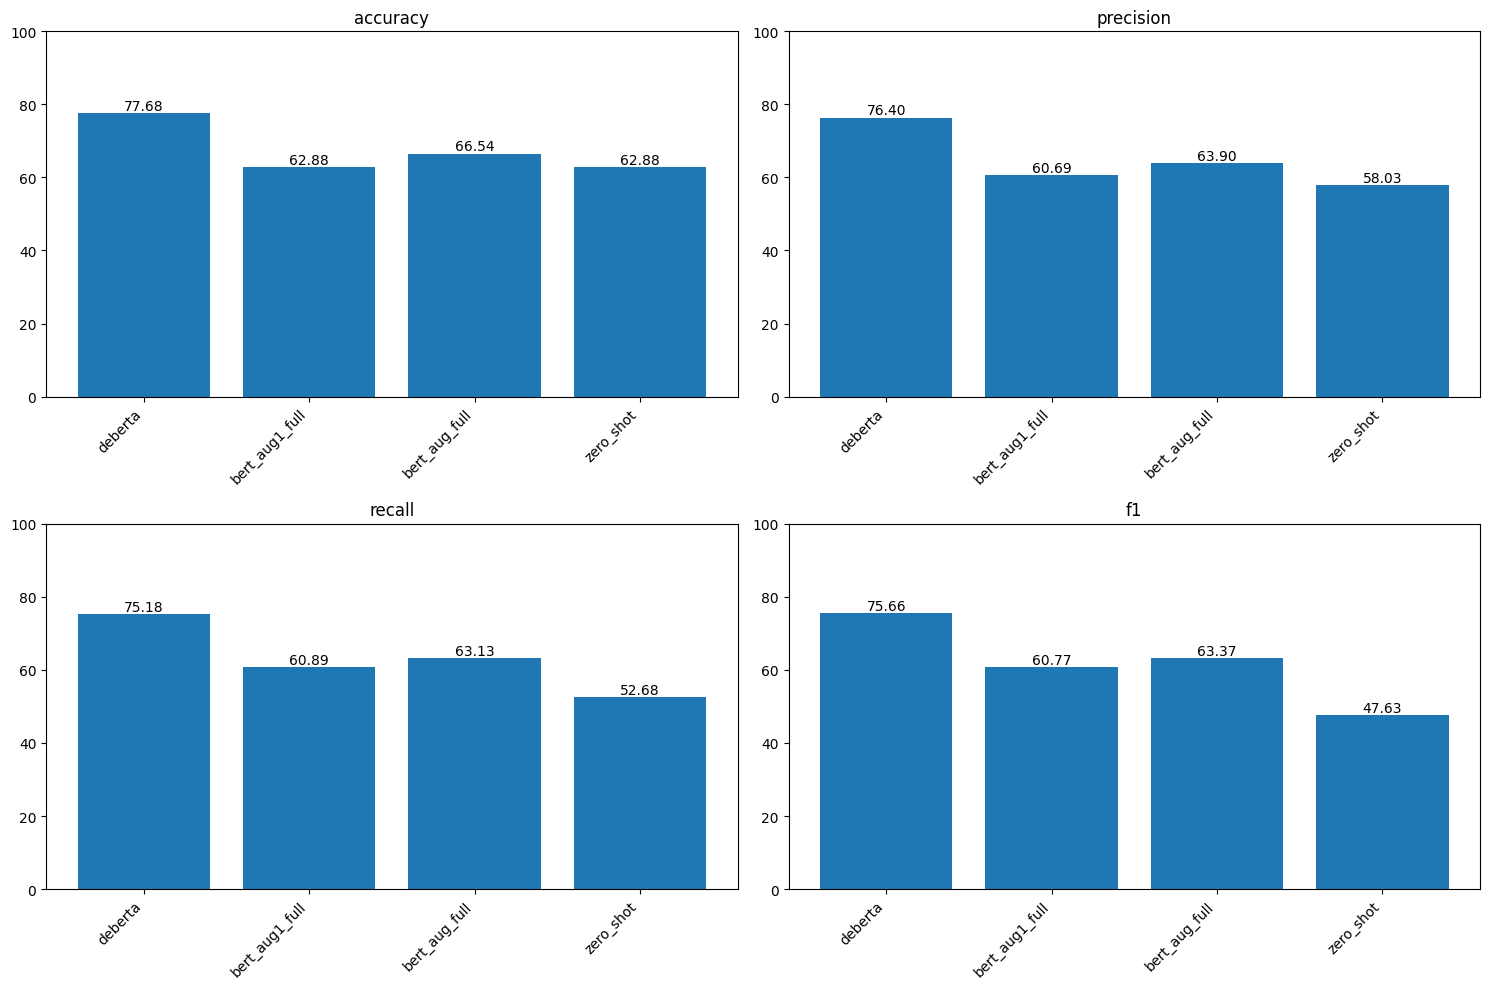

Model False Positives False Negatives  False Positives %  \
0                 tfidf             578              60          30.646872   
1         bert_baseline             707               0          37.486744   
2        bert_aug_combo             292             669          15.482503   
3   bert_aug_paraphrase             468             363          24.814422   
4             zero_shot             623              77          33.032874   
5  bert_model_gpt3_data             230             720          12.195122   
6  bert_model_gpt4_data             534             118          28.313892   
7        bert_aug1_full             333             367          17.656416   
8         bert_aug_full             357             274          18.928950   
9             zero_shot             623              77          33.032874   

   False Negatives %   Accuracy  
0           3.181336  66.171792  
1           0.000000  62.513256  
2          35.471898  49.045599  
3          19.247084  55.938494  
4           4.082715  62.884411  
5          38.176034  49.628844  
6           6.256628  65.429480  
7          19.459173  62.884411  
8          14.528102  66.542948  
9           4.082715  62.884411

In [ ]:
preds_zero_shot, probs = predict_with_zero_shot(test_new)

test_new['prediction_zero_shot'] = preds_zero_shot

# get the final metrics
metrics_techniques.run(test_new.label, test_new['prediction_zero_shot'], "zero_shot")
metrics_techniques.plot()

# look at false postives and negatives
append_model_results('zero_shot', test_new)

# Display the results DataFrame
display(results_df)

Although zero-shot was one of the best performing methods with the limited trainig data, now its advantage is lost. This makes sense because since we increase the size of training, the zero training instances become less relevant.

## Data generation with LLM (full dataset)


In [ ]:
llm_aug_data = pd.read_csv(path + 'llm_aug_data.csv')

llm_aug_data['all_text'] = llm_aug_data['question'] + ' ' + llm_aug_data['passage']

combine_llm_data = pd.concat([llm_aug_data, train_new], ignore_index=True)

# enc = OneHotEncoder(handle_unknown='ignore')
# y_train = enc.fit_transform(np.array(llm_aug_data.label).reshape(-1, 1)).toarray()

# # Call the function with appropriate arguments
# trained_model, history = train_bert_model(
#     model_name="bert_model_llm_augmented_data",
#     model=bert_model,
#     tokenizer=tokenizer,
#     train_data=combine_llm_data,
#     val_data=val,
#     num_labels=num_labels,
#     max_length=max_length,
#     batch_size=batch_size,
#     learning_rate=learning_rate,
#     num_epochs=num_epochs
# )

59/59 [==============================] - 3s 52ms/step


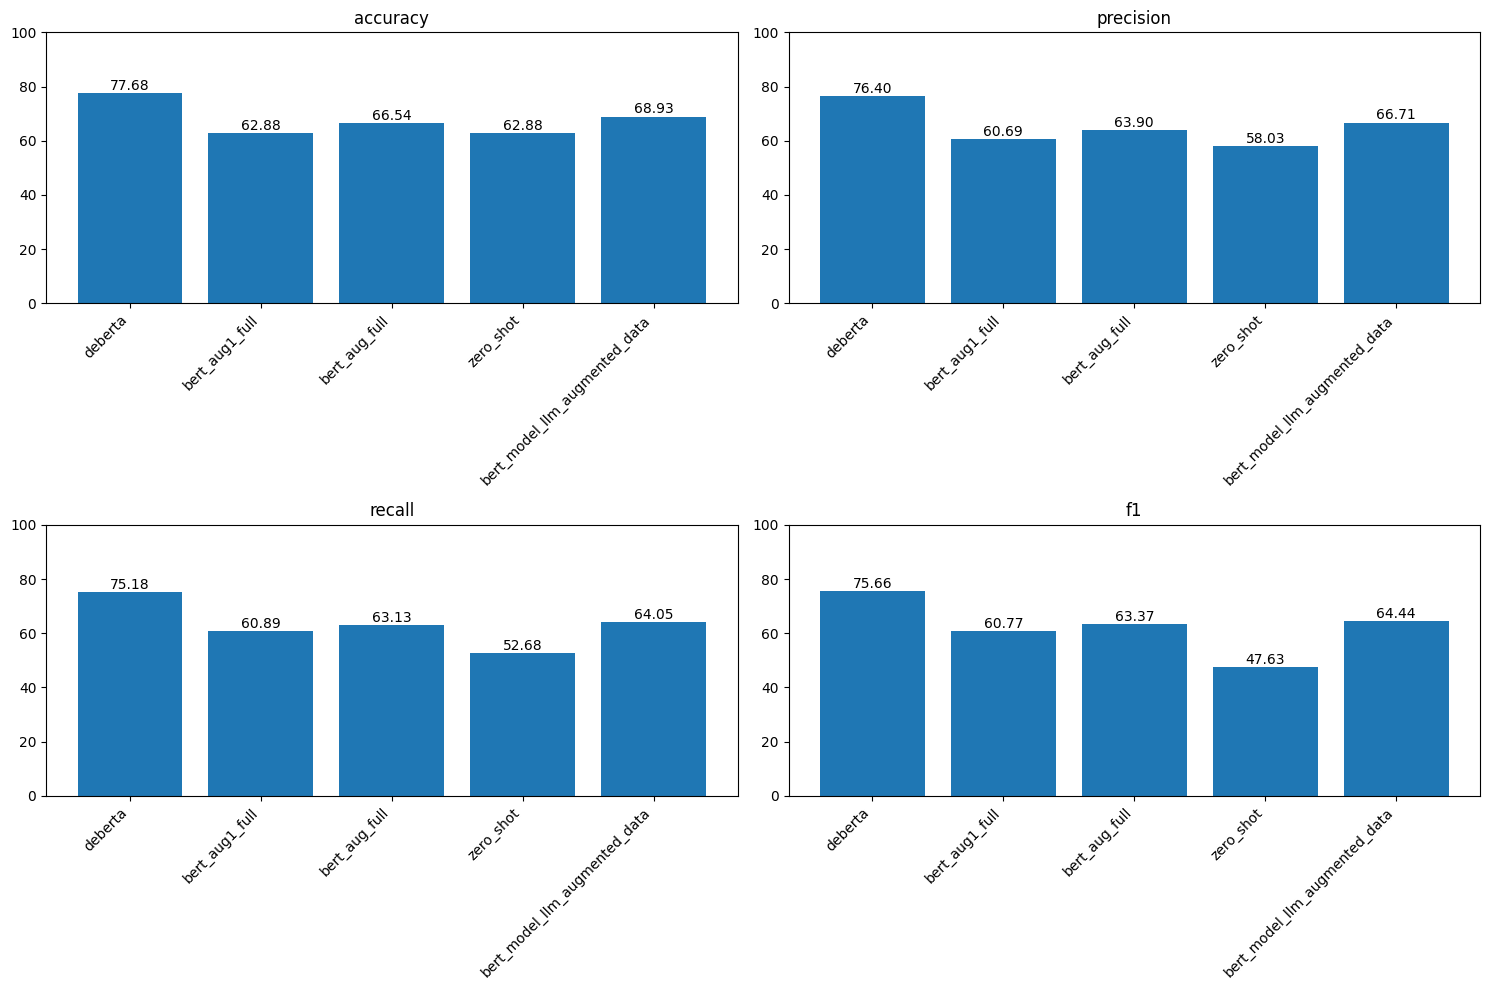

In [ ]:
# Load the weights
weights_path = path + 'bert_model_llm_augmented_data.h5'
#weights_path = '/content/drive/MyDrive/bert_model_llm_augmented_data.h5'
bert_model.load_weights(weights_path)

test_new_with_predictions = predict_with_bert_model(
    model=bert_model,
    tokenizer=tokenizer,
    test_data=test_new,
    model_name="bert_model_llm_augmented_data",
)

# get the final metrics
metrics_techniques.run(test_new.label, test_new['prediction_bert_model_llm_augmented_data'], "bert_model_llm_augmented_data")
metrics_techniques.plot()

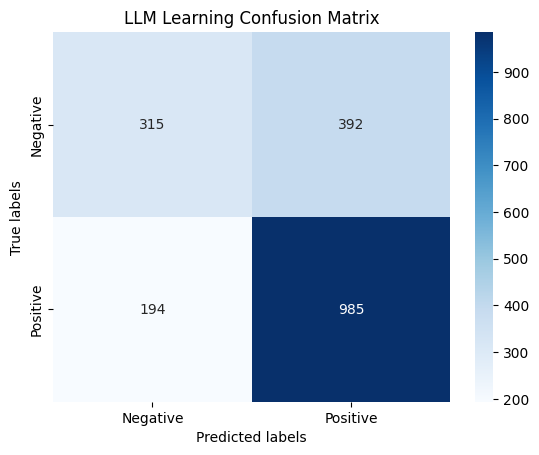

In [ ]:
cm = confusion_matrix(test_new['label'], test_new['prediction_bert_model_llm_augmented_data'])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('LLM Learning Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

In [ ]:
# look at false postives and negatives
append_model_results('bert_model_llm_augmented_data', test_new)

# Display the results DataFrame
display(results_df)

Model False Positives False Negatives  \
0                           tfidf             578              60   
1                   bert_baseline             707               0   
2                  bert_aug_combo             292             669   
3             bert_aug_paraphrase             468             363   
4                       zero_shot             623              77   
5            bert_model_gpt3_data             230             720   
6            bert_model_gpt4_data             534             118   
7                  bert_aug1_full             333             367   
8                   bert_aug_full             357             274   
9                       zero_shot             623              77   
10  bert_model_llm_augmented_data             392             194   

    False Positives %  False Negatives %   Accuracy  
0           30.646872           3.181336  66.171792  
1           37.486744           0.000000  62.513256  
2           15.482503          35.471898  49.045599  
3           24.814422          19.247084  55.938494  
4           33.032874           4.082715  62.884411  
5           12.195122          38.176034  49.628844  
6           28.313892           6.256628  65.429480  
7           17.656416          19.459173  62.884411  
8           18.928950          14.528102  66.542948  
9           33.032874           4.082715  62.884411  
10          20.784730          10.286320  68.928950

 Training the model with only 32 labels gave us an accuracy score of 49.5%, when we trained the model with the entire training dataset, we received a score of 62.9%, this is a pretty big jump of almost 13 points, the learning curve here is definitely the highest suggesting that the model did much better utilizing LLM data generation when it has sufficient amount of data already.

In [ ]:
results_df.to_csv('results_df', index=False)

## RNN Model with Optimal Technique

> Add blockquote



In [137]:


#compile the model
bert_model_rnn.compile(optimizer=Adam(.0001),
                       metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision()],
                       loss=tf.keras.losses.CategoricalCrossentropy())

masked_unmasked_data_train = pd.concat([train_new_masked, train_new], ignore_index=True)
masked_unmasked_data_val = pd.concat([val_new_masked, val], ignore_index=True)

train_labels = to_categorical(masked_unmasked_data_train['label'], num_classes=num_labels).copy()
valid_labels = to_categorical(masked_unmasked_data_val['label'], num_classes=num_labels).copy()

# #convert data into numpy array
X_train = np.array(masked_unmasked_data_train['all_text'])
y_train = np.array(train_labels)
X_valid = np.array(masked_unmasked_data_val['all_text'])
y_valid = np.array(valid_labels)

# Create generators for training and validation data
train_generator = get_batches(X_train, y_train, tokenizer, batch_size, max_length)
valid_generator = get_batches(X_valid, y_valid, tokenizer, batch_size, max_length)

# Get the number of steps per epoch for training data
train_steps_per_epoch = len(X_train) // batch_size

# Get the number of steps per epoch for validation data
valid_steps_per_epoch = len(X_valid) // batch_size

In [ ]:
# #setup early stopping to stop training when validation loss stops improving (from practice notebook)
# early_stopping = EarlyStopping(
#     monitor='val_loss',
#     patience=5,
#     verbose=1,
#     mode='min',
#     restore_best_weights=True
# )

# history = bert_model_rnn.fit(
#     train_generator,
#     steps_per_epoch=train_steps_per_epoch,
#     epochs=num_epochs,
#     validation_data=valid_generator,
#     validation_steps=valid_steps_per_epoch,
#     callbacks=[early_stopping]
# )

59/59 [==============================] - 6s 62ms/step


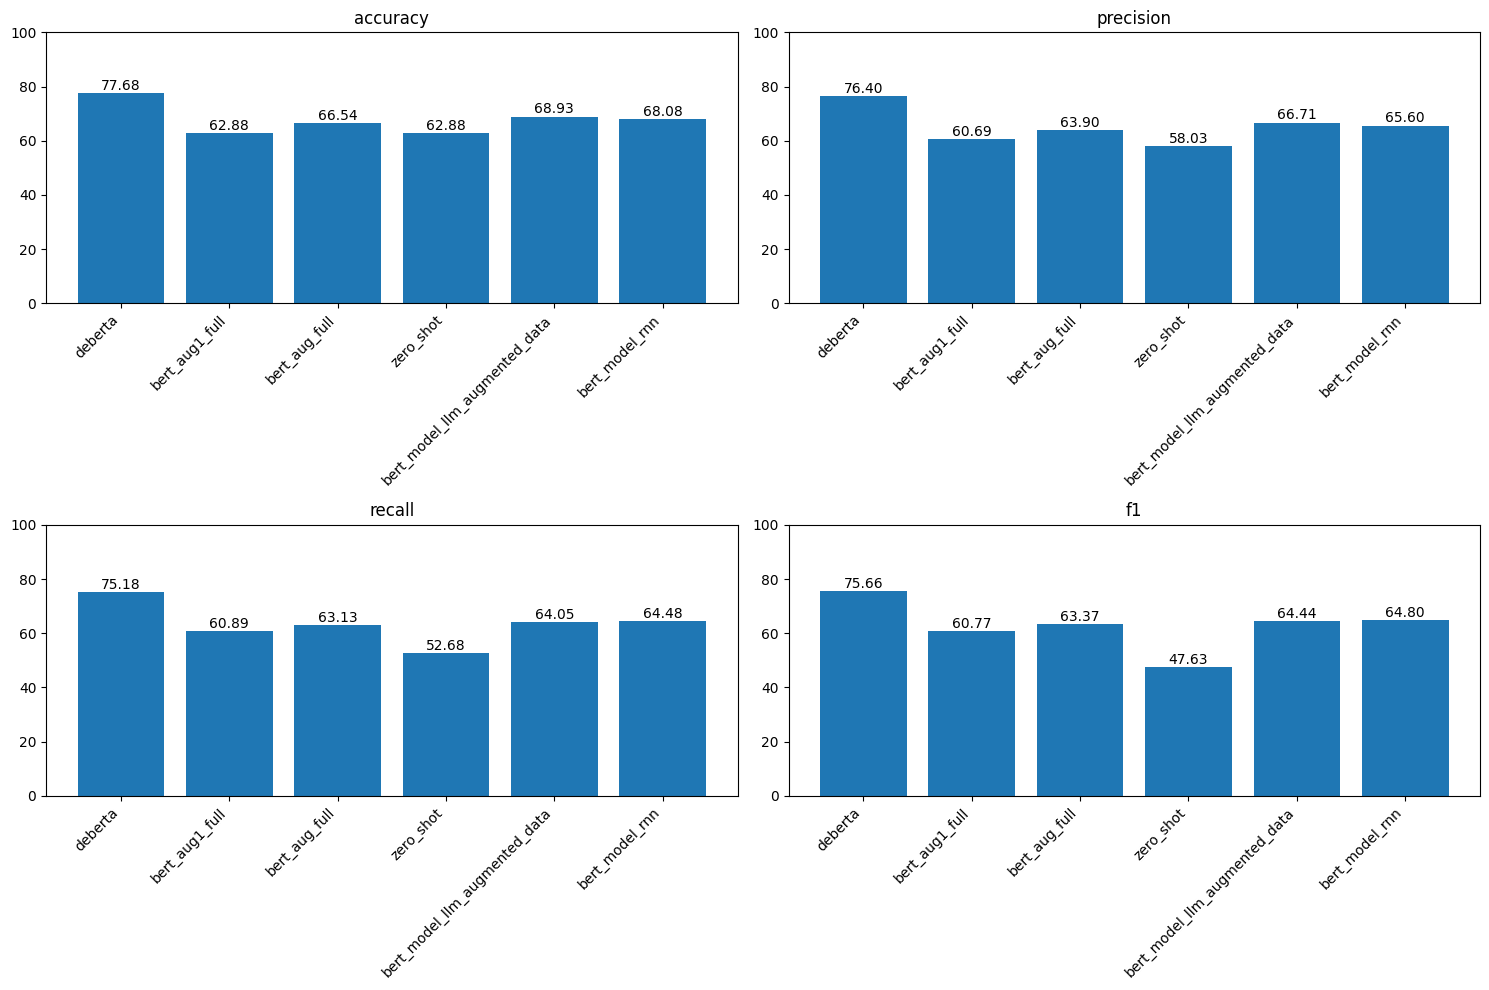

Model False Positives False Negatives  \
0                           tfidf             578              60   
1                   bert_baseline             707               0   
2                  bert_aug_combo             292             669   
3             bert_aug_paraphrase             468             363   
4                       zero_shot             623              77   
5            bert_model_gpt3_data             230             720   
6            bert_model_gpt4_data             534             118   
7                  bert_aug1_full             333             367   
8                   bert_aug_full             357             274   
9                       zero_shot             623              77   
10  bert_model_llm_augmented_data             392             194   
11                   bert_optimal             504             105   
12                 bert_model_rnn             353             249   

    False Positives %  False Negatives %   Accuracy  
0           30.646872           3.181336  66.171792  
1           37.486744           0.000000  62.513256  
2           15.482503          35.471898  49.045599  
3           24.814422          19.247084  55.938494  
4           33.032874           4.082715  62.884411  
5           12.195122          38.176034  49.628844  
6           28.313892           6.256628  65.429480  
7           17.656416          19.459173  62.884411  
8           18.928950          14.528102  66.542948  
9           33.032874           4.082715  62.884411  
10          20.784730          10.286320  68.928950  
11          26.723224           5.567338  67.709438  
12          18.716861          13.202545  68.080594

In [138]:
# Load the weights
weights_path = path + 'bert_rnn_full.h5'
#weights_path = '/content/drive/MyDrive/bert_rnn_full.h5'
bert_model_rnn.load_weights(weights_path)

test_new_with_predictions = predict_with_bert_model(
    model=bert_model_rnn,
    tokenizer=tokenizer,
    test_data=test_new,
    model_name="bert_model_rnn",
)

# get the final metrics
metrics_techniques.run(test_new.label, test_new['prediction_bert_model_rnn'], "bert_model_rnn")
metrics_techniques.plot()

# look at false postives and negatives
append_model_results('bert_model_rnn', test_new)

# Display the results DataFrame
display(results_df)

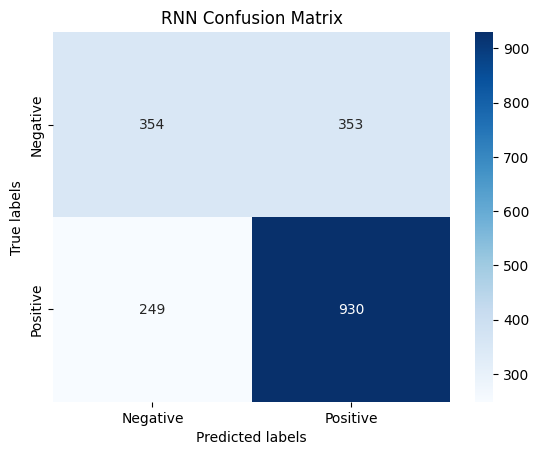

In [ ]:
cm = confusion_matrix(test_new['label'], test_new['prediction_bert_model_rnn'])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('RNN Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

We are still observing similar performances

Overall, when comparing performances, the model trained with the LLM augmented data performed the best and was closest to our SOA model. The LLM (Language Model) augmented data helped boost the BERT model's performance because augmentation can really enhance the training dataset, allowing the model to learn from a more varied and extensive set of examples.

## Methodology Analysis

When we analyze and the compare the various methods we used in this notebook, we will look to understand the context in which these techniques were employed, their objectives, effectiveness, and the limitations observed.

- DistilBERT
  - Method: As mentioned before, this is a  lightweight version of BERT, which is designed to reduce the model size while retaining most of the original model's performance. It uses transformer architecture to understand the context of words in text.

  - Effectiveness: Slightly better than the baseline with an accuracy of 66.5%. The improvement suggests that leveraging pre-trained contextual embeddings can enhance performance.

  - Limitations: The increase in accuracy is small, indicating that while DistilBERT captures context better than TF-IDF, it might still struggle with the specific nuances of the dataset.

- Data Augmentation Using Paraphrasing
  - Method: Generates new training examples by paraphrasing existing ones to increase data diversity.
  - Effectiveness: Likely to improve the model's generalization ability by exposing it to varied language expressions.
  - Limitations: The effectiveness heavily depends on the quality of paraphrasing. Poor paraphrases can introduce noise rather than beneficial variance.

- Data Augmentation Using a Combinatorial Approach
  - Method: Combines answerable questions with non-answerable ones to challenge the model with complex decision-making scenarios.
  - Effectiveness: The text suggests a "massive improvement" over a previous score, indicating significant benefits in model understanding and generalization.
  - Limitations: The effectiveness can vary based on how well the combinations reflect real-world scenarios. Similar to the data augmentation with paraphrasing, this method may introduce noise.

- Zero-Shot Learning
  - Method: Tests the model's ability to generalize to new tasks without specific training on those tasks.
  - Effectiveness: Shows a decline in performance compared to training on the full dataset, indicating the model's challenges with generalization in a zero-shot context.
  - Limitations: The accuracy decrease suggests limitations in the model's ability to apply its pre-existing knowledge to entirely new tasks or contexts without direct training.

- LLM Techniques with Augmented Data
  - Method: Involves further training or adapting large-scale language models with augmented datasets.
  - Effectiveness: Initial training with limited data showed lower performance, but it's implied that full dataset training improves outcomes.
  - Limitations: Without specific post-augmentation accuracy figures, it's challenging to evaluate effectiveness. The initial low score with limited labels suggests potential overfitting or inadequacy in dealing with sparse training signals.

- RNN Model with Optimal Technique
  - Methodology: The implementation involves the combination of BERT's context understanding with the sequential memory capabilities of an RNN. Specifically, the RNN can be applied to the output embeddings of the BERT model to further capture the temporal dependencies within the text.

  - Effectiveness: Initial trials may not fully enhance RNN's strengths due to limited training data. However, full dataset training and subsequent fine-tuning could potentially increase understanding of sequential context, especially in the scenario where questions precede passages.

  - Limitations and Considerations: The initial performance with a limited label set raises questions about the model's robustness and its capacity to generalize from sparse data without overfitting. Moreover, the added complexity of an RNN may increase computational overhead, which offsets the gains in sequential context understanding.



# Model Distillation
The ultimate goal of our process is to distill the knoweledge of our best-performing model to the smaller, more effficent student model while focusing on training the student to generalize the same as our teacher model. One way to transfer the genralizatin ability is by use the calss probabilities generated from the teacher model, or the soft labels for training the student model. Hinton, G., Vinyals, O., & Dean, J. (2015). *Distilling the Knowledge in a Neural Network*. Google Inc. Retrieved from https://arxiv.org/pdf/1503.02531.pdf

First, we will initialize the student model with the same architecture as the teacher but half the number of hidden layers, half dimension and half the attention dropout.
To do this, we simply need to use the configuration of the teacher model, which is a dictionary-like object that describes a Hugging Face model’s architecture, generate the soft labels predictions from the teacher model (in order to cature the uncertainties and biases of the teacher model's predictions) and then compute a custom loss using both soft and hard labels.

Lastly, we train the new student model on our data.


In [142]:
from transformers import DistilBertConfig, TFDistilBertForSequenceClassification
from transformers import TFDistilBertForSequenceClassification, DistilBertTokenizer
import numpy as np
import tensorflow as tf
from tensorflow.keras.mixed_precision import set_global_policy

#config for student model
smaller_config = DistilBertConfig(n_layers=3,  # Number of Transformer layers
                                  dim=384,  # Hidden size
                                  hidden_dim=1536,  # Size of the FFN layer in each Transformer
                                  dropout=0.1,
                                  attention_dropout=0.1,
                                  num_labels=num_labels)

# Use the correct variable name 'smaller_config' when creating the student model
student_model = TFDistilBertForSequenceClassification(config=smaller_config)

# Setup training parameters
learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

student_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


In [141]:
batch_size = 64
max_length = 64  # Or potentially lower, based on your specific dataset and task

In [147]:
# # Set the global policy to mixed_float16
# # set_global_policy('mixed_float16')

# # Load the teacher model
# with tf.device('/cpu:0'):
#     teacher_model = bert_model_rnn
# teacher_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# def generate_soft_labels_in_batches(teacher_model, texts, tokenizer, batch_size=10, max_length=64):
#     soft_labels = []
#     for i in range(0, len(texts), batch_size):
#         batch_texts = texts[i:i + batch_size]
#         encodings = tokenizer(batch_texts, truncation=True, padding='max_length', max_length=max_length, return_tensors='tf')

#         # Force prediction to run on CPU
#         #with tf.device('/cpu:0'):
#         predictions = teacher_model(encodings['input_ids'], attention_mask=encodings['attention_mask']).logits
#         batch_soft_labels = tf.nn.softmax(predictions).numpy()

#         soft_labels.append(batch_soft_labels)

#     return np.vstack(soft_labels)

# #bert_model_rnn

# texts = combined_train_data['all_text'].tolist()  # Ensure this is your dataset's correct column.
# soft_labels = generate_soft_labels_in_batches(teacher_model, texts, tokenizer, batch_size=batch_size)

# # #saving the soft label predictions to a csv so we don't have to generate them again (the runtime is incredibly long)
# soft_labels_df = pd.DataFrame(soft_labels)
# soft_labels_df['text'] = pd.Series(texts).values
# # Save the DataFrame to a CSV file
# soft_labels_df.to_csv('/content/drive/MyDrive/soft_labels_llm.csv', index=False)

soft_labels_df = pd.read_csv(path + 'soft_labels.csv')

texts = soft_labels_df.iloc[:, -1].tolist()  # Extract texts into a list
soft_labels = soft_labels_df.iloc[:, :-1].to_numpy()  # Convert remaining columns to a NumPy array

# # Tokenization and dataset preparation
train_encodings = tokenizer(list(combined_train_data.all_text), truncation=True, padding='max_length', max_length=max_length, return_tensors='tf')
val_encodings = tokenizer(list(combined_val_data.all_text), truncation=True, padding='max_length', max_length=max_length, return_tensors='tf')

train_dataset = tf.data.Dataset.from_tensor_slices((
    {'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask']},
    combined_train_data['label'], soft_labels))

val_dataset = tf.data.Dataset.from_tensor_slices((
    {"input_ids": val_encodings["input_ids"], "attention_mask": val_encodings["attention_mask"]},
    combined_val_data.label.values
))


# Shuffle and batch the dataset as before
val_dataset = val_dataset.batch(batch_size, drop_remainder=True)

val_dataset = val_dataset.shuffle(1000).batch(64)
train_dataset = train_dataset.shuffle(1000).batch(64)

#### How the distillation process works

*   We use Mixed precision by setting the global policy to 'mixed_float16' using TensorFlow's API in order to reduce memory usage as we did not have enough GPU memory to run it normally. What it does is allows certain operations to be performed in half-precision (float16), which can reduce memory usage and potentially increase computation speed
*   Our teacher model is loaded on CPU to avoid GPU memory constraints.
*   Our model is compiled with the Adam optimizer and a sparse categorical crossentropy loss function, alongside accuracy as our metric.
*  This 'generate_soft_labels_in_batches' function generates soft labels for a given our train texts.
*  We generate soft labels in order to capture the true complexity of the model (the uncertanties and biases)
* For each batch, we tokenize the texts and then uses the teacher model to predict the logits (pre-softmax activations). The logits are converted to probabilities (soft labels) using the softmax function. These soft labels are accumulated across batches.
*  The texts for which to generate soft labels are extracted from a DataFrame and soft labels are generated using the previously defined function and we tokenize the training and validation texts with 64 max length, preparing them for model input
*  We then create TensorFlow datasets for training and validation data. For the training dataset, it includes both the hard labels (true labels) and the generated soft labels. For the validation dataset, only the hard labels are used.
*  Our training dataset is shuffled and batched. This helps to reduce variance and makes sure the models remain general and overfit less.

Here we are saving the soft label predictions to avoid generating them again

In [ ]:
# Define a custom distillation loss
def distillation_loss(y_true, y_pred_logits, soft_labels, alpha=0.5, temperature=2):
    # Ensure computations are done in float32 for stability
    y_pred_logits = tf.cast(y_pred_logits, tf.float32)
    soft_labels = tf.cast(soft_labels, tf.float32)

    hard_loss = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred_logits, from_logits=True)
    soft_loss = tf.keras.losses.categorical_crossentropy(tf.nn.softmax(soft_labels / temperature, axis=-1),
                                                         tf.nn.softmax(y_pred_logits / temperature, axis=-1),
                                                         from_logits=False)
    return alpha * hard_loss + (1 - alpha) * soft_loss


### How the loss function works
* The purpose of our function is to calculate a custom loss that incorporates both the traditional classification loss (hard loss) using the true labels (y_true) and a distillation loss (soft loss) using soft labels (soft_labels) generated by a teacher model.
The logits and soft labels are cast to float32 for numerical stability.

*  The "hard loss" is calculated using sparse_categorical_crossentropy between the true labels and the predicted logits.
*  The "soft loss" is calculated using categorical_crossentropy between the softened probabilities of the soft labels and the softened probabilities of the predicted logits. Softening is achieved by dividing the logits by the temperature and applying the softmax function
* The final loss is a weighted sum of the hard loss and the soft loss, controlled by the alpha parameter


Now we can train the student model

In [140]:
# Custom training step to include distillation loss
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
# Assume 'distillation_loss' is defined as shown in the previous examples

#@tf.function
def train_step(model, x, y_true_hard, y_true_soft, optimizer):
    with tf.GradientTape() as tape:
        # Forward pass
        y_pred = model(x, training=True)
        y_pred_logits = y_pred.logits

        # Compute loss in float32 for stability
        loss = distillation_loss(y_true_hard, y_pred_logits, y_true_soft)
        loss = tf.cast(loss, tf.float32)  # Cast loss to float32

    # Compute and apply gradients
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [ ]:
# Record the start time
start_time = time.time()
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")

    # Training loop
    for x, y_true_hard, y_true_soft in train_dataset:
        train_step(student_model, x, y_true_hard, y_true_soft, optimizer)  # Ensure student_model is defined

    # Reset states for accurate metric tracking
    train_loss.reset_states()
    train_accuracy.reset_states()

# Record the end time
end_time = time.time()

# Calculate and print the total runtime
total_runtime = end_time - start_time
print(f"Training completed in {total_runtime:.2f} seconds.")


Epoch 1/8
Epoch 2/8
Epoch 3/8
Epoch 4/8
Epoch 5/8
Epoch 6/8
Epoch 7/8
Epoch 8/8
Training completed in 242.65 seconds.


Next we can generate the predictions from our trained student model on our test data

In [ ]:
#here we built a function to get predections using the student model

def predict_with_student_model(model, tokenizer, test_data, model_name, max_length):
    # Tokenize the test dataset
    test_encodings = tokenizer(
        list(test_data.all_text),
        truncation=True,
        padding='max_length',
        max_length=max_length,
        return_tensors='tf'
    )

    # Prepare a TensorFlow dataset from the tokenized inputs
    test_dataset = tf.data.Dataset.from_tensor_slices((
        {"input_ids": test_encodings["input_ids"], "attention_mask": test_encodings["attention_mask"]}
    )).batch(64)  # Adjust batch size as needed

    # Initialize a list to store predictions
    predictions = []

    # Iterate over the dataset and predict in batches
    for batch in test_dataset:
        batch_predictions = model.predict(batch)
        if hasattr(batch_predictions, 'logits'):
            batch_predictions = tf.nn.softmax(batch_predictions.logits, axis=-1)
        batch_predictions = np.argmax(batch_predictions.numpy(), axis=1)
        predictions.extend(batch_predictions)

    # Save predictions to the test_data DataFrame
    test_data[f'prediction_{model_name}'] = predictions
    # Optionally, save to a CSV file
    test_data.to_csv(f'{model_name}_predictions.csv', index=False)

    return test_data


In [ ]:
# Call the function
test_data_with_predictions = predict_with_student_model(
    model=student_model,
    tokenizer=tokenizer,
    test_data=test_new,
    model_name='student_model',
    max_length=max_length
)

1/1 [==============================] - 1s 791ms/step


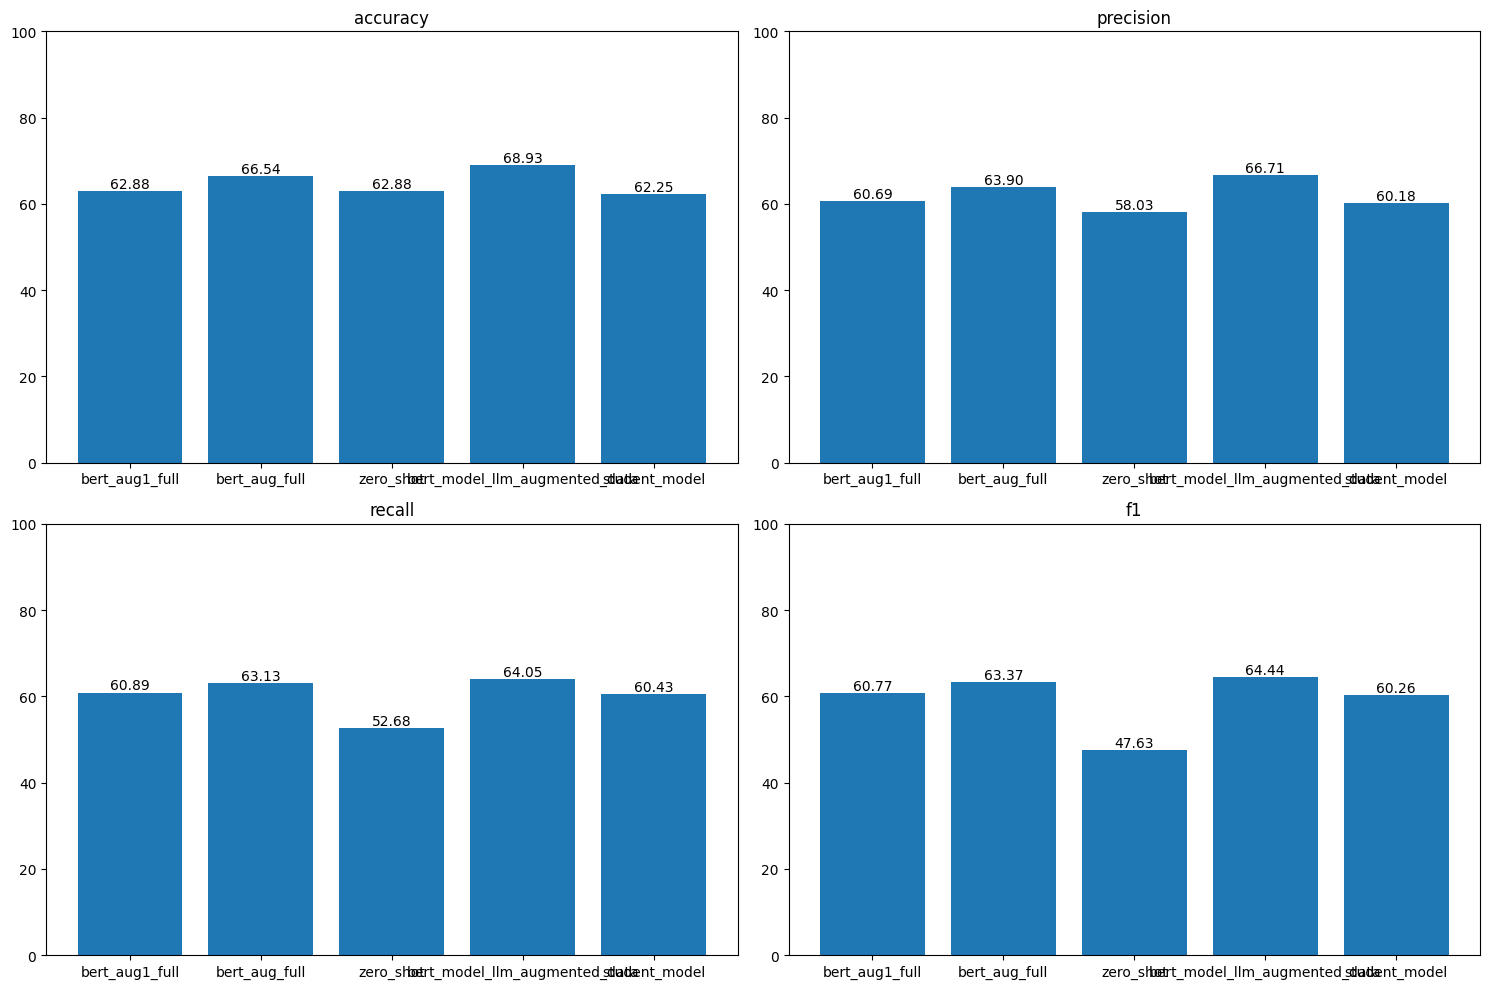

In [ ]:
# get the final metrics
metrics_techniques.run(test_new.label, test_new['prediction_student_model'], "student_model")
metrics_techniques.plot()

## Student Model Performance and Speed Comparison
Looking at the comparison of performance and inference speed between the teacher model and the distilled model, we see an increase in speed, but a decrease in accuracy (performance). While we did achieve our best performing accuracy on our test dataset, it was computationally intensive, especially on devices with limited hardware capabilities. We ran the teacher model and received a runtime of a total of 282.09 seconds (or 4:45'), however, I would like to point out that we used premium GPUs from Google Colab. If we were to run the model without the GPUs, the time would have been almost 16 hours to train the teacher model on the dataset (about 2 hours per epoch).

In contrast, the distilled model showed a very smal improvement in inference speed, with a runtime of about 242 second (4:04' minutes).

Regarding performance, the distilled model's accuracy score dropped to 62.25%, about four percentage points. This slight decrease in accuracy is a trade-off for the gains in efficiency and speed, showing the effectiveness of model distillation in balancing performance with computational resource requirements. These findings give us an idea about the distilled model's potential for applications where rapid inference is critical, despite some compromise in accuracy.

Given more time, we would play around more wtih the hyper-paramerter tuning to find that sweet spot where we achieve both speed and maintain performance.

## Analysis and Improvements

Model distillation improved our model's inference speed from 282 seconds to 242 seconds, demonstrating its value in speed-sensitive environments. However, this efficiency came with a 4% drop in accuracy to 62.25%, highlighting a trade-off between speed and accuracy. Optimizing this balance is the key to finding effectively transferring the knowledge.

Upon careful analysis and further research, we found potential methods for increasing the speed and performance of our stufent model. One way would require careful consideration and perhaps a grid search when choosing the values for our hyperparamaeters: alpha and temperature.

The temperature parameter is used to soften the output probabilities (logits or soft labels) of the teacher model during the distillation process. The way this works is the softmax function converts logits to probabilites by taking the exponential of each logit and normalizing the values. High temperature values, typically larger than 1, softens the output and produces less confidence. This allows our student model to really capture the full sturcutre of the teacher's outputs, how it distingues between incorrect classes. Increasing this value may lead to the better student learning.

The alpha parameter balances the two loss functions during the training of the student model: one from the soft labels provided by the teacher model and one from the true hard labels (the actual data labels). As seen in our customer loss function. Increasing the alpha parameter will give more weight to the loss coming from the soft labels, whereas decreasing the value will give more weight to the hard labels. It seems that increasing htis value might allow our student model to learn more from the teacher model. reducing the aplpha value may be more appropraite in cases where our teacher model predictions are not too reliable.

Another appraoach we think could improve our speed and performance of the student model is using an attention-based distillation process. Our process currently focuses on general principles of disillation (such as the soft-label distillation). If we were to change our approach and go with the attention-based distillation, the method would include extracting the attention weights by modifing our teacher and student models to produce outputs that include the attention weights. Then we'd implement a loss that minimizes the difference between the teacher's and student's attention weights which would involve calculating a similarity measure such as cosine similarity. Then we would train the student model wiht the attention-based loss. This approach uses a really stretegic way of extracting the knowledge from the teacher model, because instead of just capturing the soft labels, we capture the attention weights that the teacher model assigned to tokens during training. This allows the student model to learn how the teacher model allocated attention to words and therefore can take on this behavior. However, implementing this method would still require careful consideration when choosing the parameters to balance the trade-off between speed and performance.

### SuperGLUE Overview

1. AX-b (axb): This stands for the Broad-Coverage Diagnostic dataset, which is used to analyze models on a wide variety of linguistic phenomena. It serves as a diagnostic tool to probe the models trained on other SuperGLUE tasks to understand what linguistic capabilities they have learned.

2. AX-g (axg): This refers to the diagnostic dataset derived from the Winograd Schema Challenge. It's designed to test models on their understanding and reasoning capabilities in scenarios where resolving the reference of pronouns to the correct antecedent is especially challenging and often requires commonsense reasoning.

3. BoolQ (boolq): A question-answering dataset where each example consists of a short passage and a yes/no question about the passage.

4. CB (cb): The CommitmentBank is a corpus of texts with examples of commitment phenomena, where models are tested on their ability to predict the entailment and contradiction relationships within sentences.

5. COPA (copa): The Choice of Plausible Alternatives task involves a premise and two alternatives, where the model must determine which alternative is more plausible.

6. MultiRC (multirc): A multiple-choice reading comprehension task where questions about a paragraph can have multiple correct answers.

7. ReCoRD (record): The Reading Comprehension with Commonsense Reasoning Dataset is a large-scale reading comprehension dataset requiring commonsense reasoning. It consists of news articles and a set of Cloze-style questions where an entity is masked out in a query associated with the article. The task is to predict the masked-out entity from a list of candidates provided in the article.

8. RTE (rte): The Recognizing Textual Entailment task involves determining whether a given premise sentence can be inferred from a hypothesis sentence. It is a binary classification task where a model must decide whether the hypothesis is true (entailment) or not (not entailment) based on the given premise. It focuses on the model's understanding of language and inference capabilities.

9. WiC (wic): The Word-in-Context dataset is designed to test for word sense disambiguation. Models are given two sentences containing a polysemous word (a word with multiple meanings) and must determine whether the word is used in the same sense in both sentences. The task tests the model's understanding of word meaning in different contexts.

10. WSC (wsc): The Winograd Schema Challenge is a coreference resolution task in which a model must figure out which noun a given pronoun refers to. The sentences are crafted such that they are easy for humans but difficult for AI, often requiring commonsense knowledge or reasoning.

11. WSC.fixed (wsc.fixed): The paper does not specifically mention "WSC.fixed," but typically, a ".fixed" dataset indicates that errors in the original dataset have been corrected. In the context of SuperGLUE, it could mean that any detected issues in the original WSC dataset have been addressed, such as resolving ambiguous pronoun references or correcting annotations to ensure the dataset accurately reflects the coreference resolution challenges it's designed to test.

In summary, these tasks are intended to provide insights into the linguistic and commonsense reasoning capabilities of language models evaluated against the SuperGLUE benchmark. They are particularly focused on understanding if a model can handle complex tasks that go beyond simple pattern recognition, such as understanding context, word sense disambiguities, and making inferences. This allows us to push the boundaries of what machine learning models can understand and infer from language


Clark, Christopher, et al. "BoolQ: Exploring the surprising difficulty of natural yes/no questions." arXiv preprint arXiv:1905.10044 (2019).

https://paperswithcode.com/dataset/boolq

Wang, Alex, et al. "Superglue: A stickier benchmark for general-purpose language understanding systems." Advances in neural information processing systems 32 (2019).